<a href="https://colab.research.google.com/github/LuppeCh/F1EDA/blob/Correcci%C3%B3n_an%C3%A1lisis5/Exploraci%C3%B3n_de_Datos_Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración de datos

In [1]:
install.packages("dplyr")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("grid")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”


In [2]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(gridExtra)
library(grid)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Comenzamos la fase de exploración cargando la telemetría del equipo Williams desde el archivo F12025-WILLIAMS.csv. Esta operación se realizó utilizando read.csv() con ajustes específicos, ya que detectamos una inconsistencia en el formato del archivo. A pesar de su extensión .csv, observamos que los datos se encontraban delimitados por tabulaciones (\t), comportándose en la práctica como un archivo TSV.

Luego de corregir el delimitador, el análisis realizado sobre este data frame sirvió como base para todo el proyecto. Por lo tanto, en los análisis siguientes de los demás equipos, solo se detallarán aquellos tratamientos, filtros o ajustes que difieran  del proceso de limpieza inicial aplicado a la telemetría de Williams.

In [3]:
wil <- read.csv("F12025-WILLIAMS.csv", dec = ".", sep = "\t")

Acto seguido, realizamos un head() para observar la estructura general del archivo. La primera inconsistencia encontrada fue en la columna carId, que no contenía el nombre correcto de la escudería. Por lo tanto, se procedió a corregir este identificador.

In [4]:
head(wil)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alpine,Interlagos,4294,0,0,0,0,1,0,0.513507,⋯,0,0,0,0,0,0,0,0,0,0
2,Alpine,Interlagos,4294,0,0,0,1,1,0,1.449180,⋯,0,0,0,0,0,0,0,0,0,0
3,Alpine,Interlagos,4294,0,0,0,2,1,0,2.384850,⋯,0,0,0,0,0,0,0,0,0,0
4,Alpine,Interlagos,4294,0,0,0,3,1,0,3.320510,⋯,0,0,0,0,0,0,0,0,0,0
5,Alpine,Interlagos,4294,0,0,0,4,1,0,4.256180,⋯,0,0,0,0,0,0,0,0,0,0
6,Alpine,Interlagos,4294,0,0,0,5,1,0,5.194280,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
wil$carId <- "WIL"

In [6]:
tail(wil)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
25759,WIL,Interlagos,4294,5,5,0,4288,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25760,WIL,Interlagos,4294,5,5,0,4289,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25761,WIL,Interlagos,4294,5,5,0,4290,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25762,WIL,Interlagos,4294,5,5,0,4291,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25763,WIL,Interlagos,4294,5,5,0,4292,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25764,WIL,Interlagos,4294,5,5,0,4293,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


Realizamos un .tail() y observamos que lapNum tiene un valor mayor al esperado (4), ya que arranca a contabilizar las vueltas desde 0, por lo que el lapNum = 5 corresponderia a la vuelta 6. Además observamos que los valores de muchas variables toman el valor "-1", lo cual es inconsistente en algunas variables como "lap_distance", por lo que aunque debemos eliminar todos los registros de esta vuelta, vamos a realizar un breve análisis que nos permita comprender que sucedió.

In [7]:
wil <- wil %>%
  select(
    carId,
    lapNum,
    lap_time,
    lap_distance,
    lap_time_invalid,
    binIndex,
    velocity_X,
    velocity_Y,
    velocity_Z
  )

Para trabajar más cómodos, decidimos eliminar todas aquellas columnas que no vamos a utilizar ni ahora ni a futuro.

In [8]:
inconsistencia <- wil %>%

  select(where(is.numeric)) %>%

  summarise(
    across(
      everything(),
      ~ sum(. == -1, na.rm = TRUE)
    )
  )

inconsistencia

lapNum,lap_time,lap_distance,lap_time_invalid,binIndex,velocity_X,velocity_Y,velocity_Z
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,3237,3237,3237,0,3237,3237,3237


Creamos un pequeño dataset que nos permite ver cuantas de las variables númericas existentes en nuestro dataset tienen un valor igual a "-1". Al imprimirla observamos que 6 de las 8 variables tienen 3237 registros de este tipo. Sospechamos que cuando una de estas variables toma el valor -1, las otras 5 también.

In [9]:
sospechosas <- c(
  "lap_time",
  "lap_distance",
  "lap_time_invalid",
  "velocity_X",
  "velocity_Y",
  "velocity_Z"
)


conteo_sospechosas <- wil %>%
  summarise(
    cant_sospechosas = sum(if_all(all_of(sospechosas), ~ . == -1), na.rm = TRUE)
  ) %>%
  pull()

conteo_sospechosas

[1] 3237

Se confirma nuestra teoría. Además, por lo leído en el archivo de especificaciones de EA SPORTS F1, este valor suele significar que no se ha cruzado la línea de meta, lo que puede indicar que estos valores pertenezcan a:

1. Una vuelta de calentamiento.
2. Los metros que sigue recorriendo el automóvil antes de frenar, luego de cruzar la meta.

In [10]:
final_valido <- wil %>%
  filter(lapNum == 5) %>%
  group_by(lap_time_invalid) %>%
  summarise(
    N_Registros = n(),
    .groups = 'drop'
  )

  final_valido

lap_time_invalid,N_Registros
<int>,<int>
-1,3237
0,1057


Confirmamos que todos estos valores pertenecen a la vuelta 6 (lapNum = 5), lo que indicaria que todos estos registros se deben a la razón 2.

In [11]:
wil <- wil %>%
  filter(lapNum < 5)

Borramos esta vuelta.

In [12]:
mcl <- read.csv("F12025-MCLAREN.csv", dec = ".", sep = "\t")

In [13]:
head(mcl)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alpine,Interlagos,4294,0,21,0,0,1,21,0.40625,⋯,0,0,0,0,0,0,0,0,0,0
2,Alpine,Interlagos,4294,0,21,0,1,1,21,1.41602,⋯,0,0,0,0,0,0,0,0,0,0
3,Alpine,Interlagos,4294,0,21,0,2,1,21,2.42578,⋯,0,0,0,0,0,0,0,0,0,0
4,Alpine,Interlagos,4294,0,21,0,3,1,21,3.43555,⋯,0,0,0,0,0,0,0,0,0,0
5,Alpine,Interlagos,4294,0,21,0,4,1,21,4.44531,⋯,0,0,0,0,0,0,0,0,0,0
6,Alpine,Interlagos,4294,0,21,0,5,1,21,5.45703,⋯,0,0,0,0,0,0,0,0,0,0


In [14]:
mcl$carId <- "MCL"

En el caso del archivo de la escudería McLaren, se replicó la importación.

Sin embargo, en la exploración inicial, hallamos otra inconsistencia que requirió un tratamiento adicional.

Detectamos que la columna lapNum no iniciaba en 0, sino que comenzaba en 21. Dado que el objetivo es contar la cantidad real de vueltas completadas por el auto, se procedió a restar esta cantidad inicial de 21 a todos los valores de lapNum, normalizando así el conteo para que las vueltas se registraran correctamente.

In [15]:
mcl$lapNum <- mcl$lapNum - 21

In [16]:
tail(mcl)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
25759,MCL,Interlagos,4294,5,5,0,4288,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25760,MCL,Interlagos,4294,5,5,0,4289,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25761,MCL,Interlagos,4294,5,5,0,4290,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25762,MCL,Interlagos,4294,5,5,0,4291,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25763,MCL,Interlagos,4294,5,5,0,4292,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25764,MCL,Interlagos,4294,5,5,0,4293,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [17]:
mcl <- mcl %>%
  filter(lapNum < 5)

In [18]:
mcl <- mcl %>%
  select(
    carId,
    lapNum,
    lap_time,
    lap_distance,
    lap_time_invalid,
    binIndex,
    velocity_X,
    velocity_Y,
    velocity_Z
  )

In [19]:
red <- read.csv("F12025-REDBULL.csv", dec = ".", sep = "\t")

In [20]:
head(red)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alpine,Interlagos,4294,0,16,0,0,1,16,2.81250,⋯,0,0,0,0,0,0,0,0,0,0
2,Alpine,Interlagos,4294,0,16,0,1,1,16,2.81250,⋯,0,0,0,0,0,0,0,0,0,0
3,Alpine,Interlagos,4294,0,16,0,2,1,16,2.81250,⋯,0,0,0,0,0,0,0,0,0,0
4,Alpine,Interlagos,4294,0,16,0,3,1,16,3.82617,⋯,0,0,0,0,0,0,0,0,0,0
5,Alpine,Interlagos,4294,0,16,0,4,1,16,4.83984,⋯,0,0,0,0,0,0,0,0,0,0
6,Alpine,Interlagos,4294,0,16,0,5,1,16,5.85352,⋯,0,0,0,0,0,0,0,0,0,0


In [21]:
red$carId <-"RED"

In [22]:
red$lapNum <- red$lapNum - 16

In [23]:
tail(red)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
25759,RED,Interlagos,4294,5,5,0,4288,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25760,RED,Interlagos,4294,5,5,0,4289,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25761,RED,Interlagos,4294,5,5,0,4290,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25762,RED,Interlagos,4294,5,5,0,4291,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25763,RED,Interlagos,4294,5,5,0,4292,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25764,RED,Interlagos,4294,5,5,0,4293,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [24]:
red <- red %>%
  filter(lapNum < 5)

In [25]:
red <- red %>%
  select(
    carId,
    lapNum,
    lap_time,
    lap_distance,
    lap_time_invalid,
    binIndex,
    velocity_X,
    velocity_Y,
    velocity_Z
  )

In [26]:
alp <- read.csv("F12025-ALPINE.csv", dec = ".", sep = "\t")

In [27]:
head(alp)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alpine,Interlagos,4294,0,10,0,0,1,10,1.63281,⋯,0,0,0,0,0,0,0,0,0,0
2,Alpine,Interlagos,4294,0,10,0,1,1,10,1.63281,⋯,0,0,0,0,0,0,0,0,0,0
3,Alpine,Interlagos,4294,0,10,0,2,1,10,2.62500,⋯,0,0,0,0,0,0,0,0,0,0
4,Alpine,Interlagos,4294,0,10,0,3,1,10,3.61719,⋯,0,0,0,0,0,0,0,0,0,0
5,Alpine,Interlagos,4294,0,10,0,4,1,10,4.60938,⋯,0,0,0,0,0,0,0,0,0,0
6,Alpine,Interlagos,4294,0,10,0,5,1,10,5.60156,⋯,0,0,0,0,0,0,0,0,0,0


In [28]:
alp$carId <- "ALP"

In [29]:
alp$lapNum <- alp$lapNum - 10

In [30]:
tail(alp)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
30053,ALP,Interlagos,4294,6,6,0,4288,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30054,ALP,Interlagos,4294,6,6,0,4289,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30055,ALP,Interlagos,4294,6,6,0,4290,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30056,ALP,Interlagos,4294,6,6,0,4291,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30057,ALP,Interlagos,4294,6,6,0,4292,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30058,ALP,Interlagos,4294,6,6,0,4293,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


En el caso de la escudería Alpine, la lectura de archivos se mantuvo. Aunque, en la exploración de la columna lapNum, identificamos una anomalía en el conteo total de vueltas.

Mientras que en el resto de los archivos la telemetría se detenía después de la quinta vuelta completa (último registro de lapNum = 4) y registraba un tramo parcial de la sexta (el período en que el auto frena o desacelera), el piloto de Alpine continuó. En su archivo se registraron seis vueltas completas y, además, un tramo parcial correspondiente a la séptima vuelta (lapNum = 6).

Dado que la consigna  equiere considerar solamente las primeras cinco vueltas de cada equipo, se procedió a eliminar todos los registros de la vuelta 6 y la vuelta 7.

In [31]:
alp <- alp %>%
  filter(lapNum < 5)

In [32]:
alp <- alp %>%
  select(
    carId,
    lapNum,
    lap_time,
    lap_distance,
    lap_time_invalid,
    binIndex,
    velocity_X,
    velocity_Y,
    velocity_Z
  )

In [33]:
mer <- read.csv("F12025-MERCEDES.csv", dec = ".", sep = "\t")

In [34]:
head(mer)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alpine,Interlagos,4294,0,5,0,0,1,5,3.34570,⋯,0,0,0,0,0,0,0,0,0,0
2,Alpine,Interlagos,4294,0,5,0,1,1,5,3.34570,⋯,0,0,0,0,0,0,0,0,0,0
3,Alpine,Interlagos,4294,0,5,0,2,1,5,3.34570,⋯,0,0,0,0,0,0,0,0,0,0
4,Alpine,Interlagos,4294,0,5,0,3,1,5,3.34570,⋯,0,0,0,0,0,0,0,0,0,0
5,Alpine,Interlagos,4294,0,5,0,4,1,5,4.41357,⋯,0,0,0,0,0,0,0,0,0,0
6,Alpine,Interlagos,4294,0,5,0,5,1,5,5.48145,⋯,0,0,0,0,0,0,0,0,0,0


In [35]:
mer$carId <-"MER"

In [36]:
mer$lapNum <- mer$lapNum - 5

In [37]:
tail(mer)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
25759,MER,Interlagos,4294,5,5,0,4288,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25760,MER,Interlagos,4294,5,5,0,4289,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25761,MER,Interlagos,4294,5,5,0,4290,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25762,MER,Interlagos,4294,5,5,0,4291,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25763,MER,Interlagos,4294,5,5,0,4292,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
25764,MER,Interlagos,4294,5,5,0,4293,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [38]:
mer <- mer %>%
  filter(lapNum < 5)

In [39]:
mer <- mer %>%
  select(
    carId,
    lapNum,
    lap_time,
    lap_distance,
    lap_time_invalid,
    binIndex,
    velocity_X,
    velocity_Y,
    velocity_Z
  )

In [40]:
fer <- read.csv("F12025-FERRARI.csv", dec = ".", sep = "\t")

In [41]:
head(fer)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alpine,Interlagos,4294,0,31,0,0,1,31,0.93750,⋯,0,0,0,0,0,0,0,0,0,0
2,Alpine,Interlagos,4294,0,31,0,1,1,31,1.80313,⋯,0,0,0,0,0,0,0,0,0,0
3,Alpine,Interlagos,4294,0,31,0,2,1,31,2.66875,⋯,0,0,0,0,0,0,0,0,0,0
4,Alpine,Interlagos,4294,0,31,0,3,1,31,3.53438,⋯,0,0,0,0,0,0,0,0,0,0
5,Alpine,Interlagos,4294,0,31,0,4,1,31,4.40000,⋯,0,0,0,0,0,0,0,0,0,0
6,Alpine,Interlagos,4294,0,31,0,5,1,31,5.26562,⋯,0,0,0,0,0,0,0,0,0,0


In [42]:
fer$carId <- "FER"

In [43]:
fer$lapNum <- fer$lapNum - 31

In [44]:
tail(fer)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,⋯,gear_box_damage,engine_damage,mguh_damage,es_damage,ce_damage,ice_damage,mguk_damage,tc_damage,engine_blown,engine_seized
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
21465,FER,Interlagos,4294,4,4,0,4288,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
21466,FER,Interlagos,4294,4,4,0,4289,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
21467,FER,Interlagos,4294,4,4,0,4290,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
21468,FER,Interlagos,4294,4,4,0,4291,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
21469,FER,Interlagos,4294,4,4,0,4292,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
21470,FER,Interlagos,4294,4,4,0,4293,0,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


En el caso de la escudería Ferrari, la importación de archivos también se mantuvo. Al realizar un análisis de los registros finales con tail(), se confirmó que la telemetría se detenía en la lapNum = 4.

Sin embargo, al investigar los registros finales, detectamos que estos presentaban valores de -1 muchas variables.

Por lo tanto, aunque el auto de Ferrari ingresó a la quinta vuelta, no la completó, por lo que debemos borrarla y generarla de manera artificial.

In [45]:
fer <- fer %>%
  filter(lapNum < 4)

In [46]:
fer <- fer %>%
  select(
    carId,
    lapNum,
    lap_time,
    lap_distance,
    lap_time_invalid,
    binIndex,
    velocity_X,
    velocity_Y,
    velocity_Z
  )

In [47]:
vueltas_anuladas_fer <- fer %>%
  group_by(lapNum) %>%
  summarise(lap_time_invalid = max(lap_time_invalid))

Para generar de forma artificial la quinta vuelta, debemos realizarlo promediando los valores de las vueltas validas, por lo que visualizamos cuales son (las que tienen lap_time_valid = 0).

In [48]:
vueltas_anuladas_fer

lapNum,lap_time_invalid
<dbl>,<int>
0,0
1,1
2,1
3,0


Determinamos que, para el objetivo de nuestro estudio, solo trabajaríamos con los registros de la vuelta 1 y la vuelta 4. Por lo tanto, el siguiente paso fue crear un nuevo data set que contenga exclusivamente la telemetría correspondiente a estas dos vueltas.

In [49]:
vueltas_validas <- fer %>%
  filter(lapNum %in% c(0, 3))

A partir de este punto, procedimos a la construcción de la vuelta 5 simulada.

Esta vuelta fue construida calculando los promedios de las variables clave (velocidades, distancias, etc.) a partir de los registros válidos de la vuelta 1 y la vuelta 4. Una vez calculados estos valores promedio, se procedió a asignar los identificadores correctos a la nueva telemetría:

Se le asignó el carId de la escudería correspondiente, se estableció la validez de la vuelta (lap_time_invalid = 0) y se le asignó el número de vuelta lapNum = 4.

In [50]:
vuelta_5 <- vueltas_validas %>%
  group_by(binIndex) %>%
  summarise(
    lap_distance = mean(lap_distance, na.rm = TRUE),
    lap_time = mean(lap_time, na.rm = TRUE),
    velocity_X = mean(velocity_X, na.rm = TRUE),
    velocity_Y = mean(velocity_Y, na.rm = TRUE),
    velocity_Z = mean(velocity_Z, na.rm = TRUE),

    carId = "FER",
    lap_time_invalid = 0
  ) %>%

  ungroup()%>%

  mutate(
    lapNum = 4
  )

Finalmente, para completar el data set de Ferrari, procedimos a integrar la vuelta construida. Esto se realizó utilizando la función bind_rows(), la cual añadió los registros de la Vuelta 5 simulada aldel data set de Ferrari.

In [51]:
fer <- bind_rows(fer, vuelta_5)

Con los data sets de cada escudería (Williams, McLaren, Alpine y Ferrari) corregidos, procedimos con el segundo paso del analisis.

Para este fin, unimos todos los data frames individuales en un único data set final denominado telemetria.

In [52]:
telemetria <- bind_rows(fer, red, mcl, mer, alp, wil)

En este bloque segmentamos la vuelta en tres sectores (S1, S2, S3) basándonos en el número de observaciones, que corresponde también a los metros del circuito. Tambien se añade la longitud de la pista.

In [53]:
telemetria <- telemetria %>%
  mutate(
    sector = case_when(
      binIndex >= 0 & binIndex <= 1430 ~ "S1",
      binIndex >= 1431 & binIndex <= 2861 ~ "S2",
      binIndex >= 2862 & binIndex <= 4293 ~ "S3",
    ),
    track_lenght = 4294
    )

Luego añadimos una variable que almacena la magnitud de la velocidad total a partir del calculo vectorial por medio de sus componentes vectoriales y realizamos la conversión a km/h.

In [54]:
telemetria <- telemetria %>%
  mutate(
    velocity_total_ms = sqrt(
      velocity_X^2 +
      velocity_Y^2 +
      velocity_Z^2
    ),

    velocidad = velocity_total_ms * 3.6
  )

telemetria <- telemetria %>%
  select(-velocity_total_ms)

Examinamos cuántos valores en todas las columnas numéricas del dataset telemetria son iguales a -1. (wl valor comúnmente utilizado para representar un valor faltante).

In [55]:
inconsistencia_global <- telemetria %>%

  select(where(is.numeric)) %>%

  summarise(
    across(
      everything(),
      ~ sum(. == -1, na.rm = TRUE)
    )
  )

inconsistencia_global

lapNum,lap_time,lap_distance,lap_time_invalid,binIndex,velocity_X,velocity_Y,velocity_Z,track_lenght,velocidad
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0


Como siguiente paso, procedimos a crear la variable lap_number, tal como se solicitó en las consignas.

Esta nueva variable nos permite identificar en qué vuelta se encuentra corriendo actualmente el conductor en cada registro. A diferencia de la variable lapNum,la cual indica el número de vueltas completadas.


In [56]:
telemetria <- telemetria %>%
  mutate(lap_number = lapNum + 1)

Confirmamos que lap_time_valid solamente toma los valores esperados: 0 (para registros válidos) y 1 (para registros inválidos).

In [57]:
unique_invalid <- unique(telemetria$lap_time_invalid)
unique_invalid

[1] 0 1

Procedimos a calcular el porcentaje de registros inválidos por vuelta para cada escudería. Este cálculo utiliza la columna lap_time_invalid que controlamos antes.

In [58]:
porcentaje_invalido <- telemetria %>%
  group_by(carId, lapNum) %>%
  summarise(
    total_registros = n(),
    obs_invalidas = sum(lap_time_invalid == 1, na.rm = TRUE),
    porcentaje_invalido = (obs_invalidas / total_registros) * 100
  ) %>%
  ungroup() %>%
  arrange(desc(porcentaje_invalido), carId, lapNum)

porcentaje_invalido

`summarise()` has grouped output by 'carId'. You can override using the
`.groups` argument.


carId,lapNum,total_registros,obs_invalidas,porcentaje_invalido
<chr>,<dbl>,<int>,<int>,<dbl>
ALP,0,4294,3746,87.23801
RED,1,4294,3658,85.18864
MCL,4,4294,3544,82.53377
RED,0,4294,2791,64.99767
ALP,1,4294,2541,59.17559
RED,3,4294,2241,52.18910
WIL,4,4294,2044,47.60130
WIL,1,4294,2042,47.55473
WIL,3,4294,2033,47.34513


Determinamos que cualquier vuelta que contara con un porcentaje de registros inválidos estrictamente mayor a 0 sería invalidada por completo para el análisis. Por lo tanto, se creó el data set telemetria_vueltas_invalidadas donde se modificó la columna lap_time_invalid para que todos los registros pertenecientes a estas vueltas tuvieran a un valor de 1.

In [59]:
vueltas_a_invalidar <- c(
  "ALP_0", "RED_1", "MCL_4", "RED_0", "ALP_1", "RED_3",
  "WIL_4", "WIL_1", "WIL_3", "FER_1", "FER_2", "ALP_4")

telemetria_vueltas_invalidadas <- telemetria %>%
  mutate(lap_id = paste(carId, lapNum, sep = "_")) %>%
  mutate(
    lap_time_invalid = if_else(lap_id %in% vueltas_a_invalidar, 1, lap_time_invalid)) %>%
  select(-lap_id)

In [60]:
registros <- nrow(telemetria_vueltas_invalidadas)
print(paste("cant. registros:", registros))

escuderias <- unique(telemetria_vueltas_invalidadas$carId)
print(escuderias)

cant_lap <- unique(telemetria_vueltas_invalidadas$lapNum)
print(cant_lap)

cant_lap <- unique(telemetria_vueltas_invalidadas$lap_number)
print(cant_lap)

any(is.na(telemetria_vueltas_invalidadas))

[1] "cant. registros: 128820"
[1] "FER" "RED" "MCL" "MER" "ALP" "WIL"
[1] 0 1 2 3 4
[1] 1 2 3 4 5


[1] FALSE

Para obtener una vista rápida y global del estado de los datos después de todos los tratamientos de limpieza, procedimos a ejecutar la función summary() sobre el data set.

Esta acción nos permitió obtener un pantallazo de las estadísticas descriptivas para cada variable, enfocándonos principalmente en la detección de posibles inconsistencias críticas como la presencia de tiempos negativos (como en lap_time) o la existencia de valores en binIndex fuera del rango esperado de la pista.

In [61]:
summary(telemetria_vueltas_invalidadas)

    carId               lapNum     lap_time      lap_distance      
 Length:128820      Min.   :0   Min.   : 0.00   Min.   :   0.0312  
 Class :character   1st Qu.:1   1st Qu.:17.39   1st Qu.:1073.5850  
 Mode  :character   Median :2   Median :34.08   Median :2146.9850  
                    Mean   :2   Mean   :37.37   Mean   :2146.9966  
                    3rd Qu.:3   3rd Qu.:58.95   3rd Qu.:3220.5300  
                    Max.   :4   Max.   :83.37   Max.   :4294.0000  
 lap_time_invalid    binIndex      velocity_X       velocity_Y     
 Min.   :0.0      Min.   :   0   Min.   : 3.316   Min.   :-9.7585  
 1st Qu.:0.0      1st Qu.:1073   1st Qu.:48.901   1st Qu.:-0.1395  
 Median :0.0      Median :2146   Median :65.286   Median : 0.2474  
 Mean   :0.4      Mean   :2146   Mean   :62.746   Mean   : 0.2773  
 3rd Qu.:1.0      3rd Qu.:3220   3rd Qu.:78.749   3rd Qu.: 0.8548  
 Max.   :1.0      Max.   :4293   Max.   :87.822   Max.   :12.2492  
   velocity_Z          sector           track_le

Verificamos que haya la misma cantidad de registros para cada vehiculo.

In [62]:
registros_por_vehiculo <- telemetria_vueltas_invalidadas %>%
  group_by(carId) %>%
  summarise(cant_registros = n())

registros_por_vehiculo

carId,cant_registros
<chr>,<int>
ALP,21470
FER,21470
MCL,21470
MER,21470
RED,21470
WIL,21470


Se verificó que los valores de binIndex se mantuvieran dentro del rango esperado de la pista, y se chequeó que no existieran valores duplicados de binIndex dentro de la misma vuelta para cada auto.

In [63]:
noisy_data <- telemetria_vueltas_invalidadas %>%
  group_by(carId, lapNum) %>%
  summarise(
    conteo_total = n(),

    rango_correcto = min(binIndex) == 0 & max(binIndex) == 4293,
    duplicados = conteo_total - n_distinct(binIndex),

    .groups = 'drop'
  )

noisy_data

carId,lapNum,conteo_total,rango_correcto,duplicados
<chr>,<dbl>,<int>,<lgl>,<int>
ALP,0,4294,TRUE,0
ALP,1,4294,TRUE,0
ALP,2,4294,TRUE,0
ALP,3,4294,TRUE,0
ALP,4,4294,TRUE,0
FER,0,4294,TRUE,0
FER,1,4294,TRUE,0
FER,2,4294,TRUE,0
FER,3,4294,TRUE,0


El propósito de este chequeo es corroborar que la variable lap_time (que representa el tiempo acumulado desde el inicio de la vuelta) respete la progresión cronológica estricta dentro de cada vuelta y para cada auto.

In [64]:
test_tiempo_estricto <- telemetria_vueltas_invalidadas %>%
  group_by(carId, lapNum) %>%
  mutate(
    falla_tiempo = lap_time <= lag(lap_time)
  ) %>%
  summarise(
    cant_tiempo_nocreciente = sum(falla_tiempo, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  filter(cant_tiempo_nocreciente > 0)

test_tiempo_estricto

carId,lapNum,cant_tiempo_nocreciente
<chr>,<dbl>,<int>
ALP,0,2
ALP,1,5
ALP,2,2
ALP,3,2
ALP,4,4
FER,0,1
FER,1,4
FER,2,2
FER,3,3


Al finalizar el análisis de integridad cronológica, se identificaron 82 registros donde el tiempo acumulado no crecía de manera estricta.

Para diagnosticar la causa de esta inconsistencia, procedimos a visualizar y examinar puntualmente estos 82 registros con sus variables más relevantes, incluyendo el sector de la pista, la distancia recorrida y el binIndex donde ocurrió la falla, el valor del lap_time en el momento de la falla, y las diferencias (lap_time, velocidades) calculadas entre el registro anómalo y el registro inmediatamente anterior.

In [65]:
falla_temporal <- telemetria_vueltas_invalidadas %>%
  group_by(carId, lapNum) %>%

  mutate(
    es_falla = lap_time <= lag(lap_time)
  ) %>%

  mutate(
    DIF_lap_time = lap_time - lag(lap_time),
    DIF_vel_X = velocity_X - lag(velocity_X),
    DIF_vel_Y = velocity_Y - lag(velocity_Y),
    DIF_vel_Z = velocity_Z - lag(velocity_Z)
  ) %>%

  filter(es_falla == TRUE) %>%

  select(
    carId, lapNum, binIndex, lap_distance, lap_time_invalid,
    DIF_lap_time, DIF_vel_Y, DIF_vel_X, DIF_vel_Z,
    lap_time, velocity_Y, velocity_X, velocity_Z, sector
  ) %>%
  ungroup()

print(falla_temporal, n = Inf, width = Inf)

# A tibble: 82 × 14
   carId lapNum binIndex lap_distance lap_time_invalid DIF_lap_time DIF_vel_Y
   <chr>  <dbl>    <int>        <dbl>            <dbl>        <dbl>     <dbl>
 1 FER        0     4293      4292.                  0            0   0      
 2 FER        1        1         1.97                1            0   0      
 3 FER        1     4291      4291.                  1            0   0      
 4 FER        1     4292      4291.                  1            0   0      
 5 FER        1     4293      4291.                  1            0   0      
 6 FER        2        1         2                   1            0   0      
 7 FER        2        2         2                   1            0   0      
 8 FER        3        1         3.48                0            0   0      
 9 FER        3        2         3.48                0            0   0      
10 FER        3        3         3.48                0            0   0      
11 RED        0        1         2.81       

A partir del análisis detallado de los 82 registros donde se detectó una falla temporal, se extrajeron las siguientes conclusiones fundamentales sobre la naturaleza de la corrupción de los datos:

1. La diferencia de tiempo fue 0 en todos los casos, confirmando que el lap time se estanca o duplica, pero nunca retrocede.

2. En 78 de los 82 casos, las componentes de velocidad también registraron una diferencia de 0, indicando que el registro completo se duplicó o se congeló instantáneamente.

3. La mayoría de los casos de falla se concentran en el Sector 1 (S1) y el Sector 3 (S3). Esta distribución es coherente con los valores de binIndex que tienen la mayoría de estos registros, que indican de que las fallas ocurren predominantemente al final o al comienzo de la vuelta.

4. En varios casos, la variable lap_distance también parece estancarse o duplicarse. Este estancamiento no es consistente con el avance del binIndex en el mismo registro. Dado que lap_distance y binIndex mantienen una relación prácticamente proporcional (ambas indican posición en la pista).

Decidimos realizar un sectograma que nos ilustrara mejor la distribución de anomalías por sector.

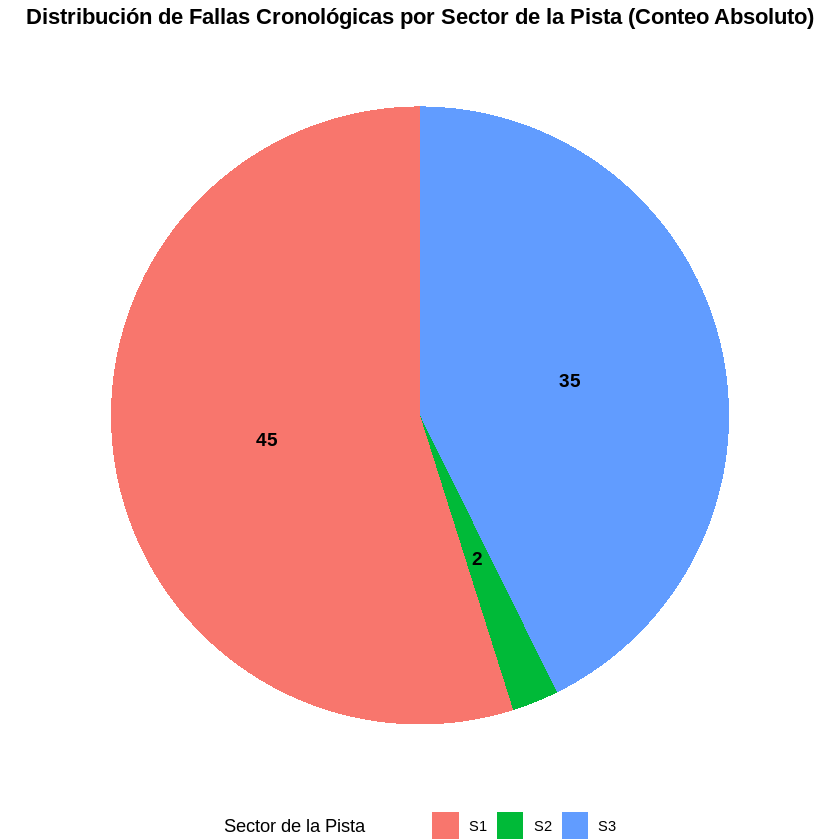

In [66]:
conteo_fallas_sector <- falla_temporal %>%
  group_by(sector) %>%
  summarise(
    N_Fallas = n(),
    .groups = 'drop'
  )

grafico_fallas_torta <- conteo_fallas_sector %>%
  ggplot(aes(x = "", y = N_Fallas, fill = sector)) +

  geom_bar(stat = "identity", width = 1) +

  coord_polar(theta = "y", start = 0) +

  geom_text(aes(label = N_Fallas),
            position = position_stack(vjust = 0.5),
            size = 4, fontface = "bold") +

  labs(
    title = "Distribución de Fallas Cronológicas por Sector de la Pista (Conteo Absoluto)",
    fill = "Sector de la Pista",
    x = NULL,
    y = NULL
  ) +

  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "bottom"
  )

print(grafico_fallas_torta)

Además, realizamos una tabla que ilustra como se distribuyen las fallas con respecto a la transición de un sector a otro, confirmando nuestras sospechas de que la mayoria ocurren en el fin/inicio de vuelta, es decir, el cambio del S3 al S1.

In [67]:
fallas_s3_s1 <- falla_temporal %>%
  filter(
    (sector == "S3" & binIndex >= 4284) |
    (sector == "S1" & binIndex <= 10)
  ) %>%
  summarise(N_Fallas_Transicion = n()) %>%
  mutate(Transicion = "S3 -> S1 (Meta/Salida)")

fallas_s1_s2 <- falla_temporal %>%
  group_by(carId, lapNum) %>%
  filter(
    (sector == "S1" & lead(sector) == "S2") | +
    (sector == "S2" & lag(sector) == "S1")
  ) %>%
  ungroup() %>%
  summarise(N_Fallas_Transicion = n()) %>%
  mutate(Transicion = "S1 -> S2 (Transición Inmediata)")

fallas_s2_s3 <- falla_temporal %>%
  group_by(carId, lapNum) %>%
  filter(
    (sector == "S2" & lead(sector) == "S3") |
    (sector == "S3" & lag(sector) == "S2")
  ) %>%
  ungroup() %>%
  summarise(N_Fallas_Transicion = n()) %>%
  mutate(Transicion = "S2 -> S3 (Transición Inmediata)")

conteo_transicion_completo <- bind_rows(
  fallas_s3_s1,
  fallas_s1_s2,
  fallas_s2_s3
) %>%
  select(Transicion, N_Fallas_Transicion)


conteo_transicion_completo

Transicion,N_Fallas_Transicion
<chr>,<int>
S3 -> S1 (Meta/Salida),78
S1 -> S2 (Transición Inmediata),2
S2 -> S3 (Transición Inmediata),0


Luego de lo que observamos en las inconsistencias temporales, decidimos ademas tratar las inconsistencias espaciales, en las cuales la diferencia entre binIndex y lap_distance era mayor a uno, puesto a que ambas indican la ubicación del auto y deberian coincidir.

In [68]:
fallas_espaciales <- telemetria_vueltas_invalidadas %>%
  group_by(carId, lapNum) %>%

  mutate(
    DIF_lap_time = lap_time - lag(lap_time),
    DIF_vel_X = velocity_X - lag(velocity_X),
    DIF_vel_Y = velocity_Y - lag(velocity_Y),
    DIF_vel_Z = velocity_Z - lag(velocity_Z),

    discrepancia_espacial = abs(binIndex - lap_distance),

    velocidades_congeladas = (
      (DIF_vel_X == 0 | is.na(DIF_vel_X)) &
      (DIF_vel_Y == 0 | is.na(DIF_vel_Y)) &
      (DIF_vel_Z == 0 | is.na(DIF_vel_Z))
    )
  ) %>%

  filter(discrepancia_espacial >= 1) %>%

  ungroup()

cat("Total de registros con falla espacial (>= 1m):", nrow(fallas_espaciales), "\n")

Total de registros con falla espacial (>= 1m): 131 


Hemos identificado que la falla de tipo duplicación sigue siendo la anomalía principal, similar a la observada en el análisis cronológico. Sin embargo, en el conjunto actual de registros, existen casos donde se detecta una inconsistencia posicional, pero las velocidades y el tiempo no se congelan. Por lo tanto, es esencial analizar estas dos situaciones por separado.

Dada la naturaleza de los errores, decidimos dividirlos en dos tipos:

1. Fallas críticas (Duplicación/Congelación)

2. Fallas secundarias (Desvios no críticos, donde las demás variables no se duplican)

Como la mayoría de los errores de duplicación ocurren al inicio y al final de la vuelta, coincidiendo con binIndex = 0 la mayoría de veces, y las columnas de diferencia solo presentan valores NA cuando no existe un registro anterior (es decir, en el primer registro de cada grupo), vamos a asumir que pertenecen a la categoría de "Error crítico", representando el punto de inicio de la secuencia de duplicación o congelación de datos.

In [69]:
fallas_espaciales

carId,lapNum,lap_time,lap_distance,lap_time_invalid,binIndex,velocity_X,velocity_Y,velocity_Z,sector,track_lenght,velocidad,lap_number,DIF_lap_time,DIF_vel_X,DIF_vel_Y,DIF_vel_Z,discrepancia_espacial,velocidades_congeladas
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
FER,0,14.766,909.000000,0,908,78.44000,0.2966040,-0.03823670,S1,4294,282.3861,1,0.01670,0.05420,0.0138190,-0.00156820,1.000000,FALSE
FER,0,69.150,3990.000000,0,3989,82.64350,3.0466600,-0.10555000,S3,4294,297.7189,1,0.01250,-0.02150,-0.0423800,-0.01794200,1.000000,FALSE
FER,1,0.016,1.968750,1,0,86.49790,-0.4248800,-0.05100580,S1,4294,311.3963,2,NA,NA,NA,NA,1.968750,TRUE
FER,1,72.868,4290.640000,1,4292,86.54930,-0.0179804,-0.10174900,S3,4294,311.5777,2,0.00000,0.00000,0.0000000,0.00000000,1.360000,TRUE
FER,1,72.868,4290.640000,1,4293,86.54930,-0.0179804,-0.10174900,S3,4294,311.5777,2,0.00000,0.00000,0.0000000,0.00000000,2.360000,TRUE
FER,2,0.016,2.000000,1,0,86.59250,-0.0347461,-0.10006200,S1,4294,311.7332,3,NA,NA,NA,NA,2.000000,TRUE
FER,2,0.016,2.000000,1,1,86.59250,-0.0347461,-0.10006200,S1,4294,311.7332,3,0.00000,0.00000,0.0000000,0.00000000,1.000000,TRUE
FER,2,3.466,290.000000,1,289,60.78180,0.3600670,-0.31384800,S1,4294,218.8212,3,0.01667,-0.48840,0.0311050,-0.01290900,1.000000,FALSE
FER,3,0.050,3.484380,0,0,86.30510,0.2498970,-0.01687000,S1,4294,310.6997,4,NA,NA,NA,NA,3.484380,TRUE


Hicimos una prueba más estricta para separar el error grave (la congelación) del simple ruido. Para eso, miramos los registros que tenían el fallo de posición y donde también se veía que las velocidades estaban totalmente detenidas.

Con este filtro doble, encontramos 61 registros que confirmaron el problema serio de congelación. Lo que vimos con estos 61 casos es:

1. En casi todos los casos (59 de 61), la diferencia entre el marcador de la observación y la distancia medida fue estrictamente mayor a 1. Esto prueba que cuando el sistema se congela, la métrica de distancia se rompe de forma importante.

2. Al igual que con las fallas de tiempo, los 61 errores críticos solo ocurren al principio o al final de la vuelta.

In [70]:
falla_espacial_critica <- fallas_espaciales %>%
  filter(velocidades_congeladas == TRUE) %>%
  select(
    carId, lapNum, binIndex, lap_distance, discrepancia_espacial,
    sector, lap_time_invalid,
    DIF_lap_time, DIF_vel_X, DIF_vel_Y, DIF_vel_Z,
    lap_time, velocity_X, velocity_Y, velocity_Z
  )

cat("\n=== ERRORES CRÍTICOS (Congelación de Velocidades) ===\n")
cat("Cantidad de registros:", nrow(falla_espacial_critica), "\n")
cat("Descripción: El sistema completo se congeló - posición Y velocidades erróneas\n\n")
print(falla_espacial_critica, n = Inf, width = Inf)


=== ERRORES CRÍTICOS (Congelación de Velocidades) ===
Cantidad de registros: 61 
Descripción: El sistema completo se congeló - posición Y velocidades erróneas

# A tibble: 61 × 15
   carId lapNum binIndex lap_distance discrepancia_espacial sector
   <chr>  <dbl>    <int>        <dbl>                 <dbl> <chr> 
 1 FER        1        0         1.97                  1.97 S1    
 2 FER        1     4292      4291.                    1.36 S3    
 3 FER        1     4293      4291.                    2.36 S3    
 4 FER        2        0         2                     2    S1    
 5 FER        2        1         2                     1    S1    
 6 FER        3        0         3.48                  3.48 S1    
 7 FER        3        1         3.48                  2.48 S1    
 8 FER        3        2         3.48                  1.48 S1    
 9 FER        4        0         2.21                  2.21 S1    
10 RED        0        0         2.81                  2.81 S1    
11 RED        0

Realizamos un gráfico de torta para ver la cantidad de registros de fallas críticas en cada sector de la pista. Esto nos permitió confirmar de manera visual que estas fallas se distribuyen principalmente en S1 y S3.


=== TABLA: Errores CRÍTICOS por Sector ===
# A tibble: 2 × 3
  sector N_Fallas Porcentaje
  <chr>     <int>      <dbl>
1 S1           45       73.8
2 S3           16       26.2


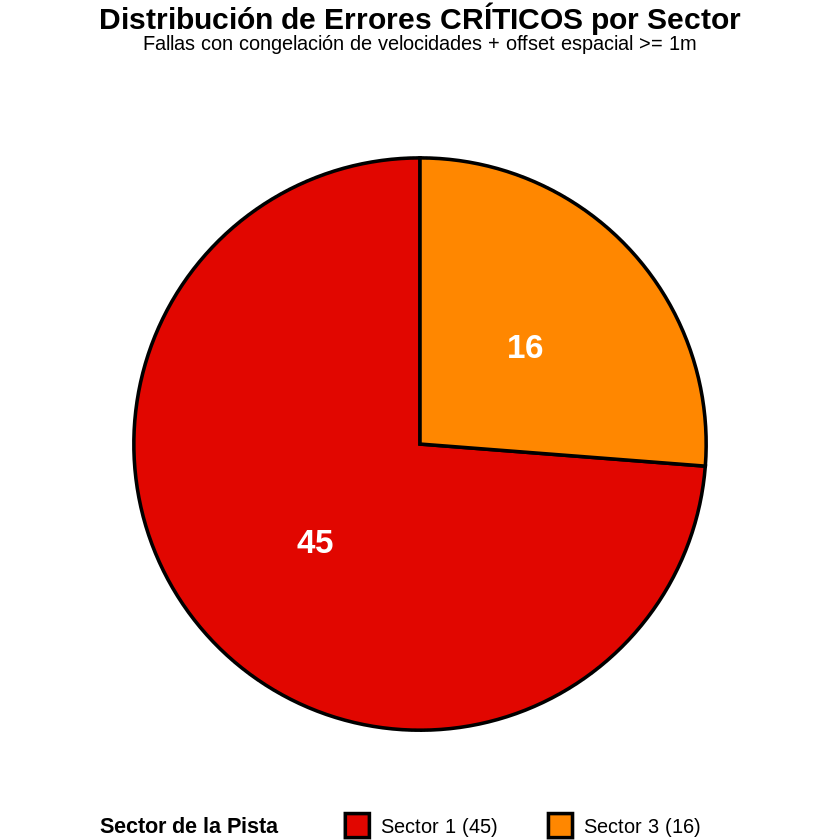

In [71]:
conteo_criticos_sector <- falla_espacial_critica %>%
  group_by(sector) %>%
  summarise(N_Fallas = n(), .groups = 'drop') %>%
  mutate(
    Porcentaje = N_Fallas / sum(N_Fallas) * 100,
  )


grafico_criticos_sector <- ggplot(conteo_criticos_sector,
                                   aes(x = "", y = N_Fallas, fill = sector)) +
  geom_bar(stat = "identity", width = 1, color = "black", linewidth = 1) +
  coord_polar(theta = "y", start = 0) +

  geom_text(aes(label = N_Fallas),
            position = position_stack(vjust = 0.5),
            size = 7, fontface = "bold", color = "white") +

  scale_fill_manual(
    values = c(
      "S1" = "#E10600",
      "S2" = "#0A0A9C",
      "S3" = "#FF8700"
    ),
    labels = c(
      "S1" = paste0("Sector 1 (", conteo_criticos_sector$N_Fallas[conteo_criticos_sector$sector == "S1"], ")"),
      "S2" = paste0("Sector 2 (", conteo_criticos_sector$N_Fallas[conteo_criticos_sector$sector == "S2"], ")"),
      "S3" = paste0("Sector 3 (", conteo_criticos_sector$N_Fallas[conteo_criticos_sector$sector == "S3"], ")")
    )
  ) +

  labs(
    title = "Distribución de Errores CRÍTICOS por Sector",
    subtitle = "Fallas con congelación de velocidades + offset espacial >= 1m",
    fill = "Sector de la Pista",
    x = NULL,
    y = NULL
  ) +

  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 12, margin = margin(b = 20)),
    legend.position = "bottom",
    legend.title = element_text(face = "bold", size = 13),
    legend.text = element_text(size = 12)
  )

print(grafico_criticos_sector)

cat("\n=== TABLA: Errores CRÍTICOS por Sector ===\n")
print(conteo_criticos_sector)

Hicimos la prueba para encontrar los errores no críticos, que son los que tienen la inconsistencia de posición y donde las velocidades no están congeladas. Encontramos 70 registros de este tipo. Lo que observamos con ellos es:

1. La diferencia de posición entre binIndex y lap_distance es exactamente igual a un metro en casi todos los registros (68 de 70). Esto confirma que se trata de un error de otra naturaleza como un desfase simple, no de una congelación.
2. Estos 70 registros no tienen un patrón claro en la pista. Ocurren en diferentes lugares y no se concentran solo al principio o al final de la vuelta, lo que confirma que no son parte del bug principal de congelación del sensor.

In [72]:
falla_espacial_no_critica <- fallas_espaciales %>%
  filter(velocidades_congeladas == FALSE) %>%
  select(
    carId, lapNum, binIndex, lap_distance, discrepancia_espacial,
    sector, lap_time_invalid,
    DIF_lap_time, DIF_vel_X, DIF_vel_Y, DIF_vel_Z,
    lap_time, velocity_X, velocity_Y, velocity_Z
  )

cat("\n=== ERRORES NO CRÍTICOS (Solo Offset Espacial) ===\n")
cat("Cantidad de registros:", nrow(falla_espacial_no_critica), "\n")
cat("Descripción: Error de calibración/ruido en sensores de posición, pero el auto se mueve\n\n")
print(falla_espacial_no_critica, n = Inf, width = Inf)


=== ERRORES NO CRÍTICOS (Solo Offset Espacial) ===
Cantidad de registros: 70 
Descripción: Error de calibración/ruido en sensores de posición, pero el auto se mueve

# A tibble: 70 × 15
   carId lapNum binIndex lap_distance discrepancia_espacial sector
   <chr>  <dbl>    <int>        <dbl>                 <dbl> <chr> 
 1 FER        0      908       909                     1    S1    
 2 FER        0     3989      3990                     1    S3    
 3 FER        2      289       290                     1    S1    
 4 FER        3     4293      4294                     1    S3    
 5 FER        4        1         2.64                  1.64 S1    
 6 FER        4        2         3.08                  1.08 S1    
 7 RED        1      441       442                     1    S1    
 8 RED        1     4293      4294                     1    S3    
 9 RED        2     4293      4294                     1    S3    
10 MCL        0      554       555                     1    S1    
11 MCL   

Hicimos otro sectograma para ver cómo se distribuyen todos los registros de datos por sector de la pista. Observamos que, al contrario de lo que pasaba con las fallas críticas, la mayoría de los datos está en el S2. A pesar de eso, los otros dos sectores (S1 y S3) también tienen una parte importante de los datos.


=== TABLA: Errores NO CRÍTICOS por Sector ===
# A tibble: 3 × 3
  sector N_Fallas Porcentaje
  <chr>     <int>      <dbl>
1 S1           12       17.1
2 S2           32       45.7
3 S3           26       37.1


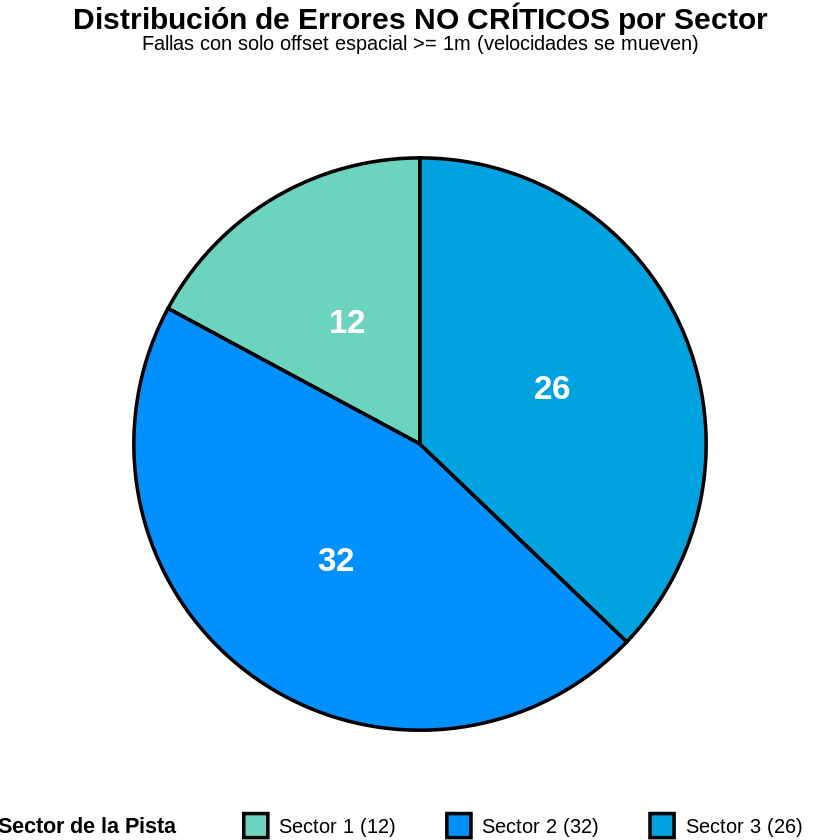

In [73]:
conteo_no_criticos_sector <- falla_espacial_no_critica %>%
  group_by(sector) %>%
  summarise(N_Fallas = n(), .groups = 'drop') %>%
  mutate(
    Porcentaje = N_Fallas / sum(N_Fallas) * 100,
  )

grafico_no_criticos_sector <- ggplot(conteo_no_criticos_sector,
                                      aes(x = "", y = N_Fallas, fill = sector)) +
  geom_bar(stat = "identity", width = 1, color = "black", linewidth = 1) +
  coord_polar(theta = "y", start = 0) +

  geom_text(aes(label = N_Fallas),
            position = position_stack(vjust = 0.5),
            size = 7, fontface = "bold", color = "white") +

  scale_fill_manual(
    values = c(
      "S1" = "#6CD3BF",
      "S2" = "#0090FF",
      "S3" = "#00A3E0"
    ),
    labels = c(
      "S1" = paste0("Sector 1 (", conteo_no_criticos_sector$N_Fallas[conteo_no_criticos_sector$sector == "S1"], ")"),
      "S2" = paste0("Sector 2 (", conteo_no_criticos_sector$N_Fallas[conteo_no_criticos_sector$sector == "S2"], ")"),
      "S3" = paste0("Sector 3 (", conteo_no_criticos_sector$N_Fallas[conteo_no_criticos_sector$sector == "S3"], ")")
    )
  ) +

  labs(
    title = "Distribución de Errores NO CRÍTICOS por Sector",
    subtitle = "Fallas con solo offset espacial >= 1m (velocidades se mueven)",
    fill = "Sector de la Pista",
    x = NULL,
    y = NULL
  ) +

  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 12, margin = margin(b = 20)),
    legend.position = "bottom",
    legend.title = element_text(face = "bold", size = 13),
    legend.text = element_text(size = 12)
  )

print(grafico_no_criticos_sector)

cat("\n=== TABLA: Errores NO CRÍTICOS por Sector ===\n")
print(conteo_no_criticos_sector)

In [74]:
options(repr.plot.width = 20, repr.plot.height = 14)

#Actividad 2

Elabore un gráfico que muestre el tiempo por vuelta para cada uno de los vehículos. En el eje de las abscisas (X), se representarán las vueltas, mientras que en el eje de las ordenadas (Y) se plasmará el tiempo empleado por cada vehículo en cada vuelta.

In [75]:
lap_times_summary <- telemetria_vueltas_invalidadas %>%
  group_by(carId, lap_number) %>%
  summarise(total_lap_time = max(lap_time, na.rm = TRUE), .groups = 'drop')

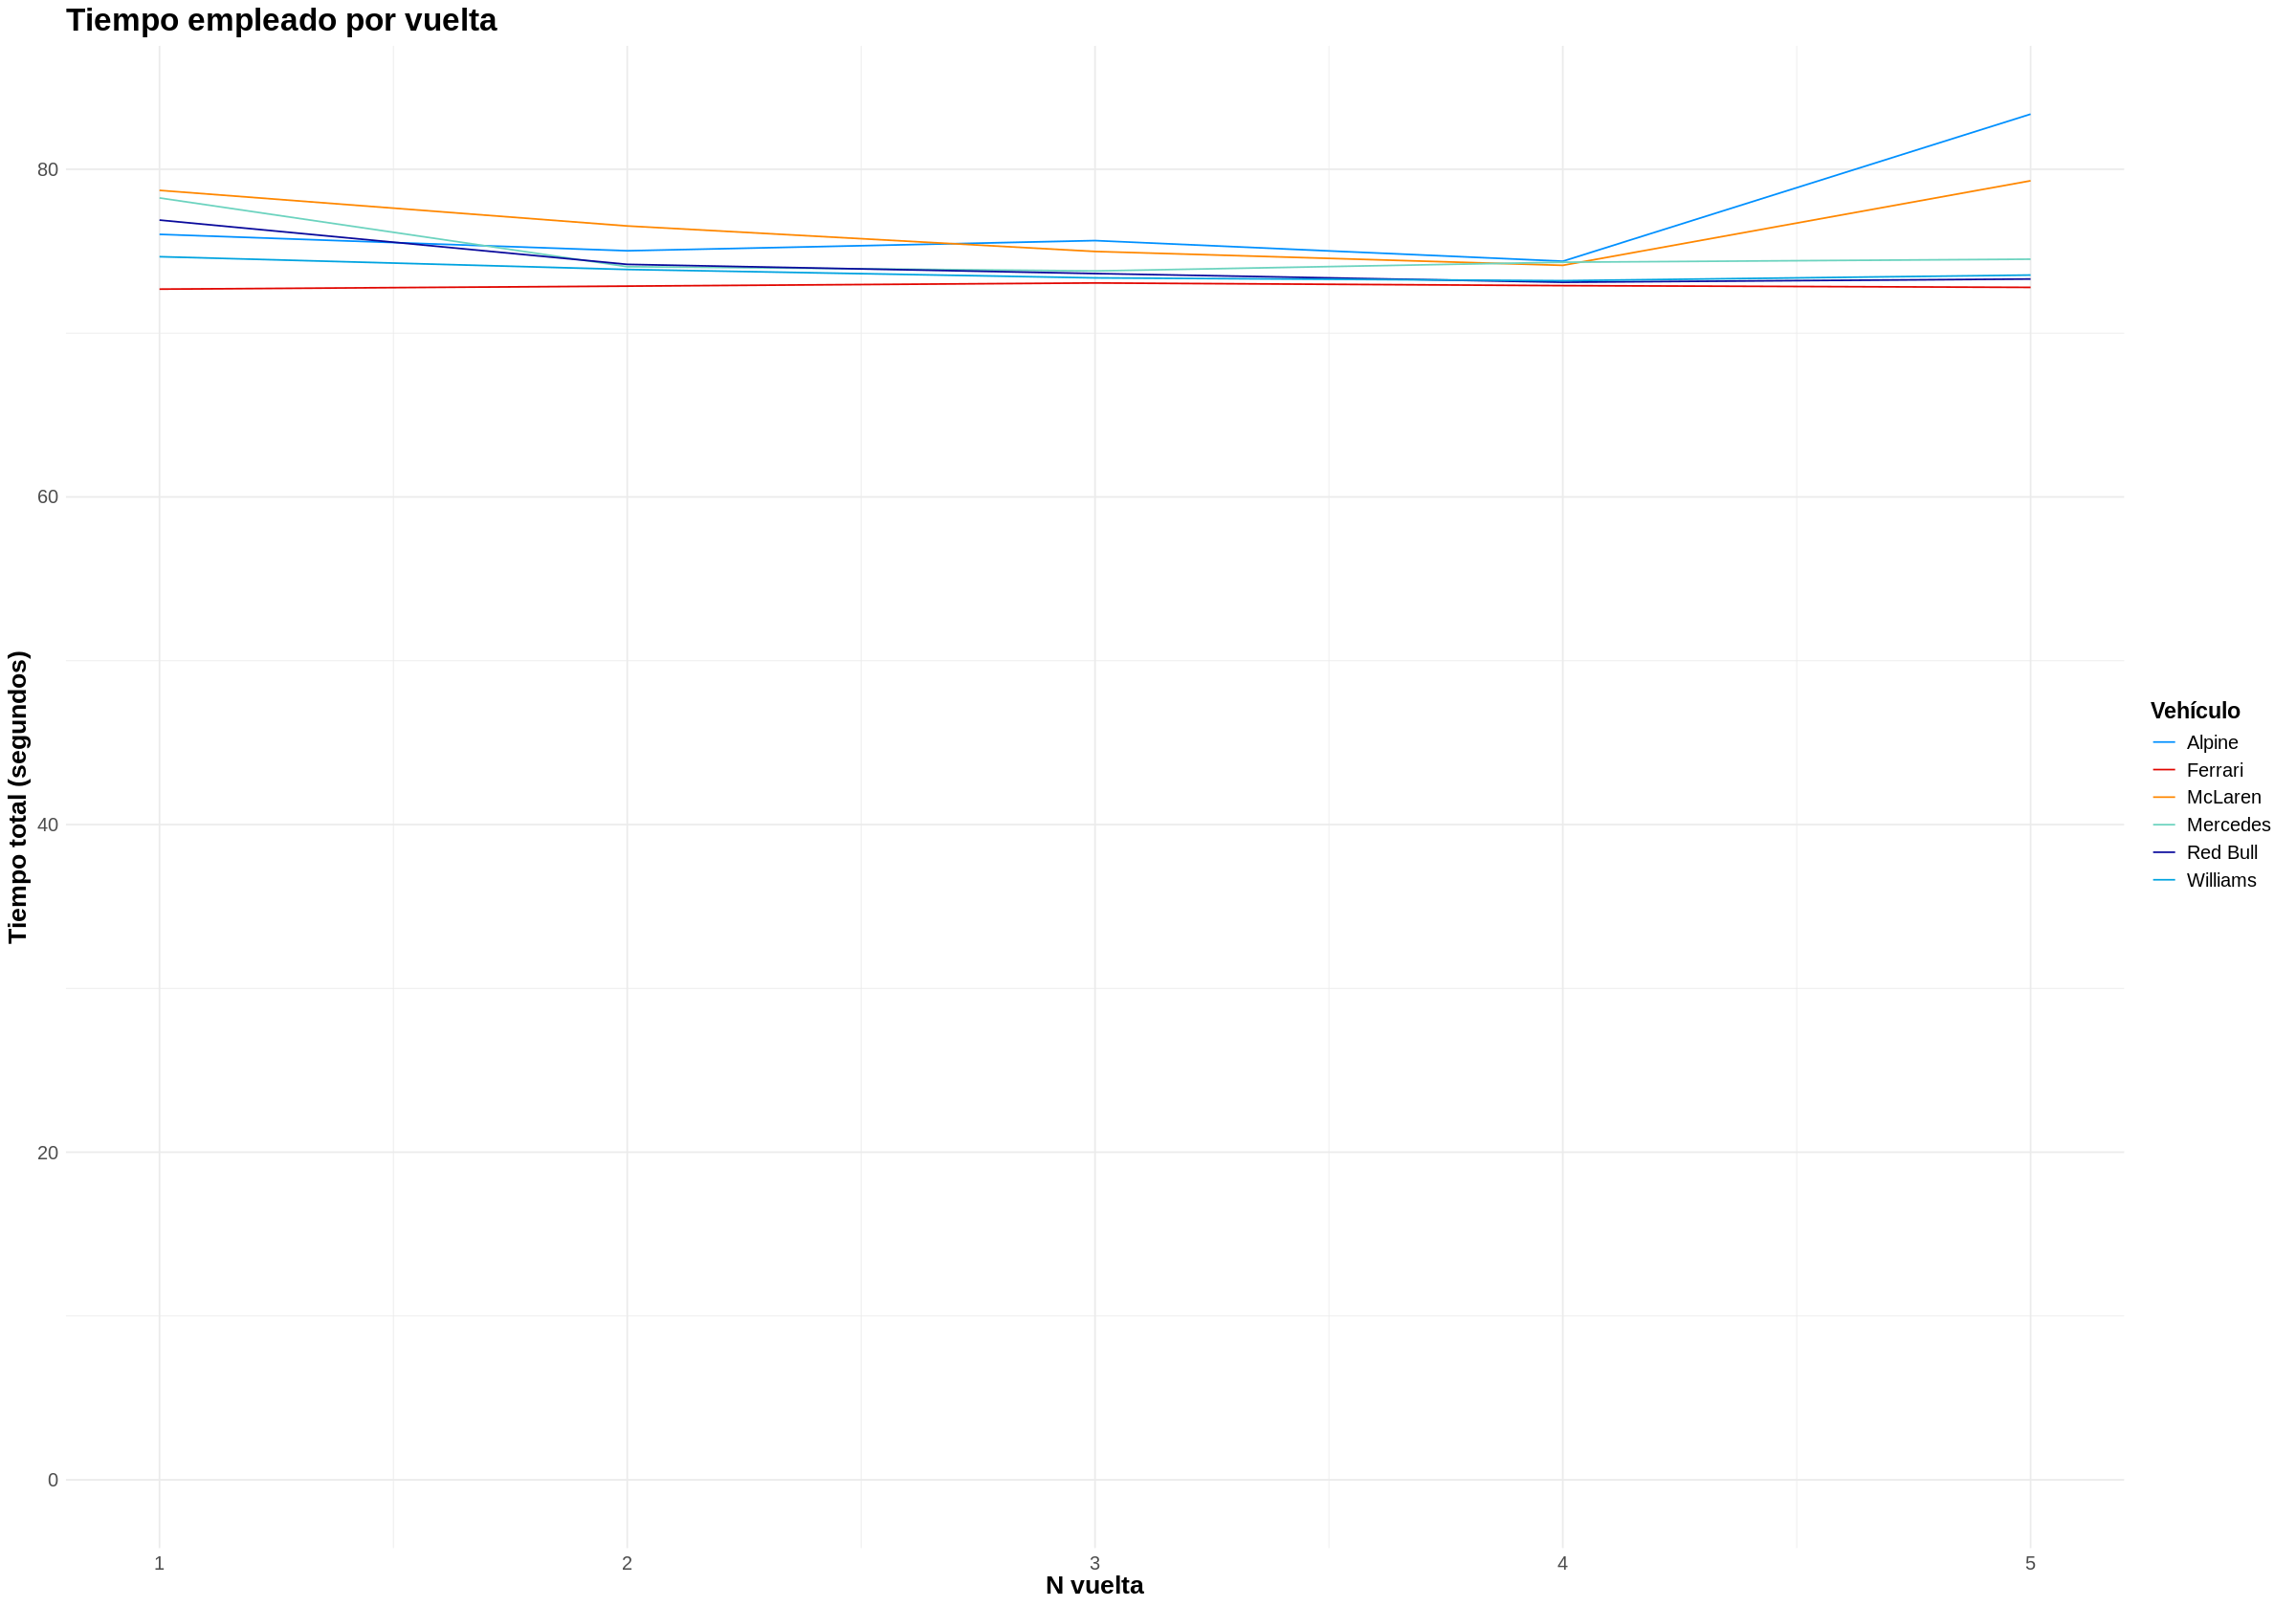

In [76]:
colores_f1 <- c(
  "FER" = "#E10600",
  "RED" = "#0A0A9C",
  "MCL" = "#FF8700",
  "MER" = "#6CD3BF",
  "ALP" = "#0090FF",
  "WIL" = "#00A3E0"
)

full_team_names <- c(
  "FER" = "Ferrari",
  "RED" = "Red Bull",
  "MCL" = "McLaren",
  "MER" = "Mercedes",
  "ALP" = "Alpine",
  "WIL" = "Williams"
)

lap_times_summary_full <- lap_times_summary %>%
  mutate(full_carId = recode(carId, !!!full_team_names))

full_color_map <- setNames(colores_f1, full_team_names[names(colores_f1)])

ggplot(lap_times_summary_full, aes(x = lap_number, y = total_lap_time, color = full_carId)) +
  geom_line() +
  scale_color_manual(values = full_color_map, labels = full_team_names) +
  labs(
    title = "Tiempo empleado por vuelta",
    x = "N vuelta",
    y = "Tiempo total (segundos)",
    color = "Vehículo"
  ) +
  ylim(0, NA) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.title = element_text(size = 14, face = "bold"),
    legend.text = element_text(size = 12)
  )

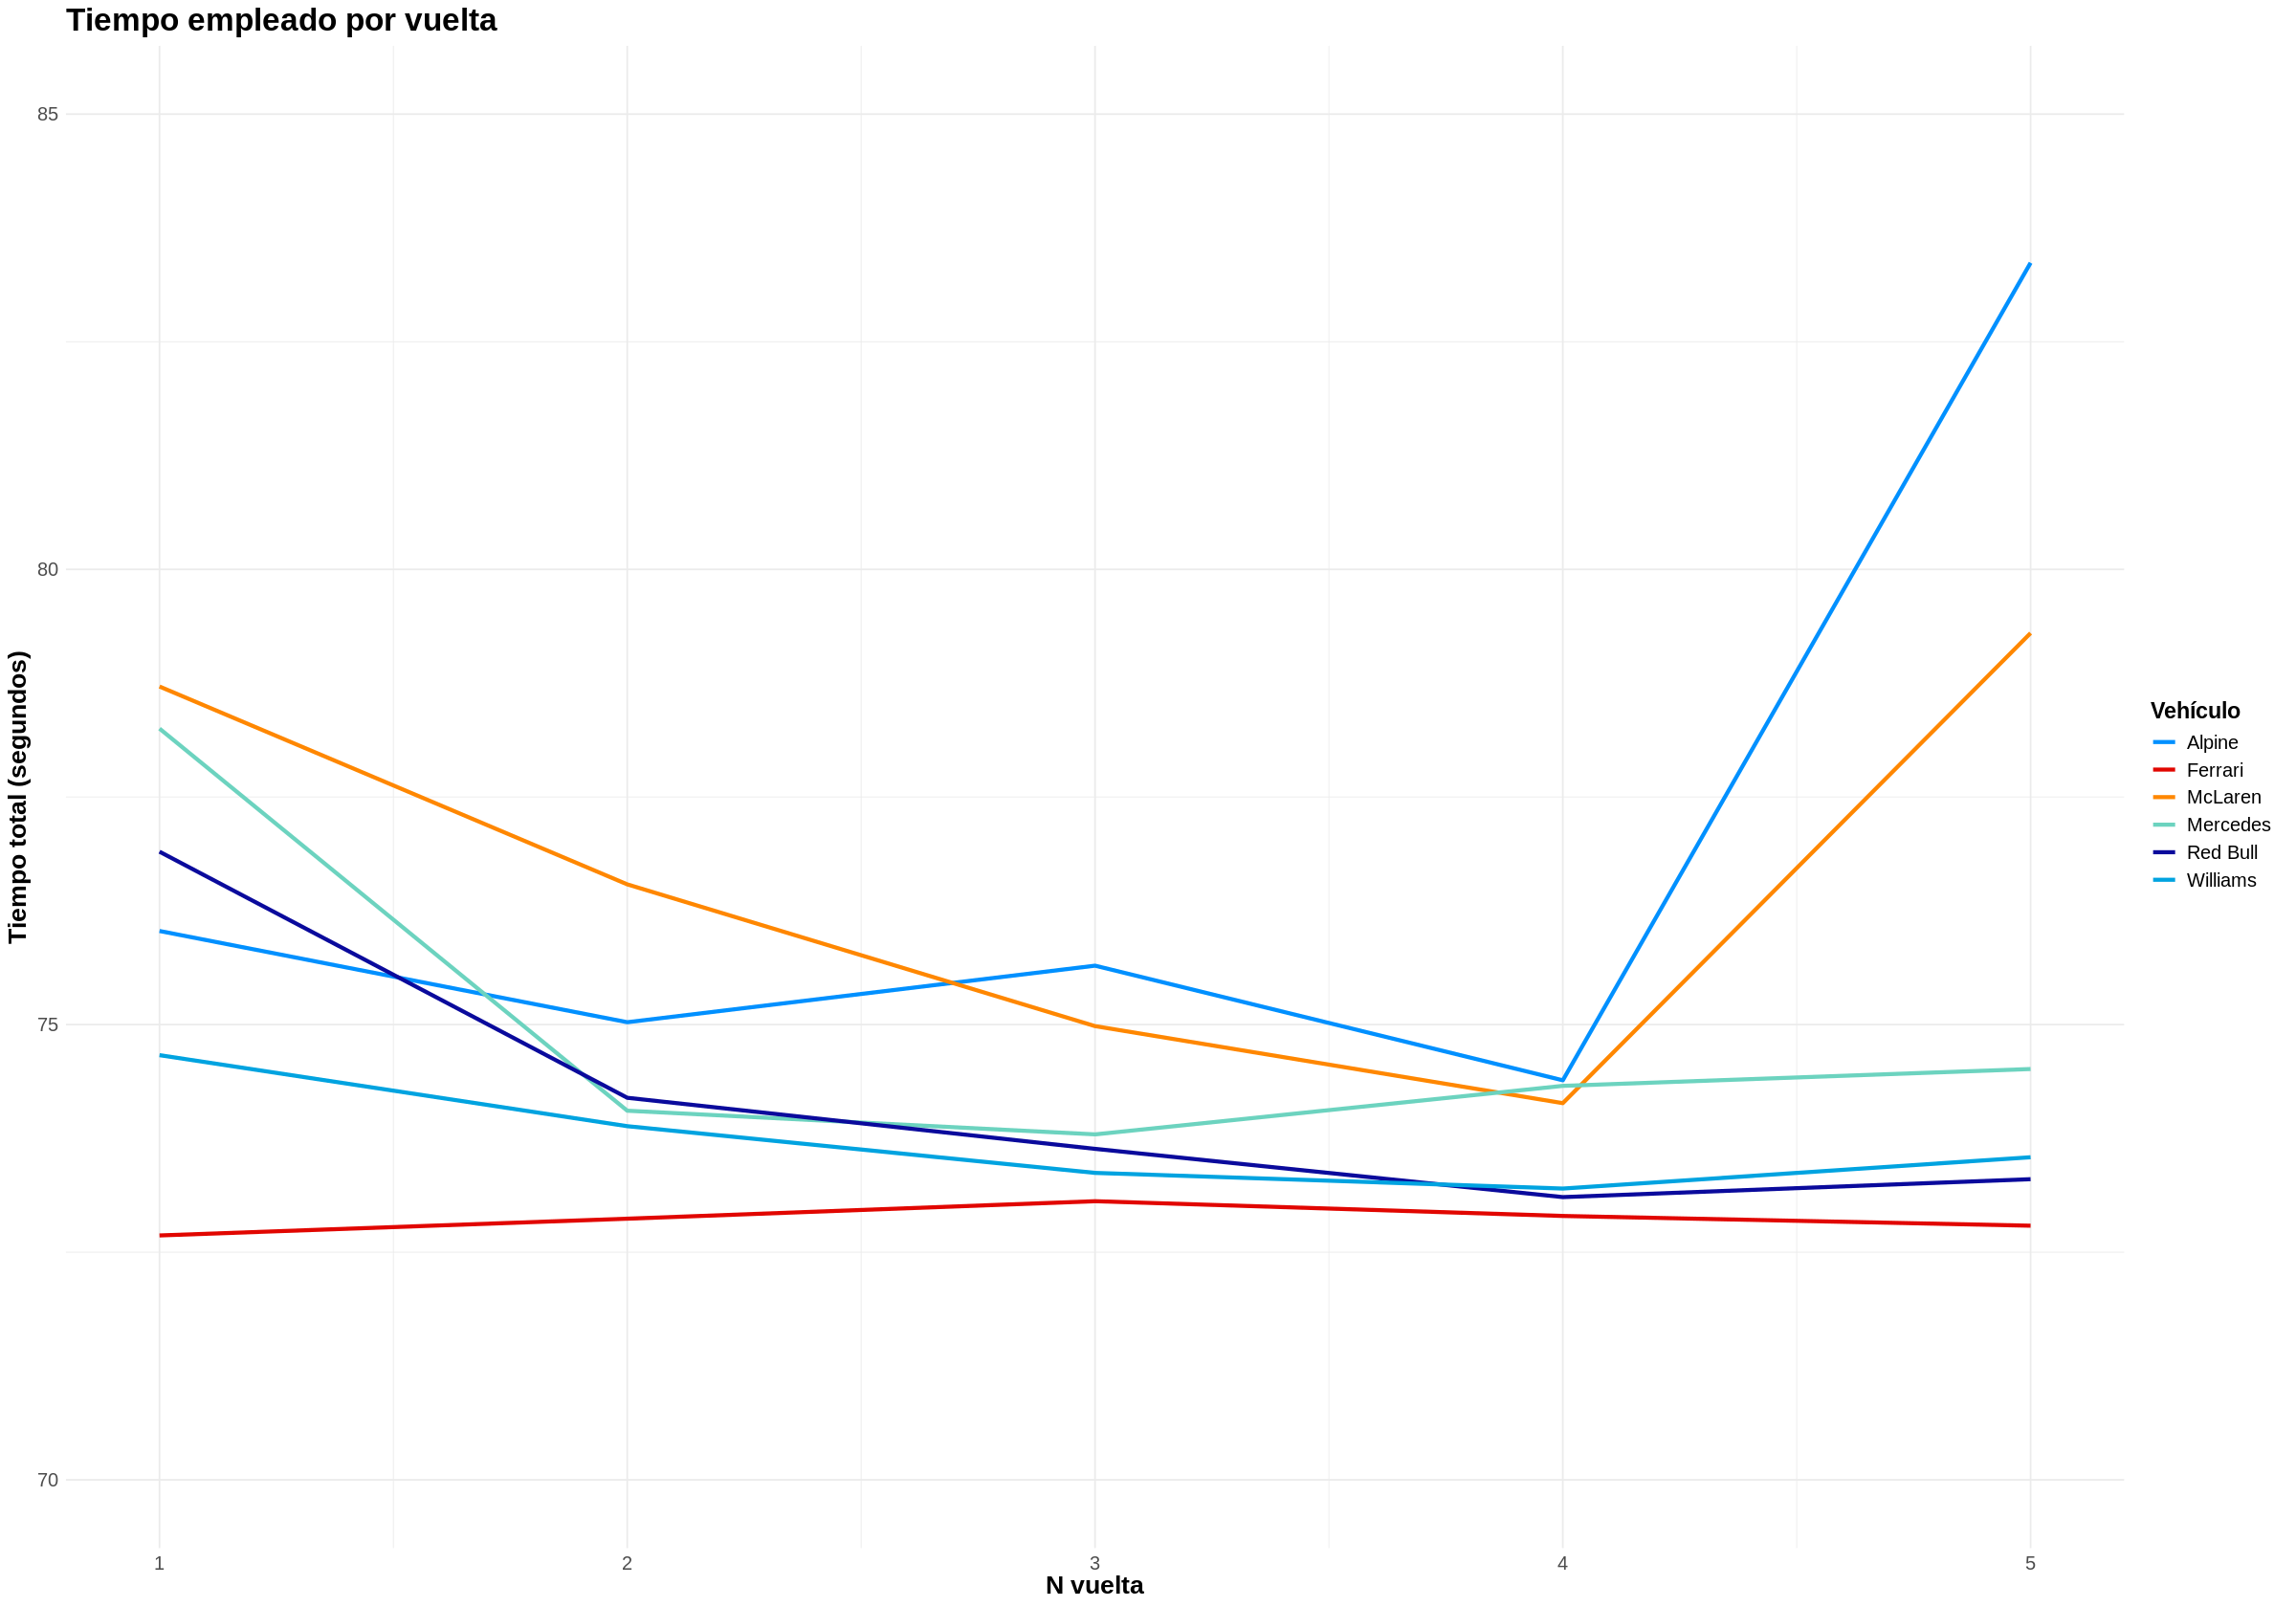

In [77]:
full_color_map <- setNames(colores_f1, full_team_names[names(colores_f1)])

ggplot(lap_times_summary_full, aes(x = lap_number, y = total_lap_time, color = full_carId)) +
  geom_line(linewidth = 1.2) +
  scale_color_manual(values = full_color_map, labels = full_team_names) +
  labs(
    title = "Tiempo empleado por vuelta",
    x = "N vuelta",
    y = "Tiempo total (segundos)",
    color = "Vehículo"
  ) +
  ylim(70, 85) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.title = element_text(size = 14, face = "bold"),
    legend.text = element_text(size = 12)
  )

In [78]:
lap_times_summary

carId,lap_number,total_lap_time
<chr>,<dbl>,<dbl>
ALP,1,76.028
ALP,2,75.026
ALP,3,75.647
ALP,4,74.388
ALP,5,83.367
FER,1,72.684
FER,2,72.868
FER,3,73.060
FER,4,72.898


El gráfico de nos permite observar el rendimiento de cada escudería a lo largo de cinco vueltas.


*   **Ferrari** y **Red Bull** demuestran ser las escuderías con los tiempos de vuelta más consistentes y rápidos en general, manteniéndose alrededor de los 72-73 segundos por vuelta.

*   **Mercedes** también exhibe un rendimiento sólido y consistente, con tiempos de vuelta ligeramente superiores a Ferrari y Red Bull, pero muy estables.

*   **McLaren** y **Williams** muestran tiempos de vuelta competitivos en las primeras vueltas, pero Williams presenta una leve tendencia a aumentar sus tiempos en las últimas vueltas válidas.

*   **Alpine** presenta una anomalía significativa en la vuelta 5, donde su tiempo total de vuelta se dispara a 83.4 segundos, mientras que el resto de sus vueltas están en el rango de 74-76 segundos.

*   La **consistencia** es una característica notable para la mayoría de las escuderías en sus vueltas válidas (1 a 4), lo que indica un rendimiento estable bajo condiciones de carrera normales.

#Actividad 3

Represente gráficamente la información correspondiente a los tiempos de vuelta para cada vehículo mediante diagramas de caja (boxplots) y diagrama de violín.

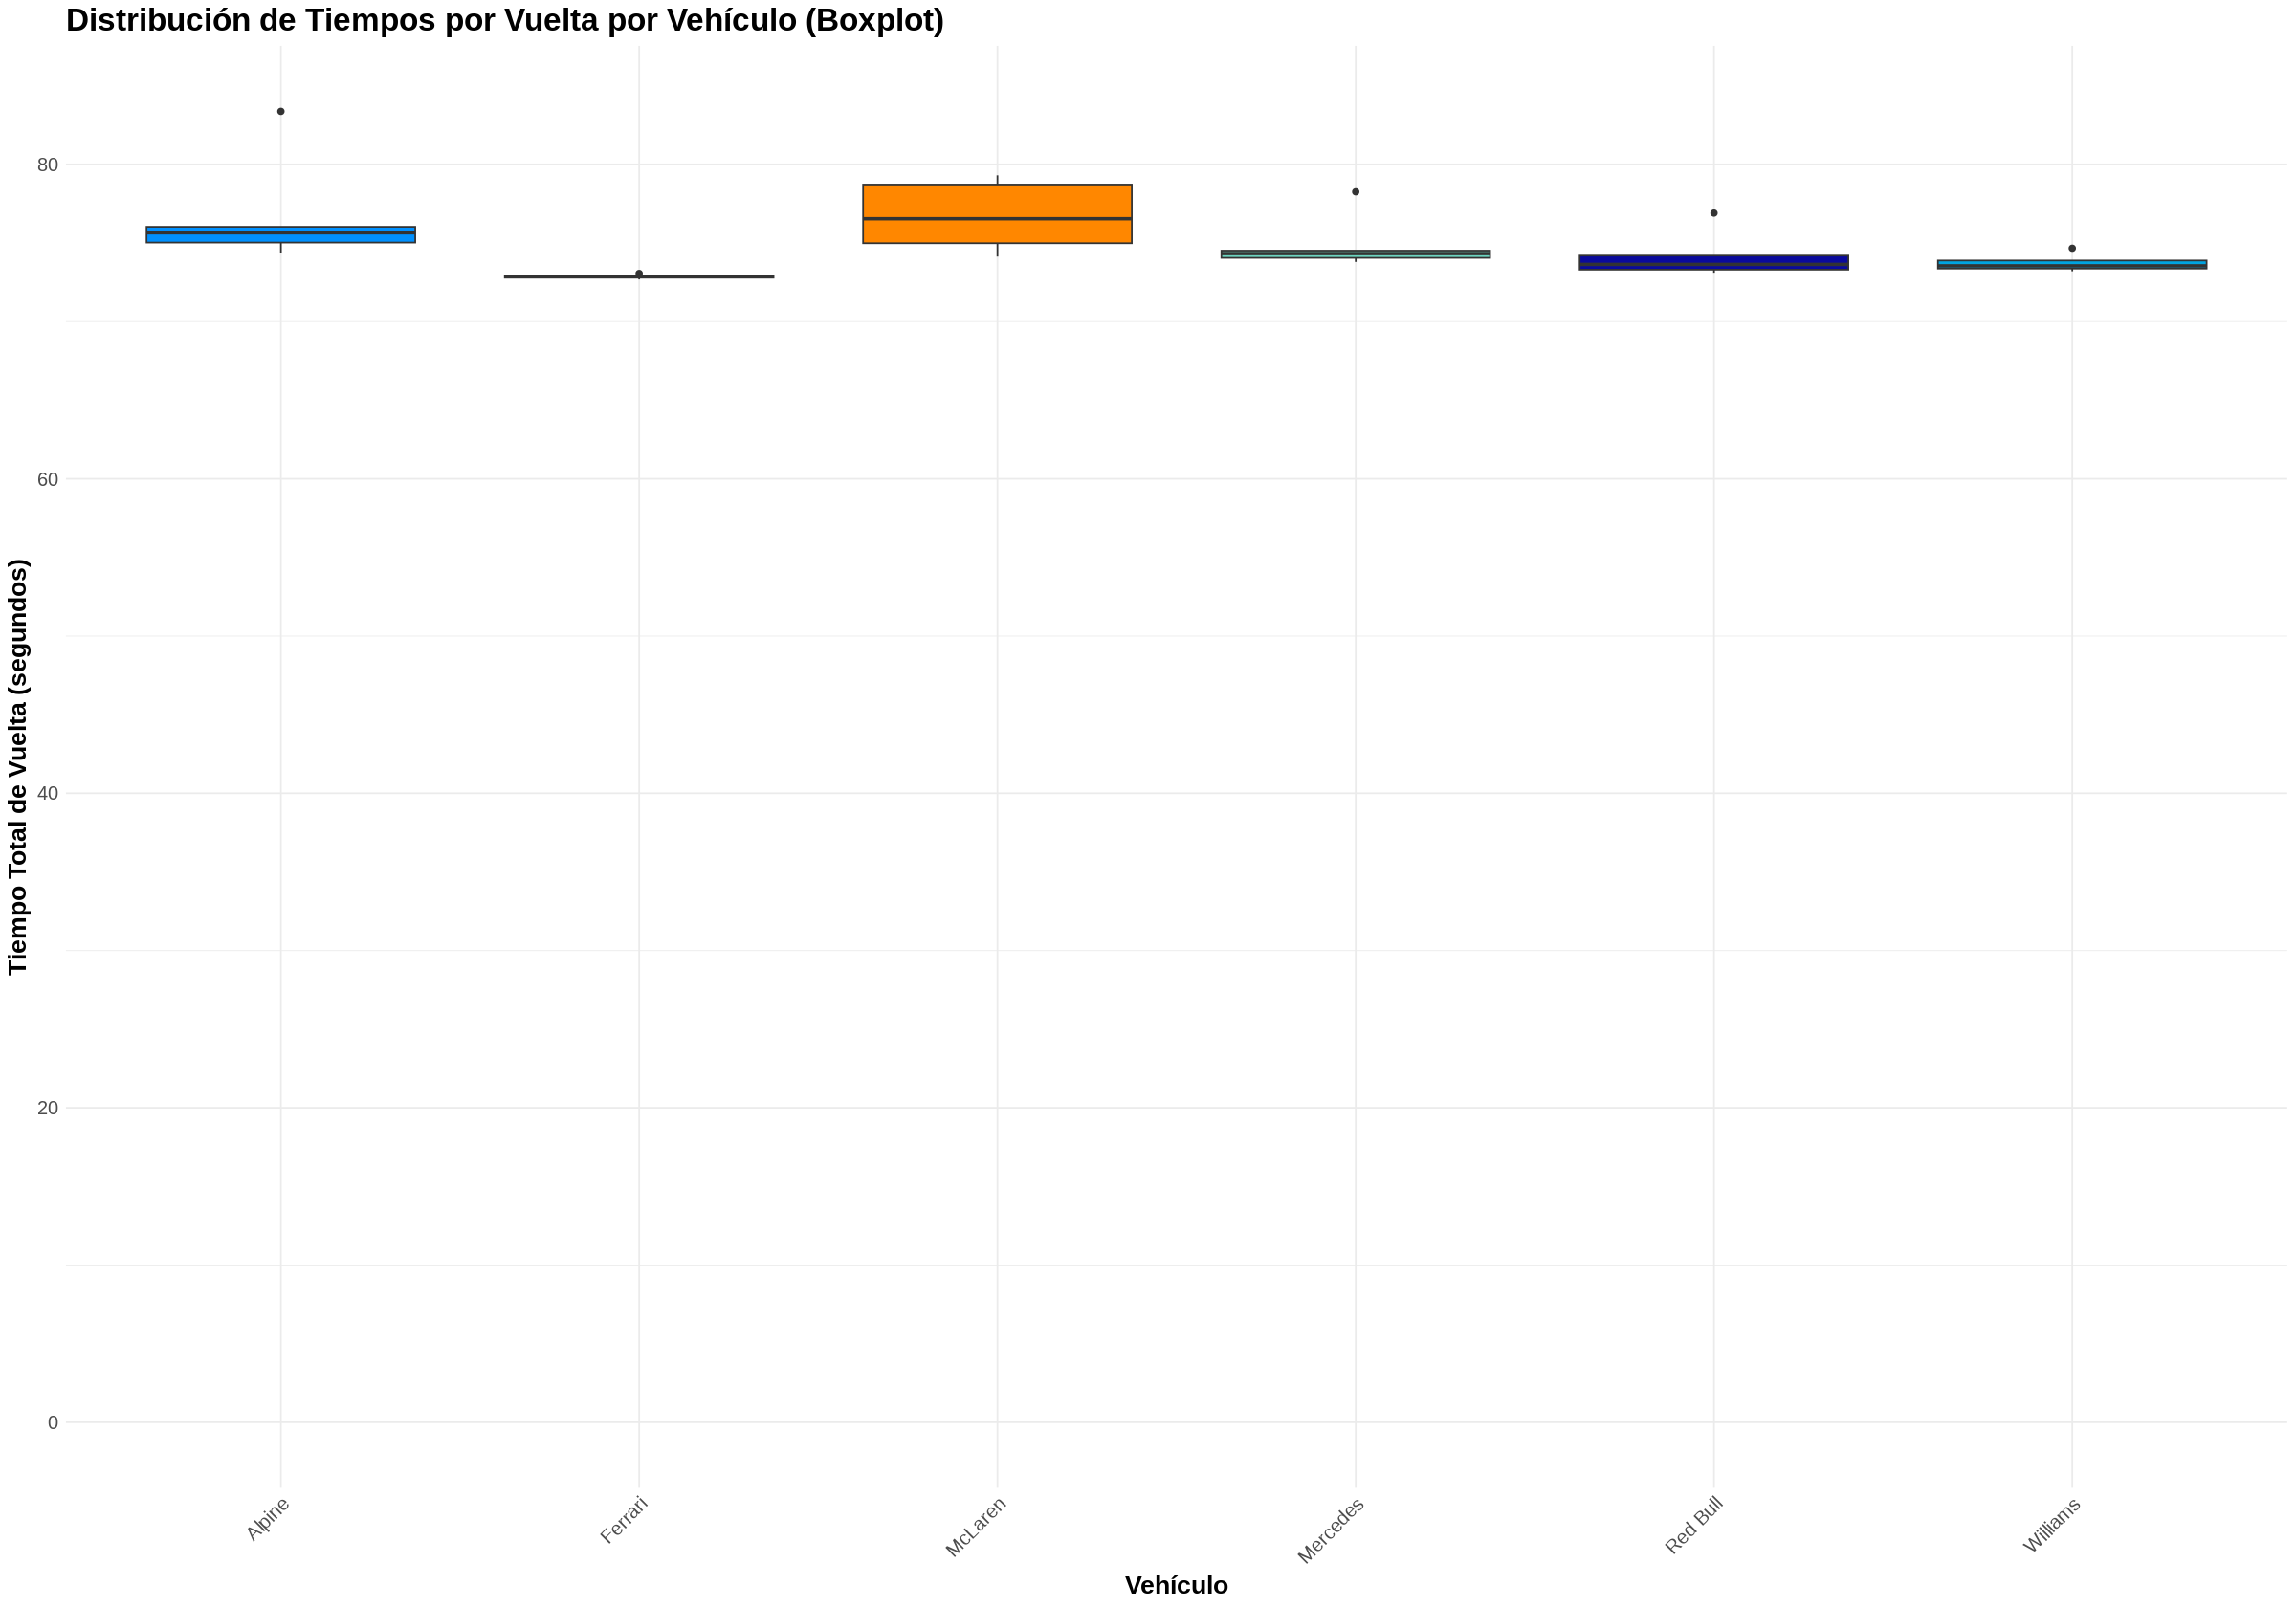

In [79]:
ggplot(lap_times_summary_full, aes(x = full_carId, y = total_lap_time, fill = carId)) +
  geom_boxplot() +
  scale_fill_manual(values = colores_f1, labels = full_team_names) +
  labs(
    title = "Distribución de Tiempos por Vuelta por Vehículo (Boxplot)",
    x = "Vehículo",
    y = "Tiempo Total de Vuelta (segundos)"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12)
  ) +
  expand_limits(y = 0)

En este gráfico dejamos la escala real en el eje y (del 0 al valor máximo)

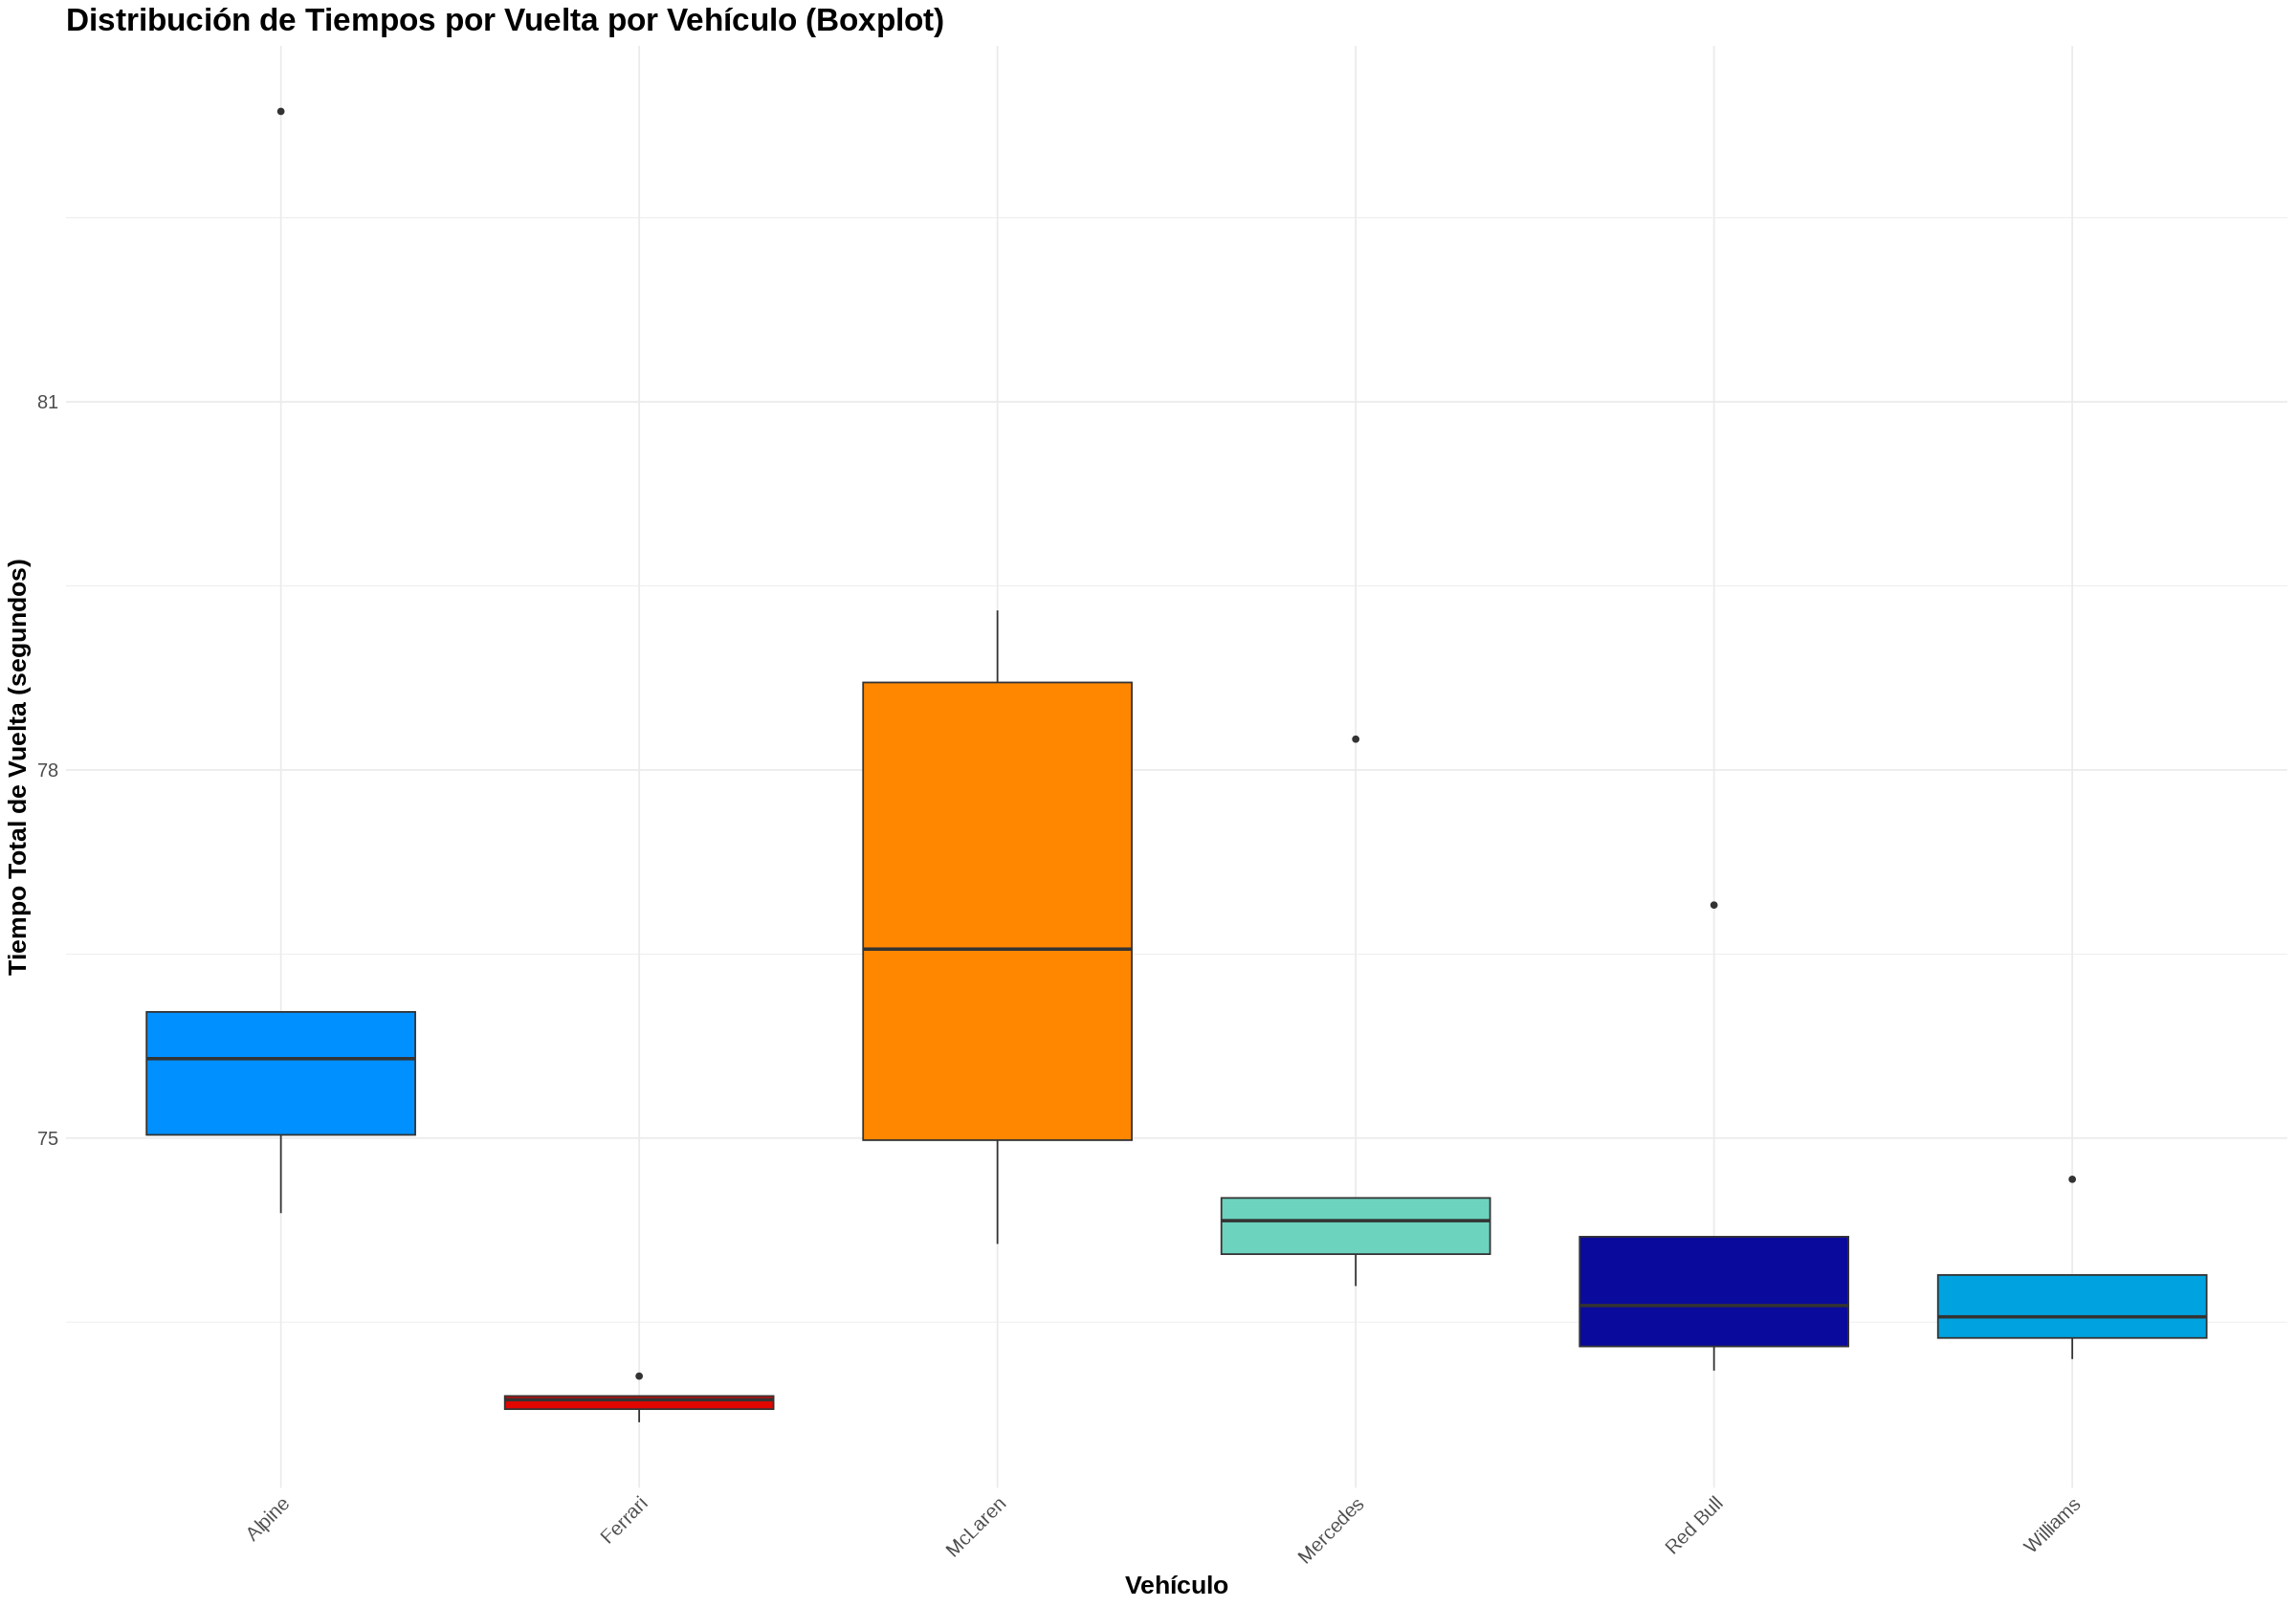

In [80]:
ggplot(lap_times_summary_full, aes(x = full_carId, y = total_lap_time, fill = carId)) +
  geom_boxplot() +
  scale_fill_manual(values = colores_f1, labels = full_team_names) +
  labs(
    title = "Distribución de Tiempos por Vuelta por Vehículo (Boxplot)",
    x = "Vehículo",
    y = "Tiempo Total de Vuelta (segundos)"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12)
  )

En este gráfico, la escala esta agrandada en el eje y (del valor mín al valor máx)

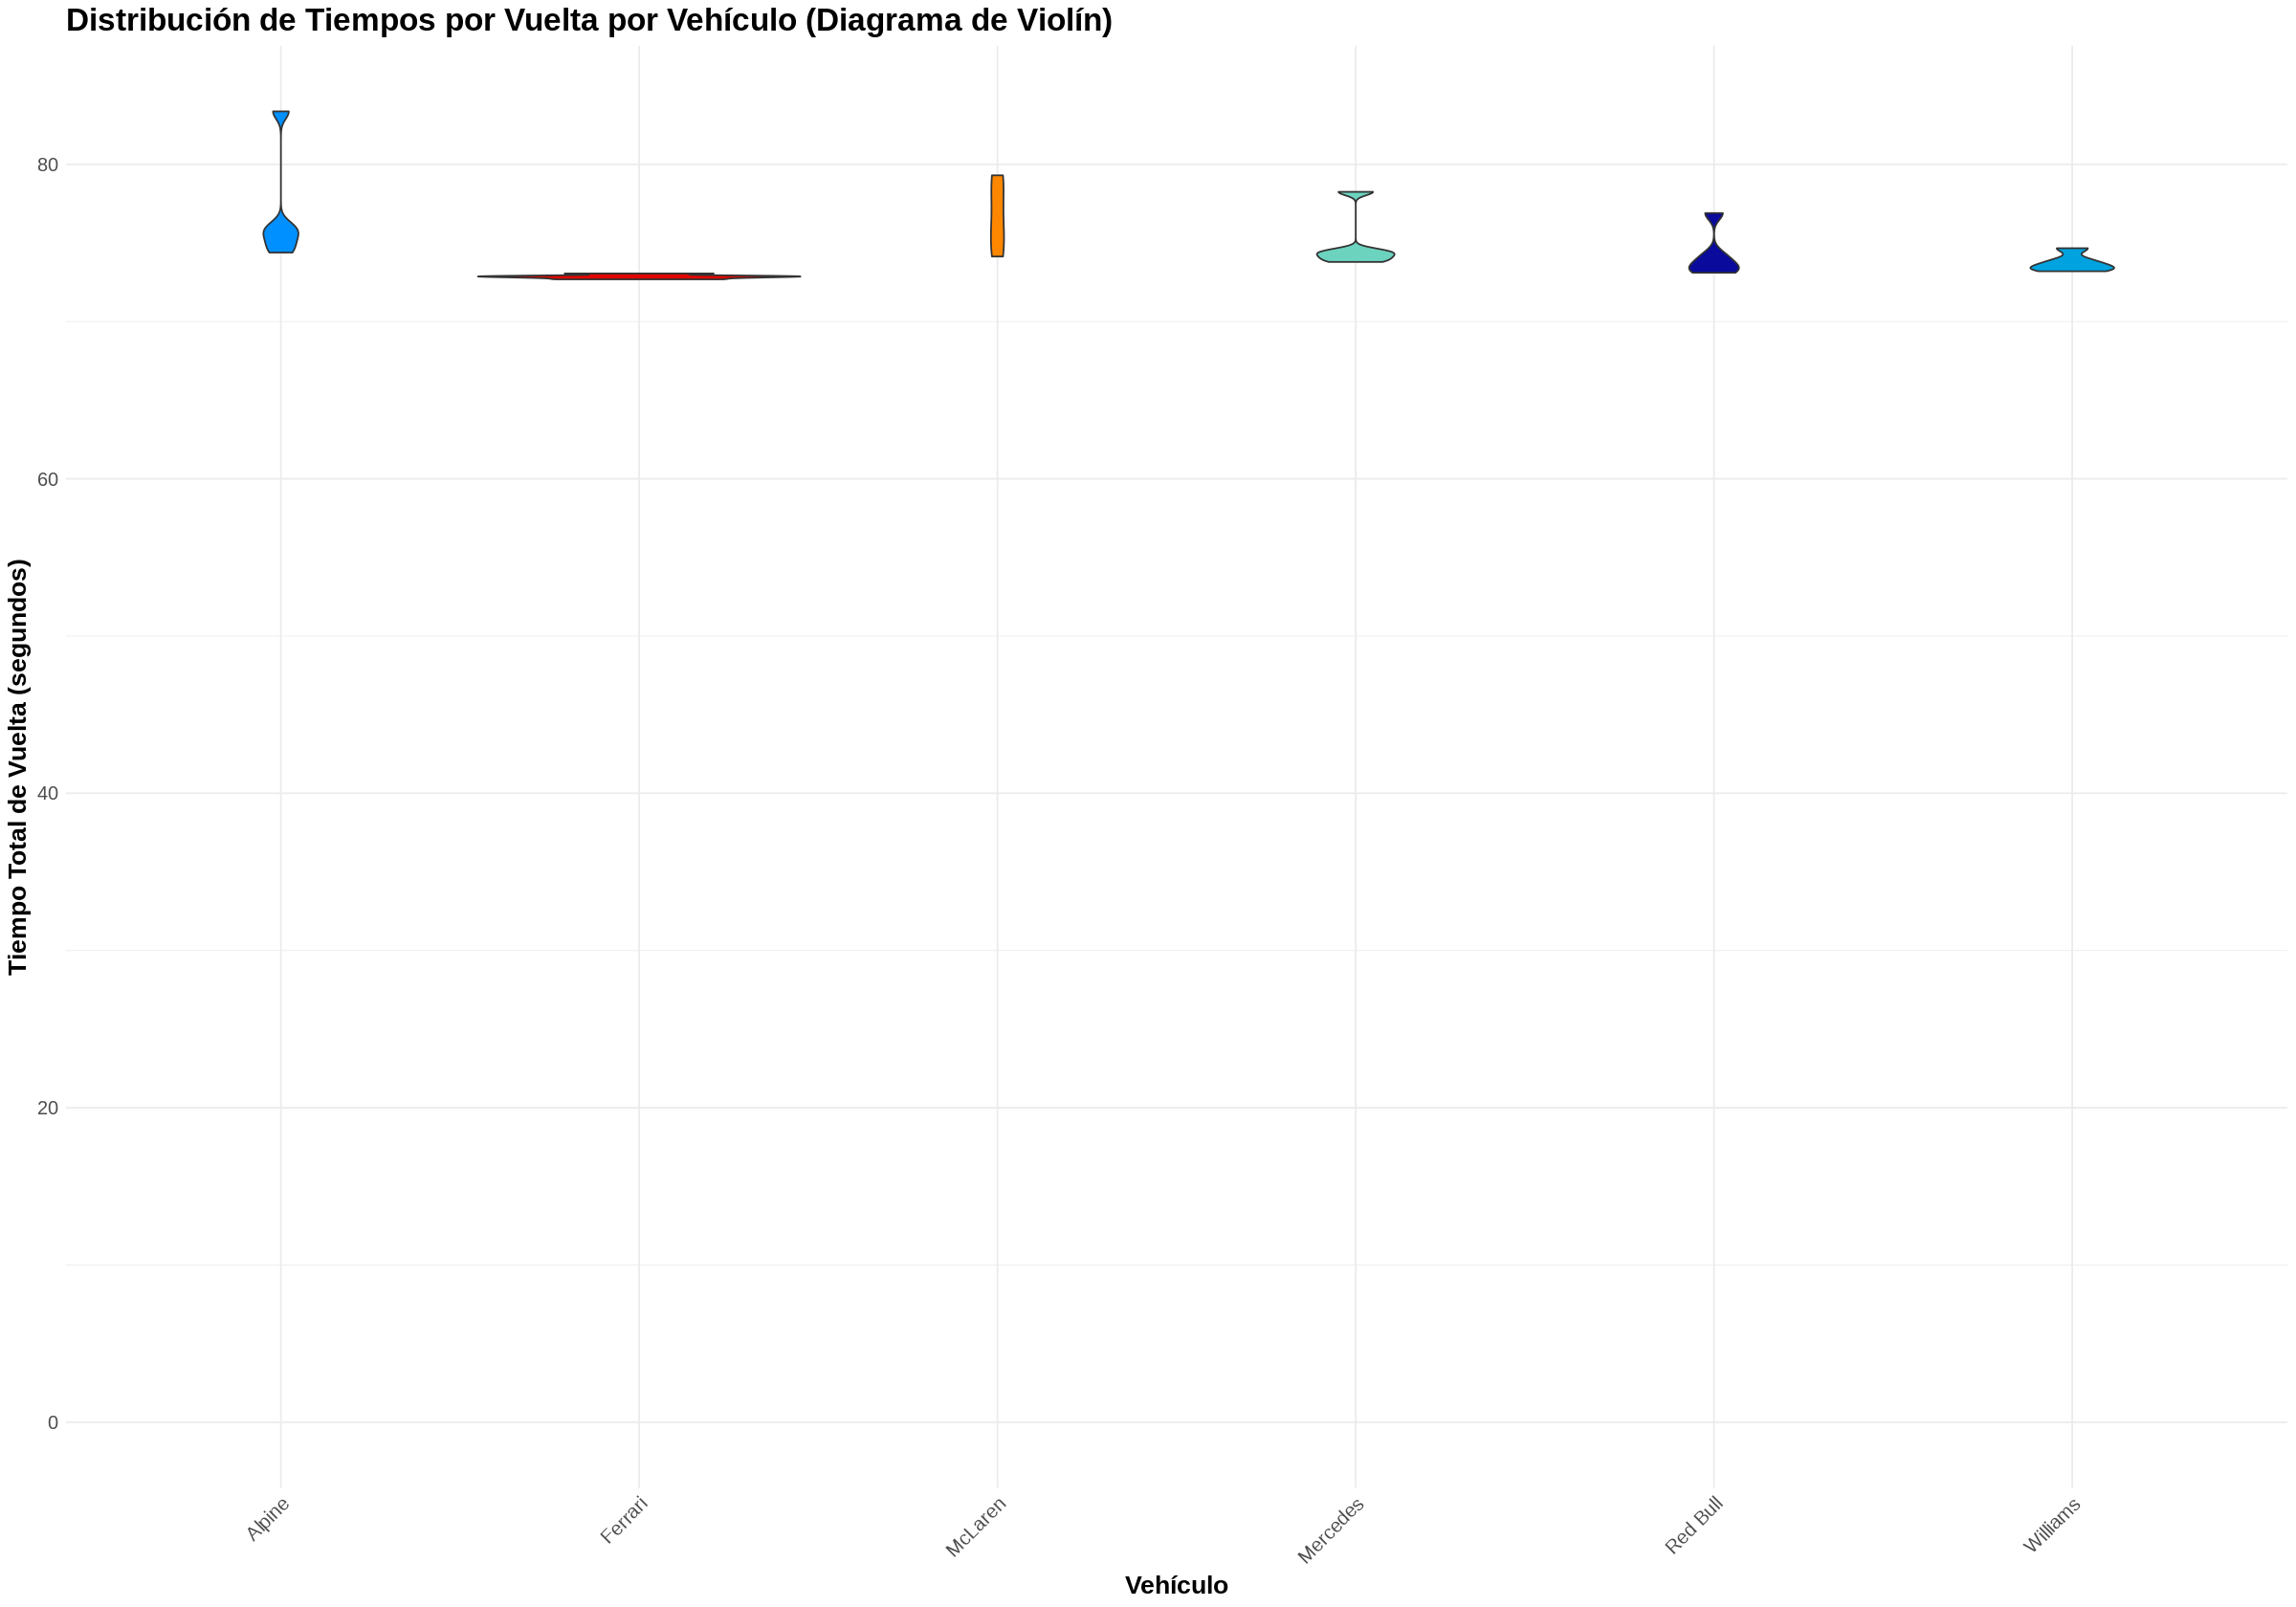

In [81]:
ggplot(lap_times_summary_full, aes(x = full_carId, y = total_lap_time, fill = carId)) +
  geom_violin() +
  scale_fill_manual(values = colores_f1, labels = full_team_names) +
  labs(
    title = "Distribución de Tiempos por Vuelta por Vehículo (Diagrama de Violín)",
    x = "Vehículo",
    y = "Tiempo Total de Vuelta (segundos)"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12)
  ) +
 expand_limits(y = 0)


En este gráfico dejamos la escala real en el eje y (del 0 al valor máximo)

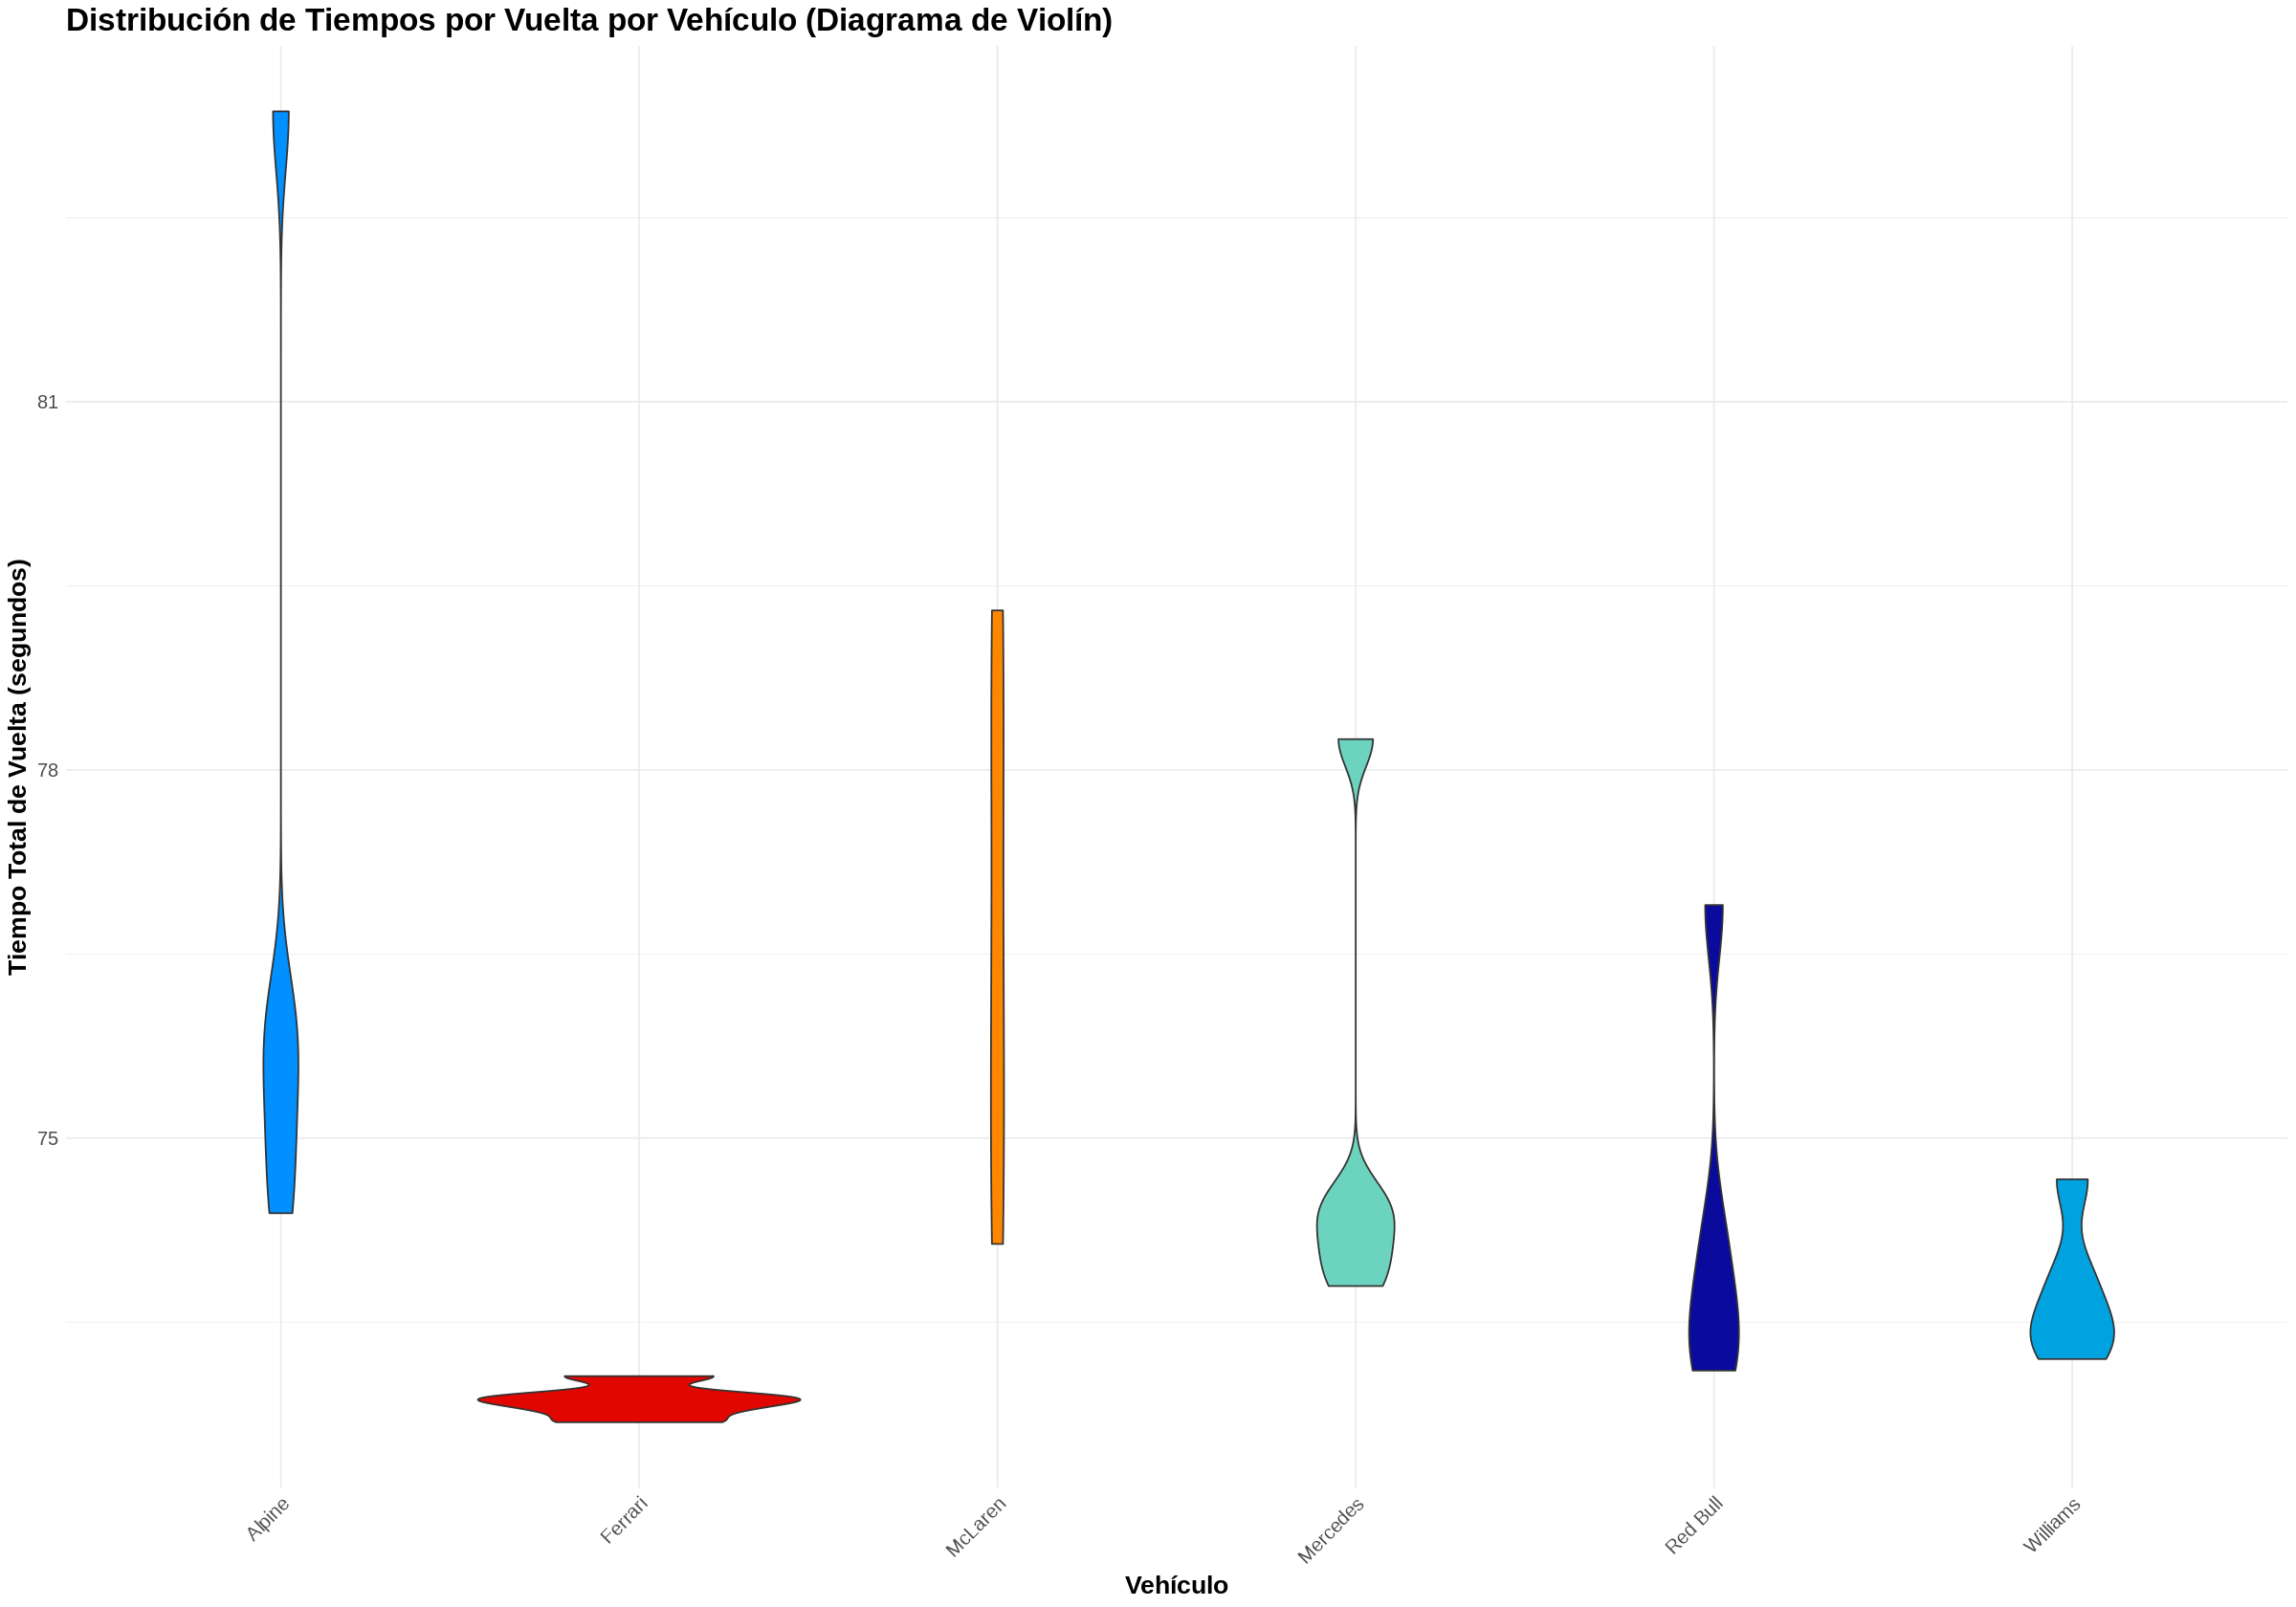

In [82]:
ggplot(lap_times_summary_full, aes(x = full_carId, y = total_lap_time, fill = carId)) +
  geom_violin() +
  scale_fill_manual(values = colores_f1, labels = full_team_names) +
  labs(
    title = "Distribución de Tiempos por Vuelta por Vehículo (Diagrama de Violín)",
    x = "Vehículo",
    y = "Tiempo Total de Vuelta (segundos)"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12)
  )

En este gráfico, la escala esta agrandada en el eje y (del valor mín al valor máx)

In [83]:
lap_times_summary_full_ordered <- lap_times_summary_full %>%
  arrange(desc(total_lap_time))

lap_times_summary_full_ordered

carId,lap_number,total_lap_time,full_carId
<chr>,<dbl>,<dbl>,<chr>
ALP,5,83.367,Alpine
MCL,5,79.300,McLaren
MCL,1,78.713,McLaren
MER,1,78.251,Mercedes
RED,1,76.899,Red Bull
MCL,2,76.540,McLaren
ALP,1,76.028,Alpine
ALP,3,75.647,Alpine
ALP,2,75.026,Alpine


El diagrama de violín es similar al boxplot, pero añade una representación de la densidad de probabilidad de los datos, lo que permite observar la forma de la distribución y la moda (picos de densidad) de los tiempos de vuelta para cada vehículo.
Por otro lado, yendo al análisis de los datos en sí, podemos concluír que;
Ferrari y Williams son los que menos distribución tienen, todos sus tiempos se mantuvieron dentro de un rango específico, mientras que todo el resto muestra valores más dispersos.
En el caso de Alpine, como fue anteriormente mencionado, da un salto de sus tiempos anteriores(Más consistentes) a 83.4.
En el caso de Mercedes y Redbull, también vemos que sus datos están dispersos, aunque no de forma tan extrema como Alpine.
Por último, McClaren parece tener una distribución simétrica - la diferencia entre un tiempo y otro es muy similar, haciendo que tanto en el boxplot como en el violín se vean uniformes sus representaciones gráficas.

#Actividad 4

Elabore un cuadro donde se muestre para cada uno de los vehículos, el mejor tiempo de vuelta (lap_time), el mejor tiempo registrado en cada uno de los sectores y la velocidad máxima registrada en cada uno de los vehículos. El gráfico debe estar ordenado en base al mejor tiempo de vuelta del más rápido al más lento.

In [84]:
best_lap_overall <- lap_times_summary %>%
  group_by(carId) %>%
  summarise(best_lap_time = min(total_lap_time, na.rm = TRUE))

sector_times_raw <- telemetria_vueltas_invalidadas %>%
  filter(binIndex %in% c(1430, 2861, 4293)) %>%
  select(carId, lap_number, binIndex, lap_time) %>%
  arrange(carId, lap_number, binIndex)

sector_times_pivot <- sector_times_raw %>%
  pivot_wider(
    names_from = binIndex,
    values_from = lap_time,
    names_prefix = "bin_"
  )

sector_times_calculated <- sector_times_pivot %>%
  mutate(
    sector1_time = bin_1430,
    sector2_time = bin_2861 - bin_1430,
    sector3_time = bin_4293 - bin_2861
  ) %>%
  select(carId, lap_number, sector1_time, sector2_time, sector3_time)

best_sector_times <- sector_times_calculated %>%
  group_by(carId) %>%
  summarise(
    best_sector1 = min(sector1_time, na.rm = TRUE),
    best_sector2 = min(sector2_time, na.rm = TRUE),
    best_sector3 = min(sector3_time, na.rm = TRUE)
  )

max_velocity_overall <- telemetria %>%
  group_by(carId) %>%
  summarise(max_velocity = max(velocidad, na.rm = TRUE))

summary_table <- best_lap_overall %>%
  left_join(best_sector_times, by = "carId") %>%
  left_join(max_velocity_overall, by = "carId") %>%
  arrange(best_lap_time)

summary_table

carId,best_lap_time,best_sector1,best_sector2,best_sector3,max_velocity
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FER,72.684,21.6900,28.7750,22.000,315.8166
RED,73.105,21.6807,29.3407,21.991,316.1590
WIL,73.199,21.7920,29.0250,22.011,316.1489
MER,73.794,21.9200,29.7240,22.100,316.0714
MCL,74.137,22.1480,29.6665,22.198,315.7055
ALP,74.388,22.1647,29.8417,22.126,315.3745




Este cuadro nos permite comparar el rendimiento de cada escudería para poder entender que:

- Excepto Alpine, todos los demás corredores tuvieron la misma velocidad; 316.
- Ferrari es el que mejor tiempo tuvo en general respecto de todos los demás.
- En el sector 3 fue donde menos variarion los tiempos, que puede deberse a la forma en la que el circuito de Interlagos está diseñado (22.0 - 22.2).
- Por lo recién explicado, el circuito dos es el que más curvas y complicaciones tiene, por lo que es lógico que en general todos los corredores hayan tardado más que en otros sectores y haya variado de forma más notoria el tiempo (28.8 - 29.8).
- A pesar de lo mostrado en otros sectores, en el sector 1 fue donde hubo más variabilidad (72.7 - 74.4).

#Actividad 5
Elabore un gráfico que represente las variaciones en las posiciones de cada una de los pilotos a lo largo de la carrera. En el eje de las abscisas (X) se deben mostrar las vueltas, mientras que en el eje de las ordenadas (Y) se indicará la posición ocupada por cada escudería.

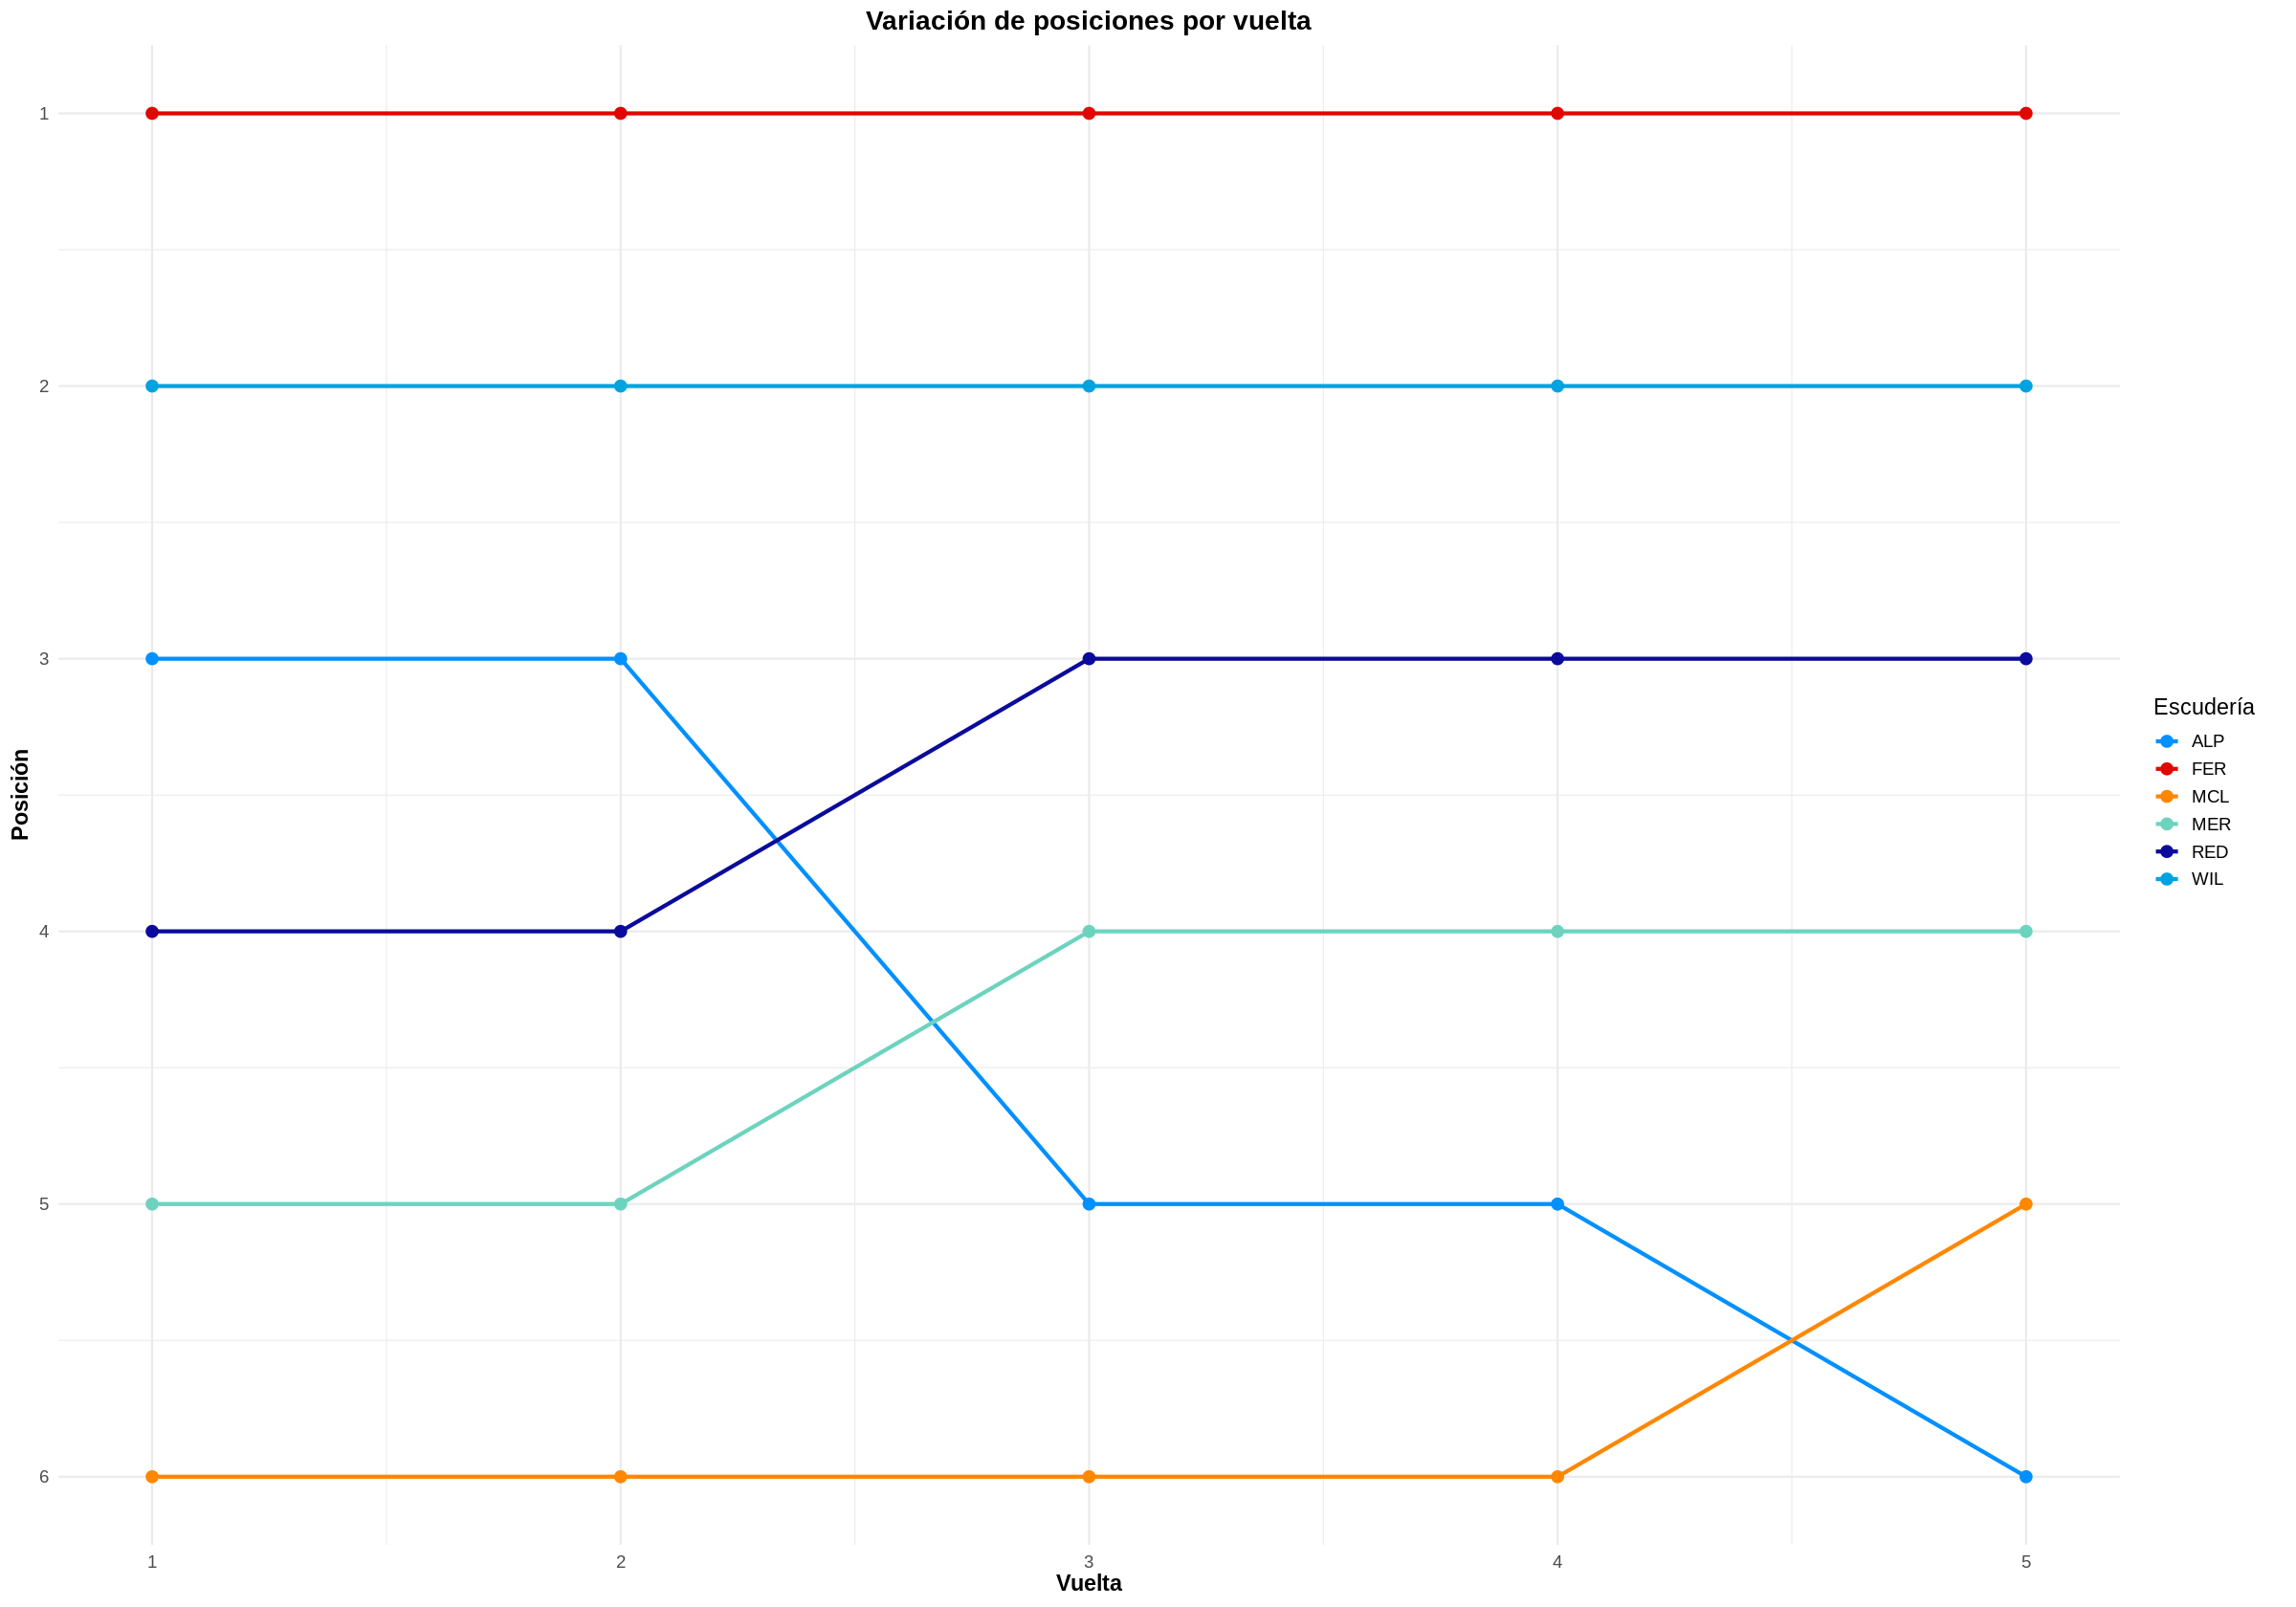

In [92]:
lap_positions <- lap_times_summary %>%
  arrange(carId, lap_number) %>%
  group_by(carId) %>%
  mutate(TotalTime = cumsum(total_lap_time)) %>%
  group_by(lap_number) %>%
  mutate(Position = min_rank(TotalTime)) %>%
  ungroup()

ggplot(lap_positions,
       aes(x = lap_number,
           y = Position,
           color = carId,
           group = carId)) +
  geom_line(size = 1.2) +
  geom_point(size = 3) +
  scale_y_reverse(breaks = 1:6) +
  scale_x_continuous(breaks = 1:5) +
  scale_color_manual(values = colores_f1) +
  labs(
    title = "Variación de posiciones por vuelta",
    x = "Vuelta",
    y = "Posición",
    color = "Escudería"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title   = element_text(face = "bold", hjust = 0.5),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    legend.position = "right"
  )

**Ferrari** mantiene la primera posición en todas las vueltas, mostrando el mejor rendimiento y la mayor consistencia.

**RedBull** mejora vuelta a vuelta y termina consolidándose en el segundo lugar, de P4 a P2.

**Williams** se mantiene estable entre P2 y P3, con buen ritmo general.

**Alpine** pierde rendimiento a lo largo de la carrera, cayendo de P3 a P6.

**Mercedes** y **McLaren** muestran variabilidad, alternando posiciones sin una tendencia clara.

#Actividad 6
Elabore un gráfico que muestre la velocidad máxima para cada uno de los vehículos, ordenado desde el más rápido al más lento. En el eje de las abscisas (X), se representarán los vehículos, mientras que en el eje de las ordenadas (Y) se plasmará la velocidad máxima por cada vehículo.

In [ ]:
vel_plot <- summary_table %>%
  select(carId, max_velocity) %>%
  arrange(desc(max_velocity)) %>%
  mutate(carId = factor(carId, levels = carId))

ggplot(vel_plot, aes(x = carId, y = max_velocity, fill = carId)) +
  geom_col(color = "black", width = 0.7) +
  geom_text(aes(label = round(max_velocity, 1)),
            vjust = -0.5,
            size = 5) +
  scale_fill_manual(values = colores_f1) +
  labs(
    title = "Velocidad máxima por vehículo",
    x = "Vehículo",
    y = "Velocidad máxima (km/h)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title  = element_text(face = "bold", hjust = 0.5),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    legend.position = "none"
  ) +
  ylim(0, max(vel_plot$max_velocity) * 1.1)

Las velocidades máximas registradas muestran diferencias prácticamente diminutas entre los seis vehículos, con un rango menor a 1 km/h entre el más rápido y el más lento. Red Bull (RED) alcanza la mayor velocidad punta, seguido muy de cerca por Williams (WIL) y Mercedes (MER). Ferrari (FER), McLaren (MCL) y Alpine (ALP) completan la tabla con valores prácticamente equivalentes.

En general, los resultados indican que ninguno de los autos presenta una ventaja clara en rectas, lo que sugiere configuraciones aerodinámicas similares o un trazado que no favorece grandes diferencias en velocidad máxima.

#Actividad 7
 Represente gráficamente la información correspondiente a las máximas velocidades por vuelta para cada vehículo mediante diagramas de caja (boxplots) y diagrama de violín. Gráfico similar al punto 2. Son dos gráficos por separado.

In [93]:
vel_max_vuelta <- telemetria_vueltas_invalidadas %>%
  group_by(carId, lap_number) %>%
  summarise(max_speed_lap = max(velocidad, na.rm = TRUE), .groups = "drop")

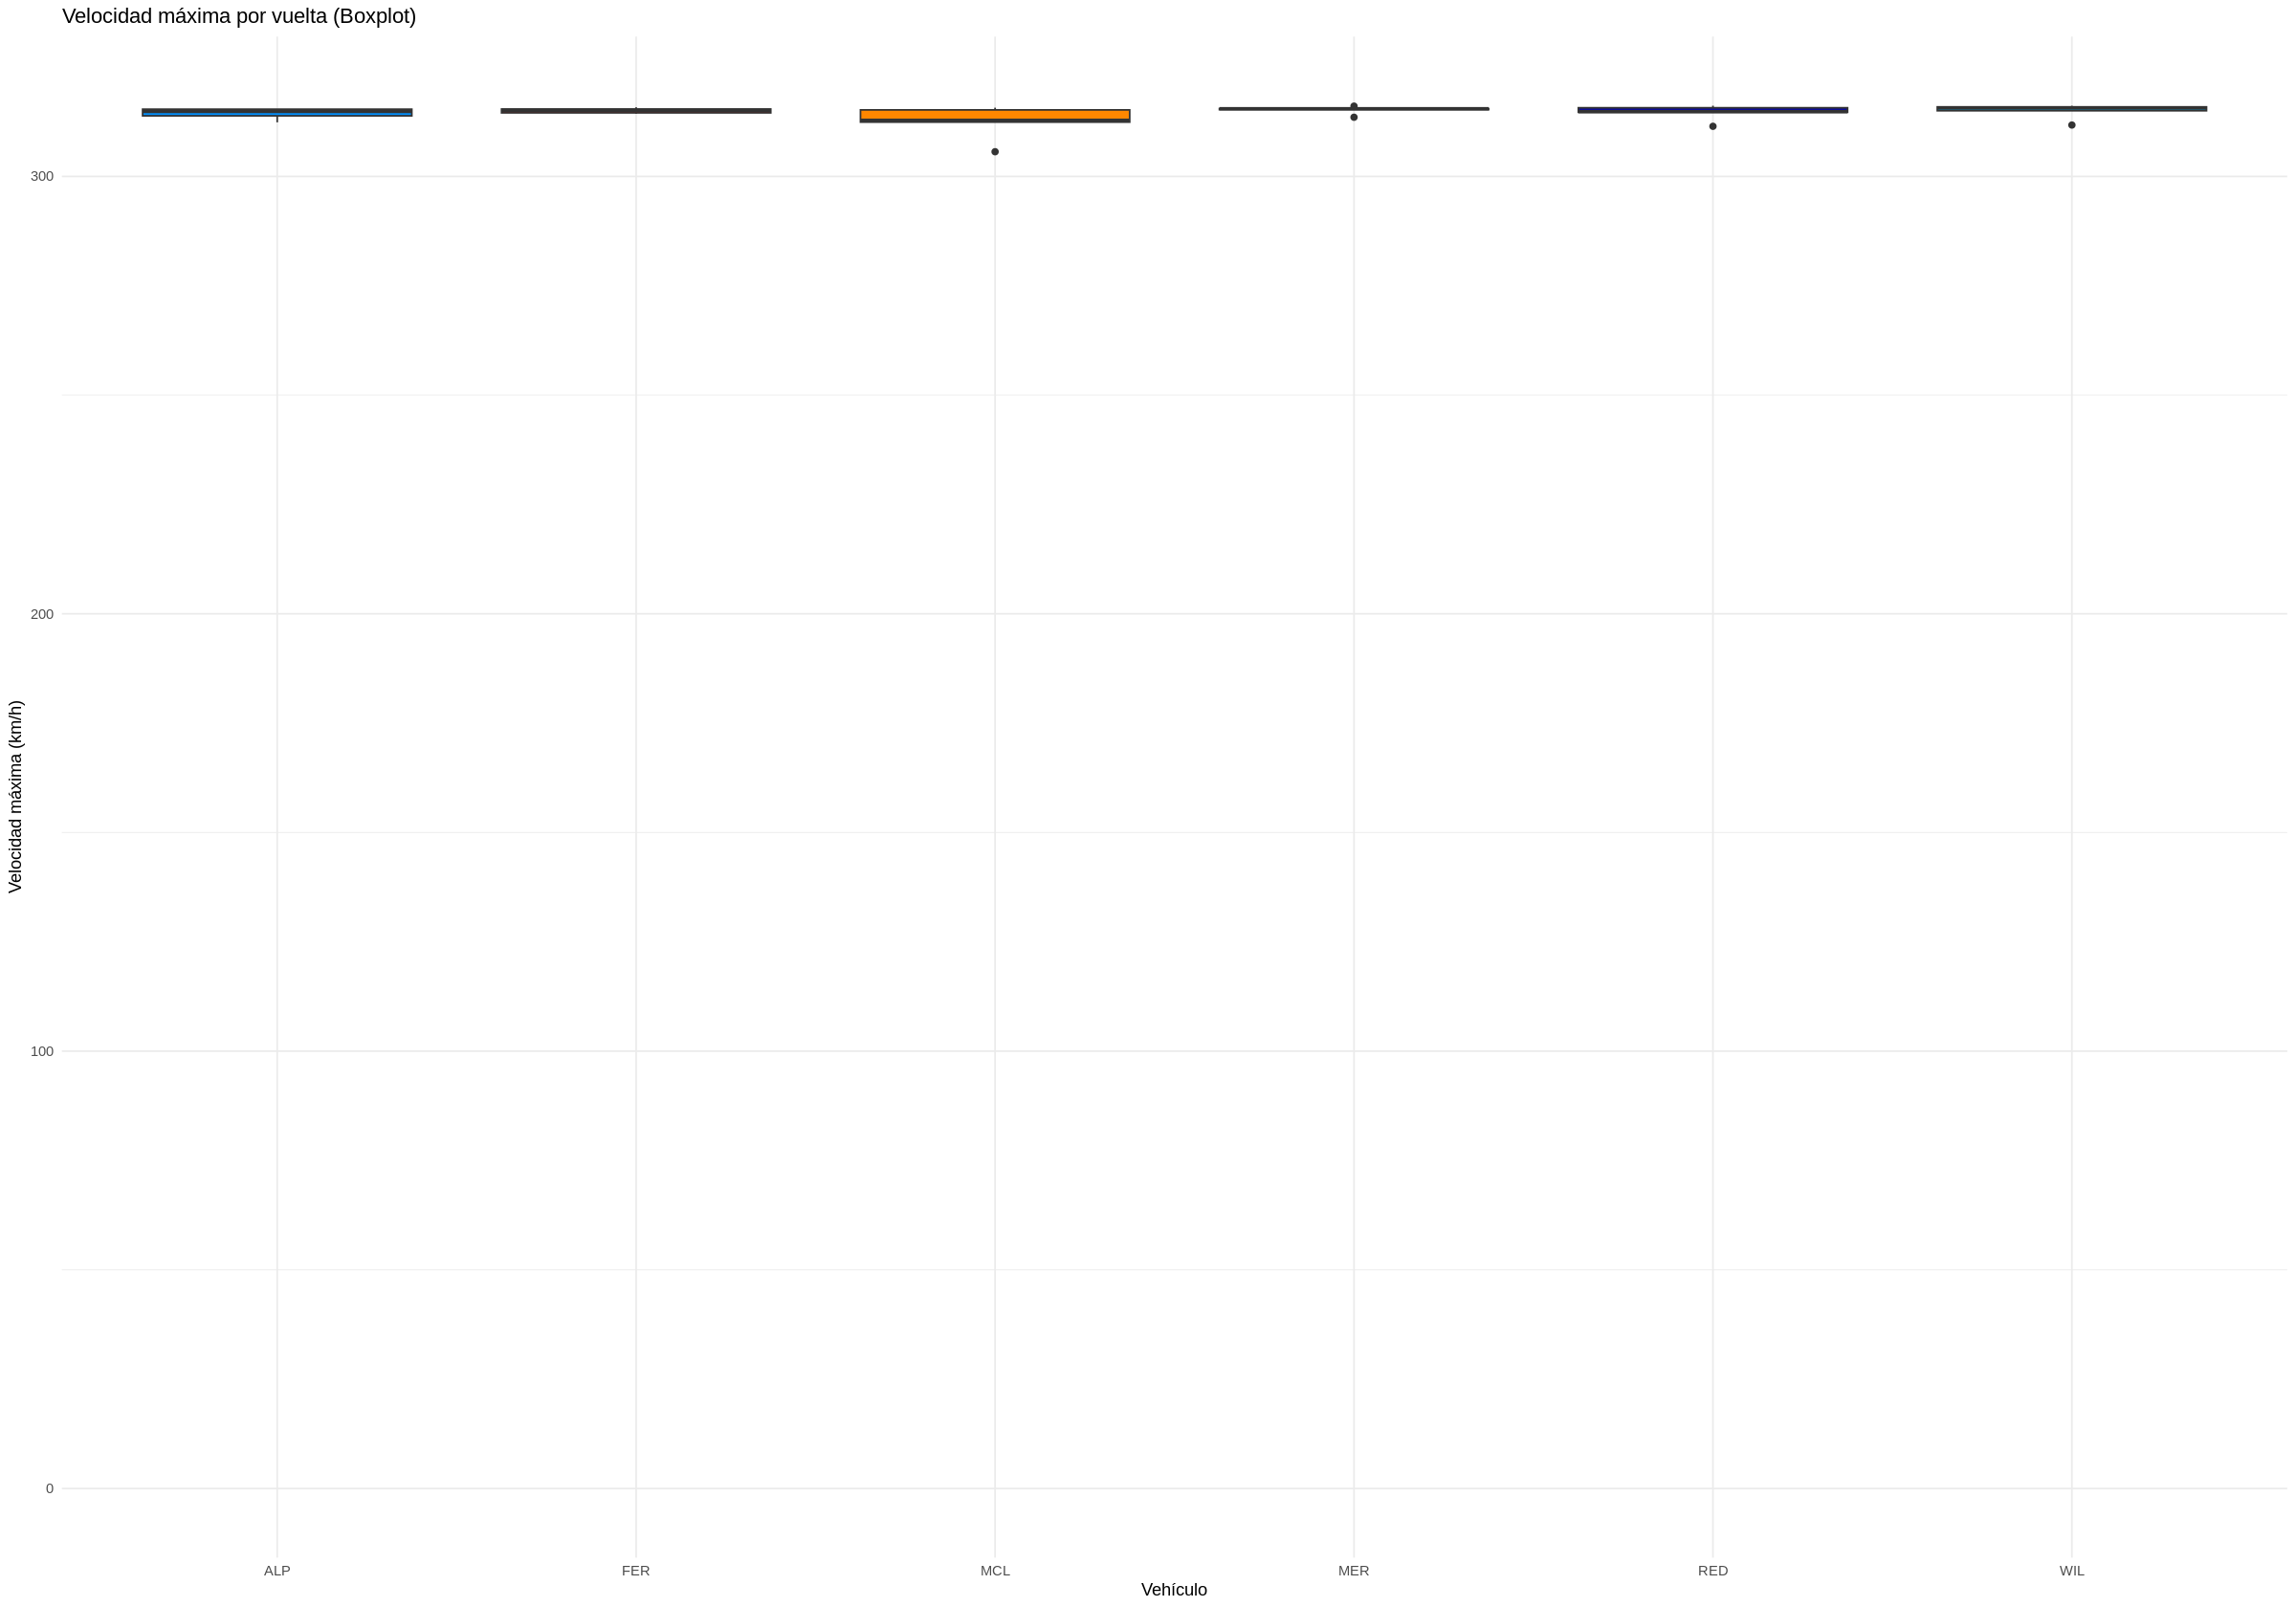

In [94]:
ggplot(vel_max_vuelta, aes(x = carId, y = max_speed_lap, fill = carId)) +
  geom_boxplot() +
  scale_fill_manual(values = colores_f1) +
  labs(
    title = "Velocidad máxima por vuelta (Boxplot)",
    x = "Vehículo",
    y = "Velocidad máxima (km/h)"
  ) +
  theme_minimal() +
  theme(legend.position = "none") +
  expand_limits(y = 0)

En este gráfico dejamos la escala real en el eje y (del 0 al valor máximo)

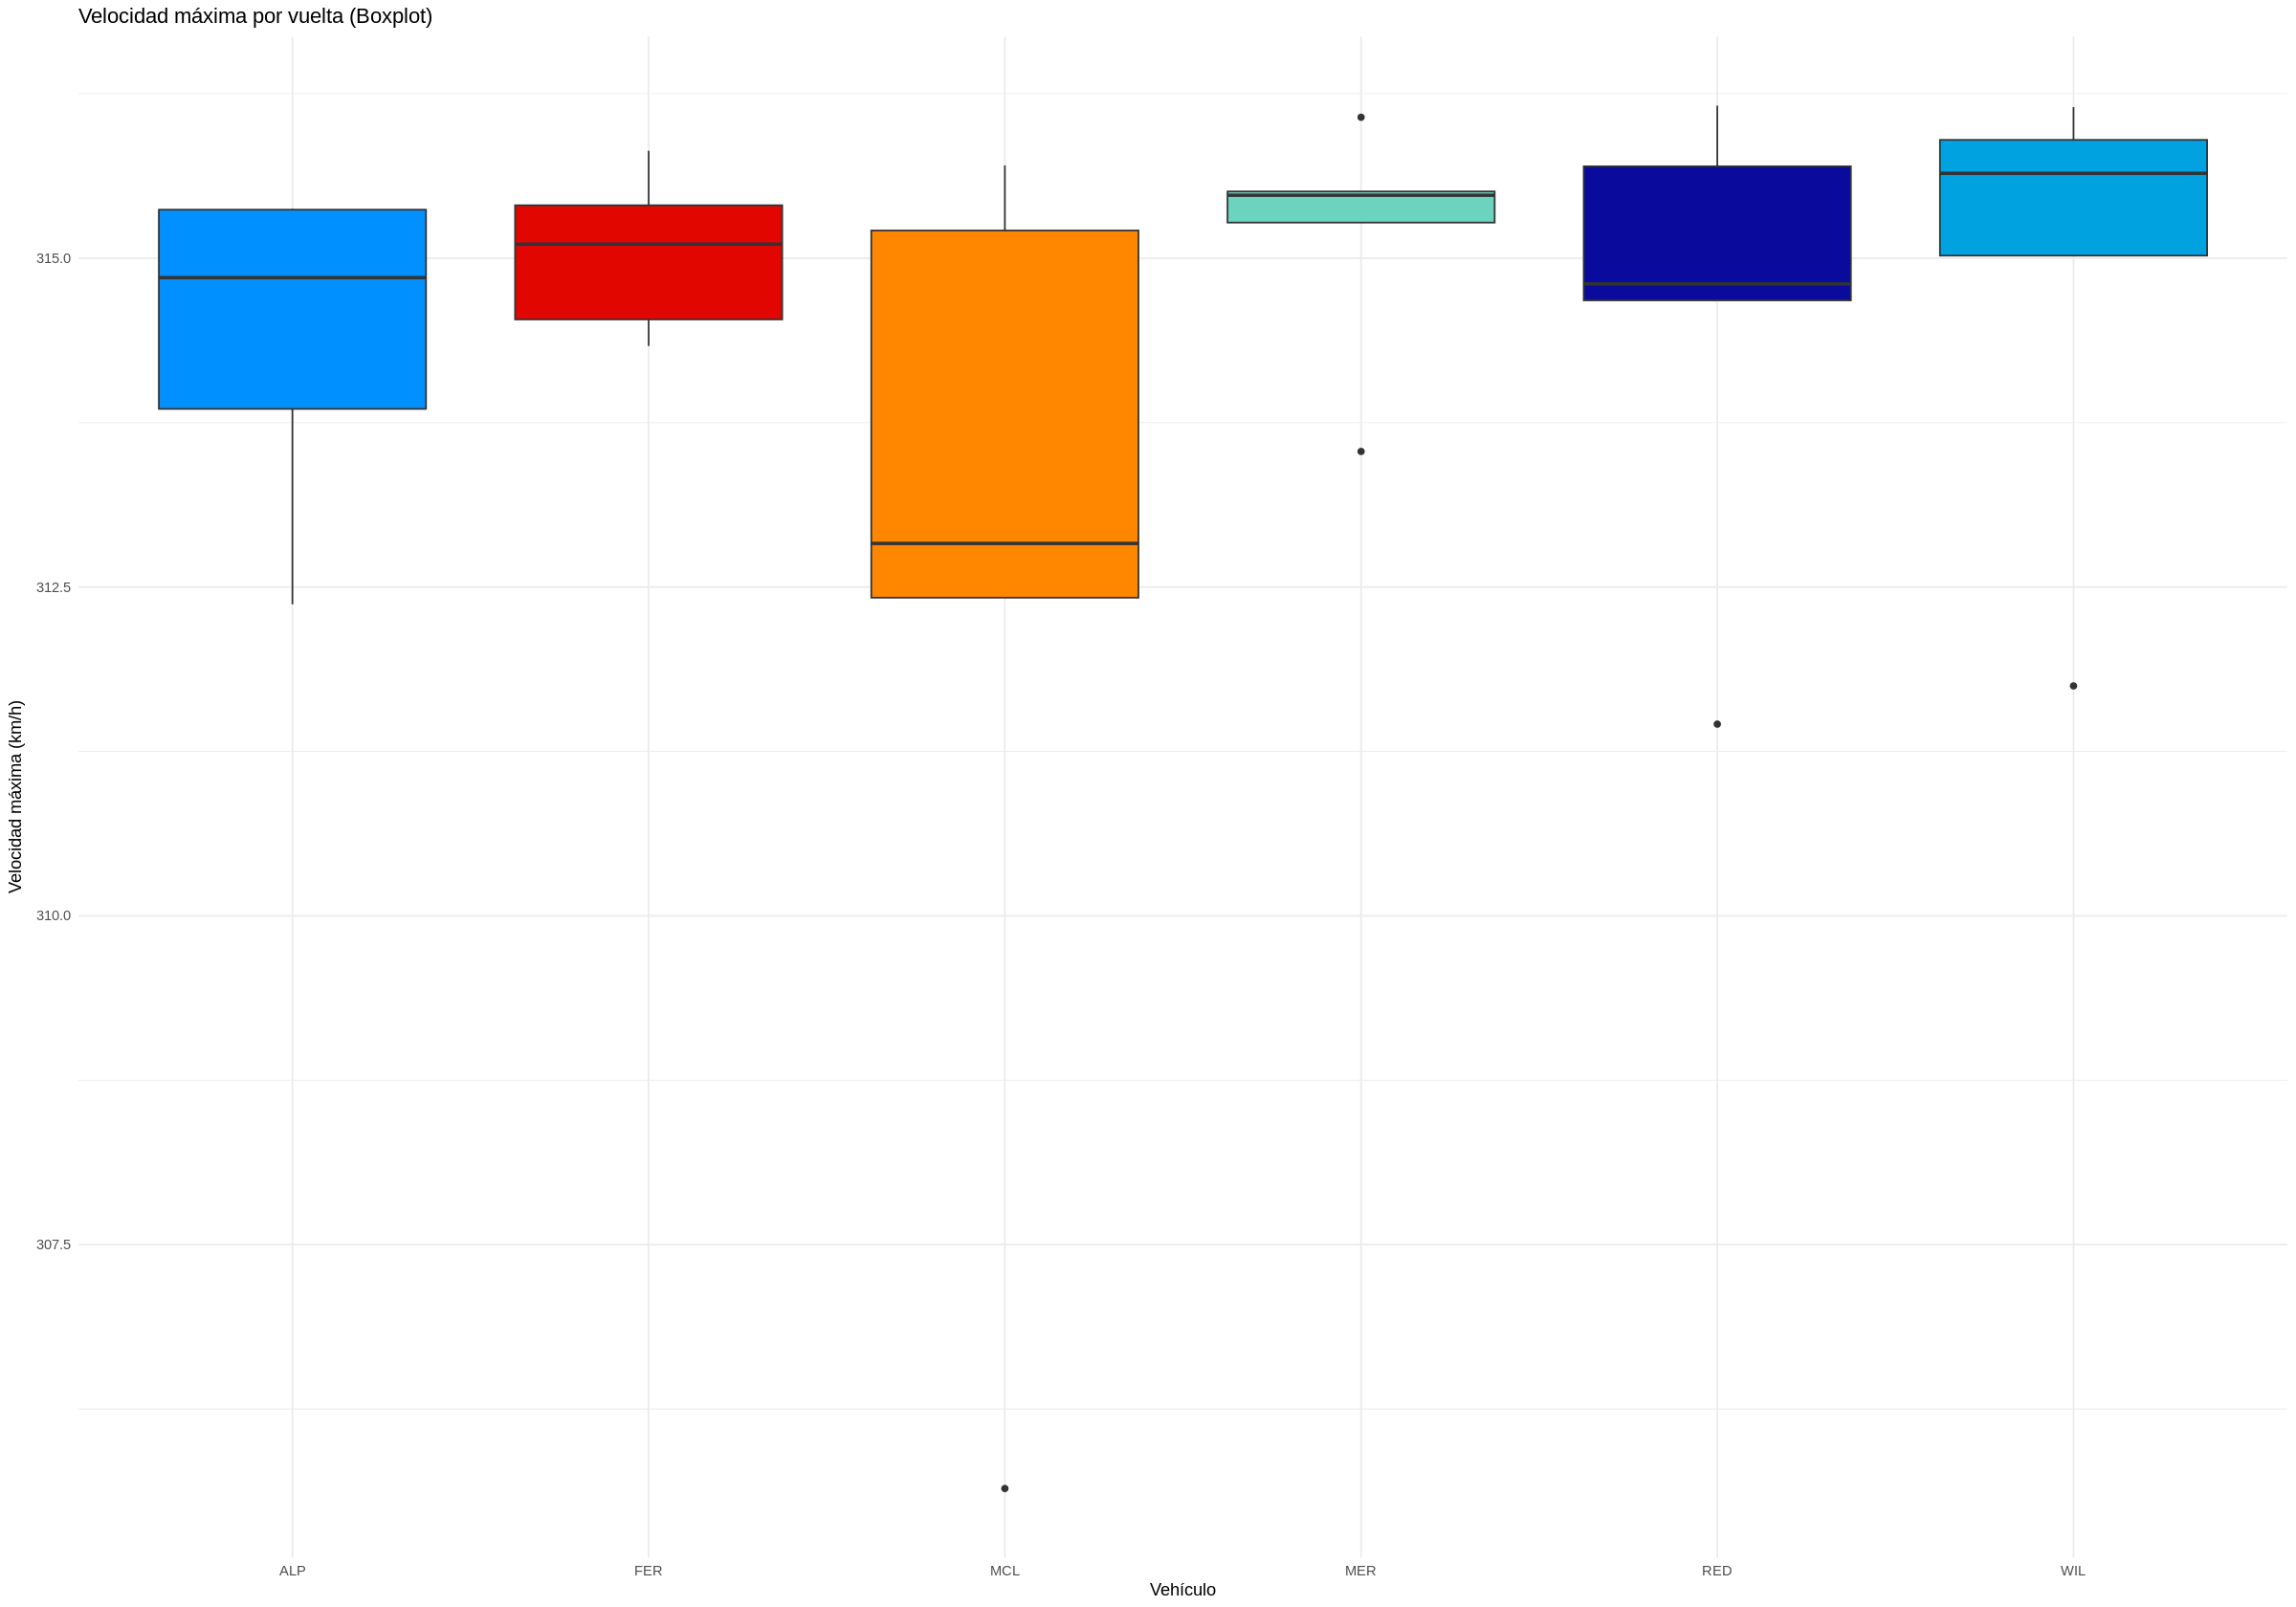

In [95]:
ggplot(vel_max_vuelta, aes(x = carId, y = max_speed_lap, fill = carId)) +
  geom_boxplot() +
  scale_fill_manual(values = colores_f1) +
  labs(
    title = "Velocidad máxima por vuelta (Boxplot)",
    x = "Vehículo",
    y = "Velocidad máxima (km/h)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

En este gráfico, la escala esta agrandada en el eje y (del valor mín al valor máx)

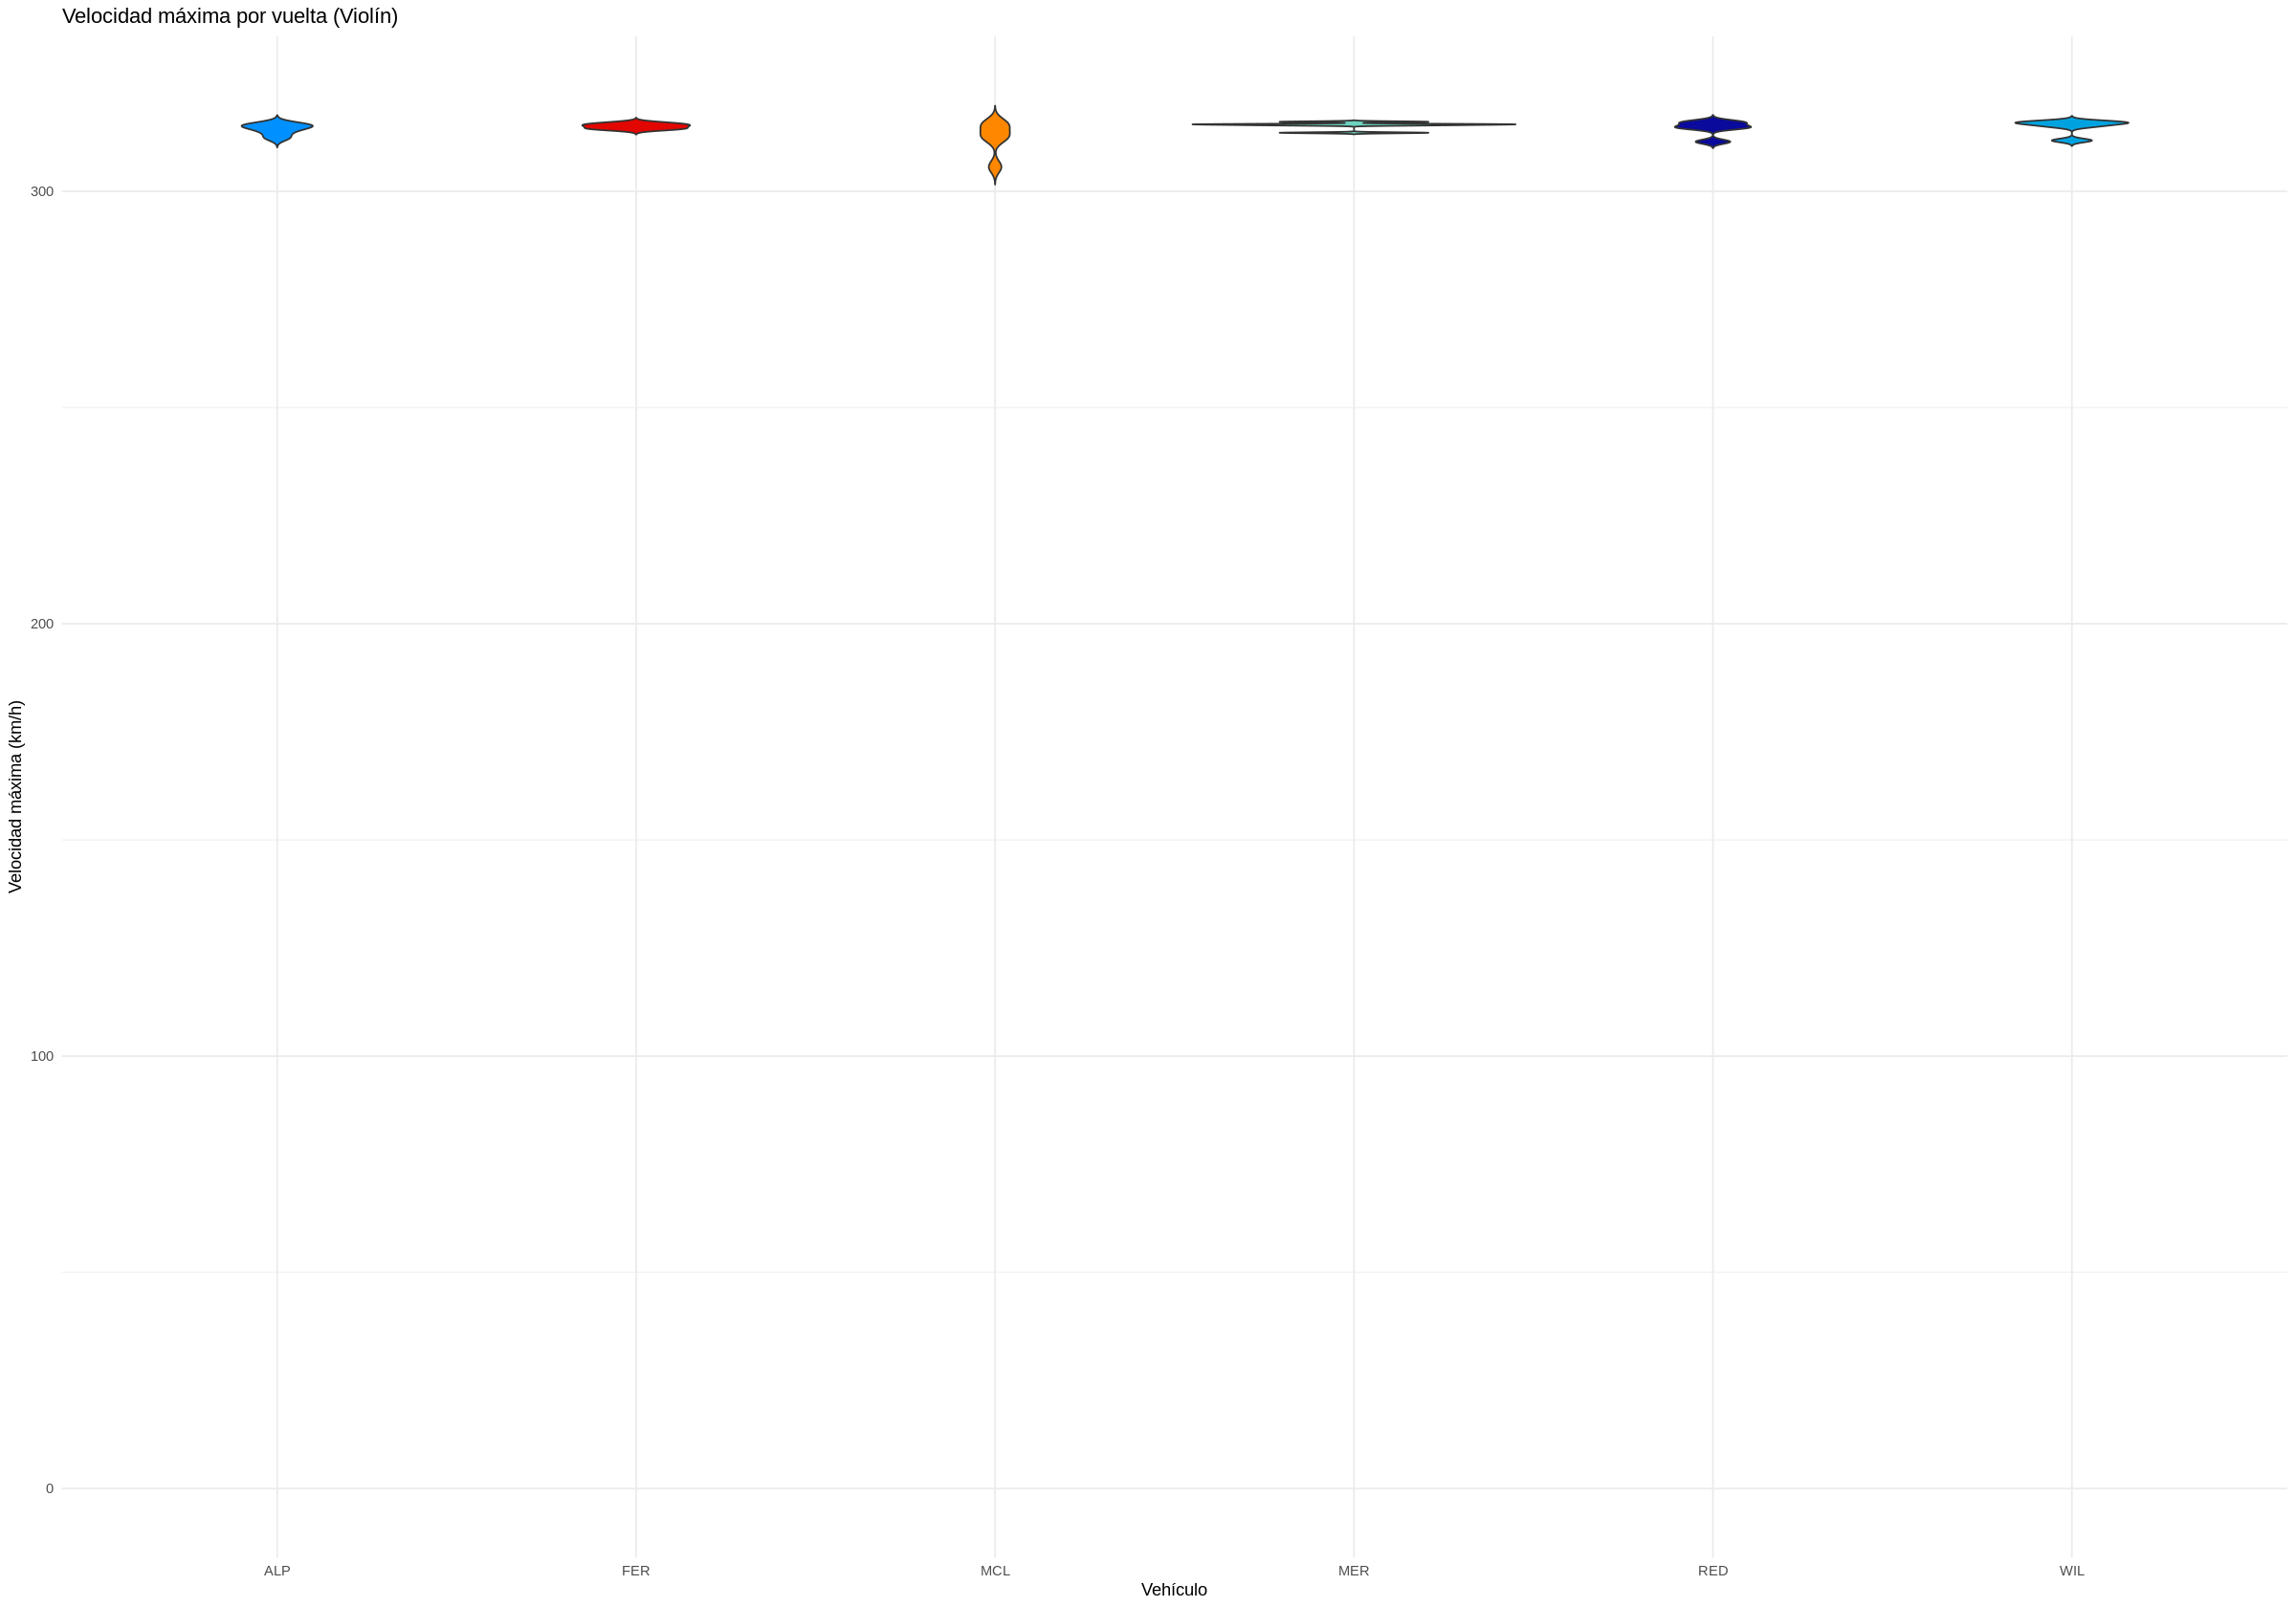

In [96]:
ggplot(vel_max_vuelta, aes(x = carId, y = max_speed_lap, fill = carId)) +
  geom_violin(trim = FALSE) +
  scale_fill_manual(values = colores_f1) +
  labs(
    title = "Velocidad máxima por vuelta (Violín)",
    x = "Vehículo",
    y = "Velocidad máxima (km/h)"
  ) +
  theme_minimal() +
  theme(legend.position = "none") +
  expand_limits(y = 0)

En este gráfico dejamos la escala real en el eje y (del 0 al valor máximo)

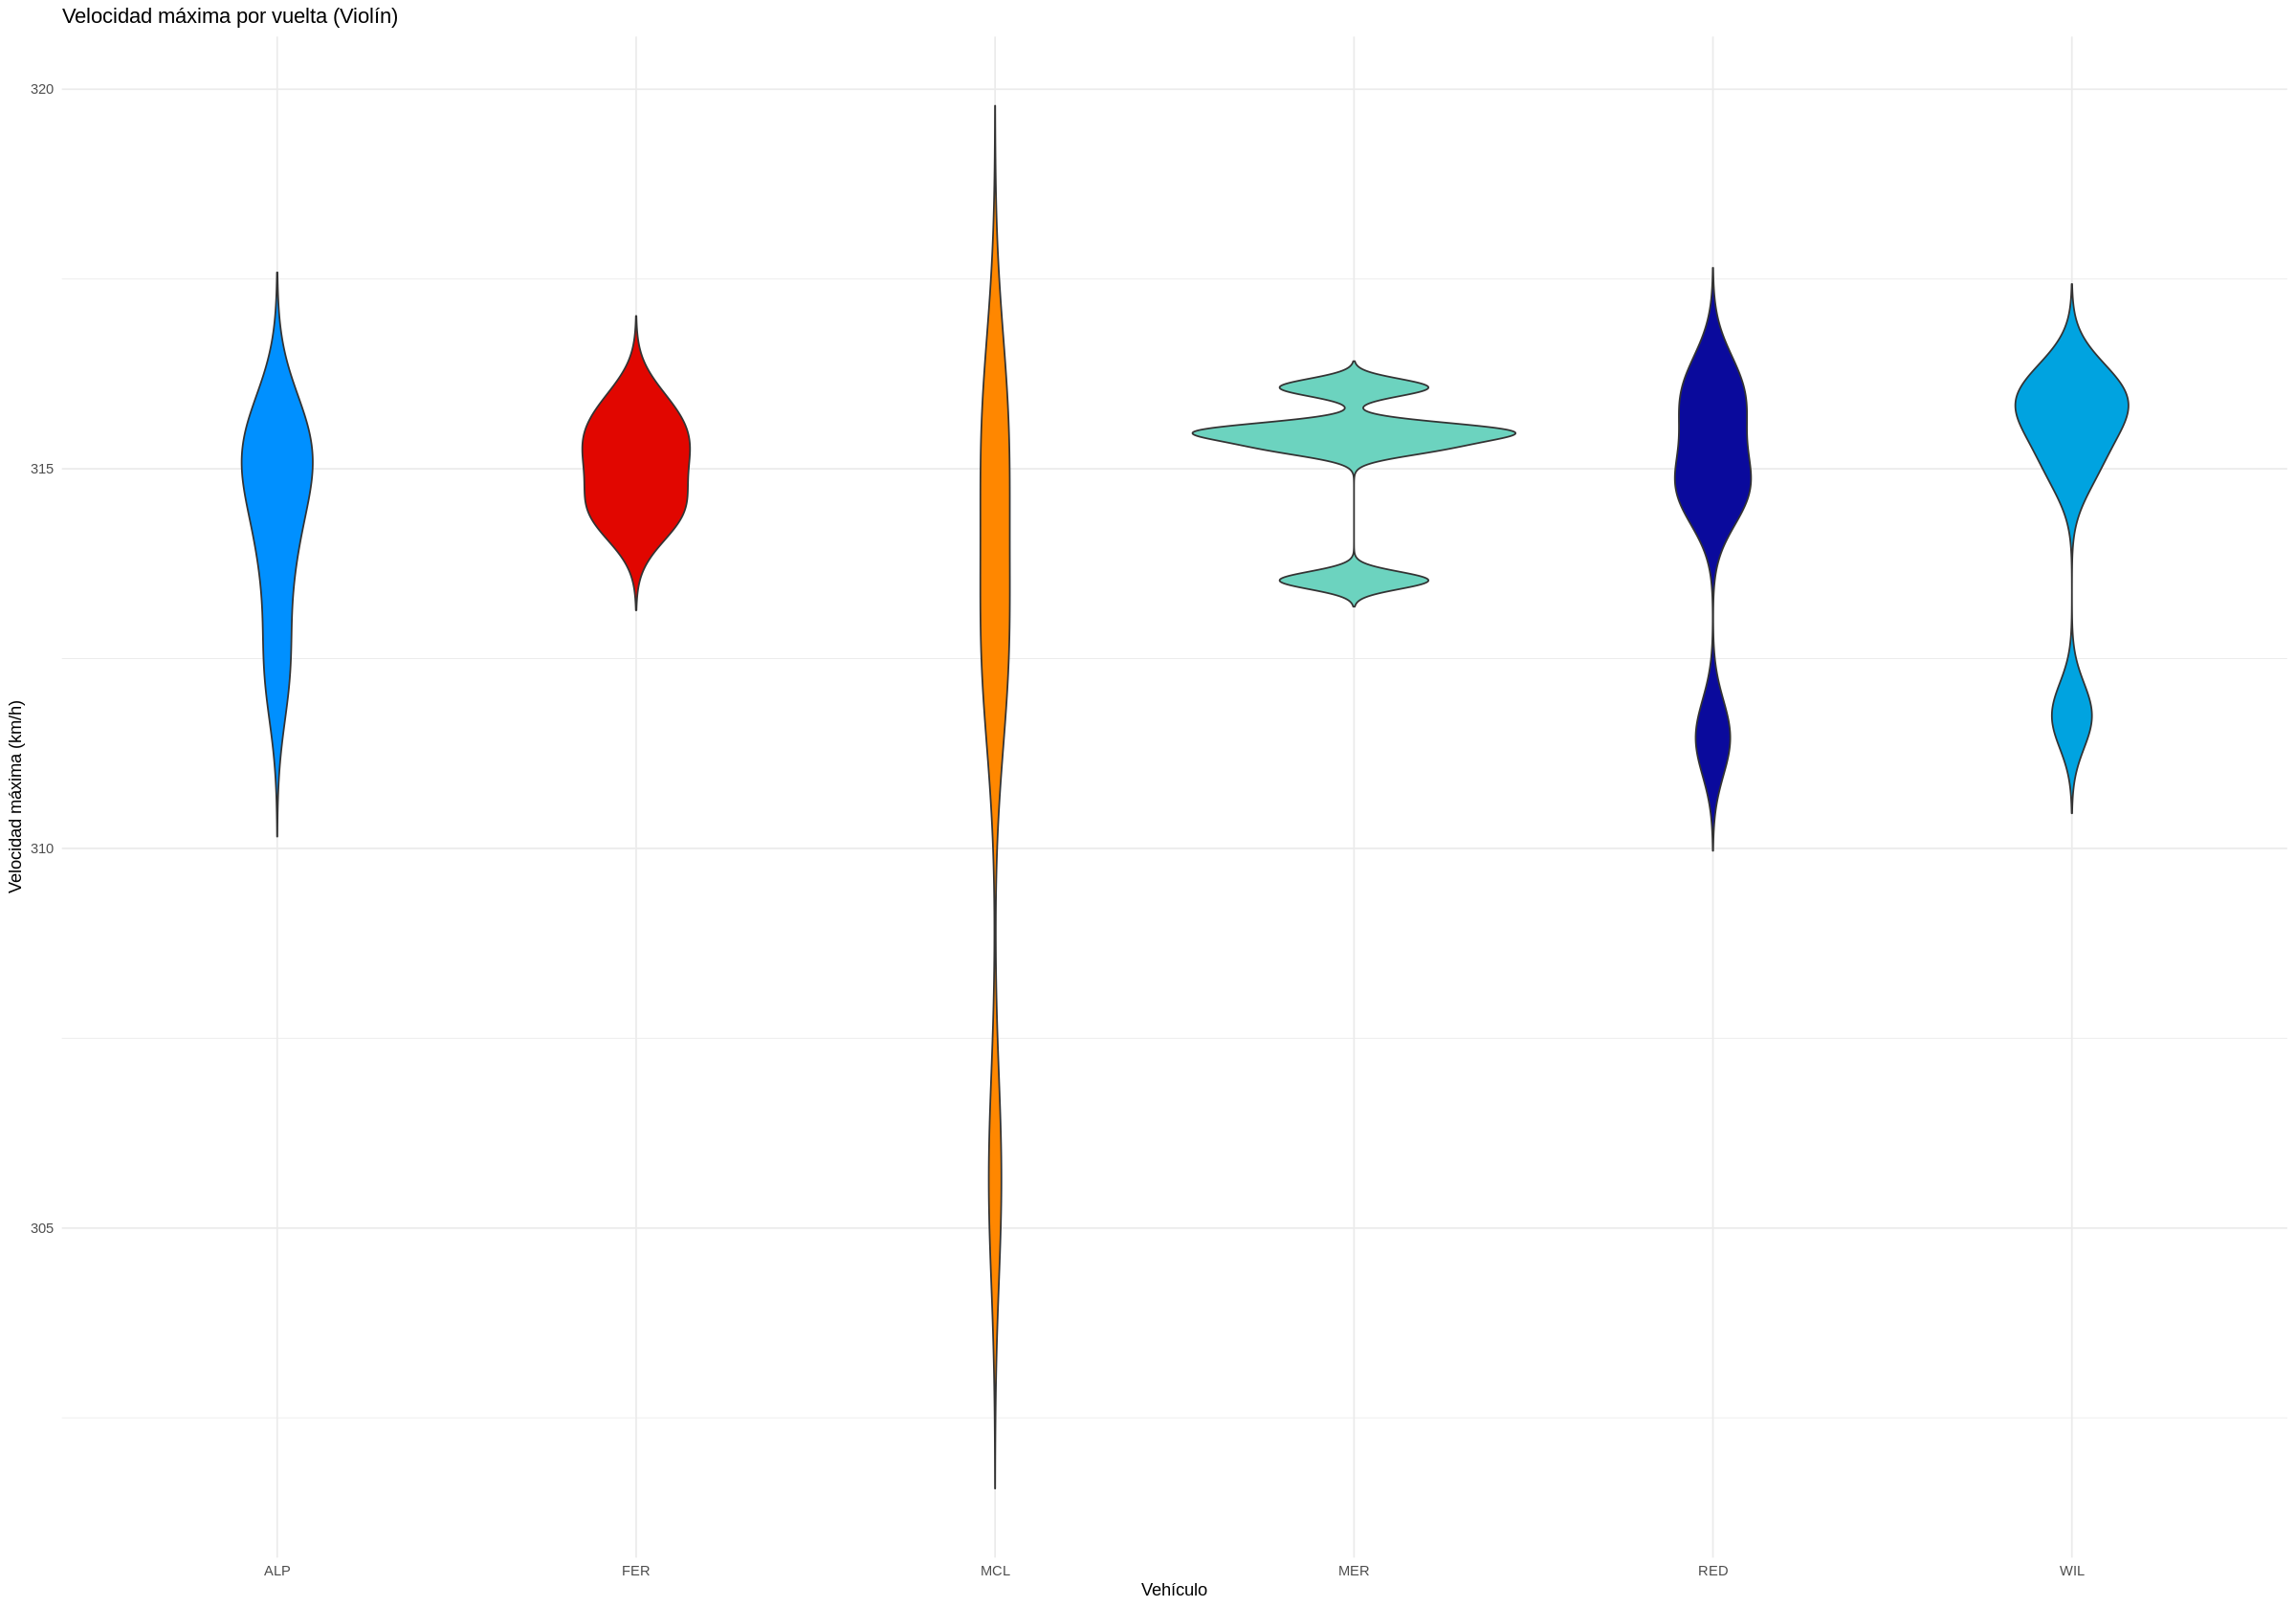

In [97]:
ggplot(vel_max_vuelta, aes(x = carId, y = max_speed_lap, fill = carId)) +
  geom_violin(trim = FALSE) +
  scale_fill_manual(values = colores_f1) +
  labs(
    title = "Velocidad máxima por vuelta (Violín)",
    x = "Vehículo",
    y = "Velocidad máxima (km/h)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

In [98]:
lap_speeds_all <- telemetria %>%
  filter(lap_time_invalid == 0) %>%
  group_by(carId, lap_number) %>%
  summarise(max_speed = max(velocidad, na.rm = TRUE),
            .groups = "drop")

summary_1_ultima <- lap_speeds_all %>%
  pivot_wider(
    id_cols = carId,
    names_from = lap_number,
    values_from = max_speed,
    names_glue = "vel_max_vuelta_{lap_number}"
  ) %>%
  arrange(carId) %>%
  mutate(
    across(starts_with("vel_max_vuelta_"),
           ~ round(.x, 1))
  )

summary_1_ultima

carId,vel_max_vuelta_1,vel_max_vuelta_2,vel_max_vuelta_3,vel_max_vuelta_4,vel_max_vuelta_5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALP,299.2,313.9,315.4,314.9,315.4
FER,314.3,315.8,315.1,315.4,314.5
MCL,305.6,312.4,315.2,315.7,312.8
MER,313.5,315.5,315.5,316.1,315.3
RED,309.1,314.8,316.2,315.7,314.7
WIL,311.7,315.9,315.6,315.0,316.1


In [99]:
vel_max_vuelta_ordered <- vel_max_vuelta %>%
  arrange(max_speed_lap)

vel_max_vuelta_ordered

carId,lap_number,max_speed_lap
<chr>,<dbl>,<dbl>
MCL,1,305.6458
RED,1,311.4575
WIL,1,311.7480
ALP,1,312.3685
MCL,2,312.4189
MCL,5,312.8311
MER,1,313.5304
ALP,2,313.8539
FER,1,314.3328


En este gráfico, la escala esta agrandada en el eje y (del valor mín al valor máx)

#Actividad 8

Elabore un gráfico que muestren los mejores tiempos para cada uno de los vehículos en cada uno de los sectores, ordenando los tiempos de menor a mayor. En el eje de las abscisas (X), se representarán los vehículos, mientras que en el eje de las ordenadas (Y) se plasmará el tiempo empleado por cada.


 Generando Gráfico 7 (Sectores Separados)...


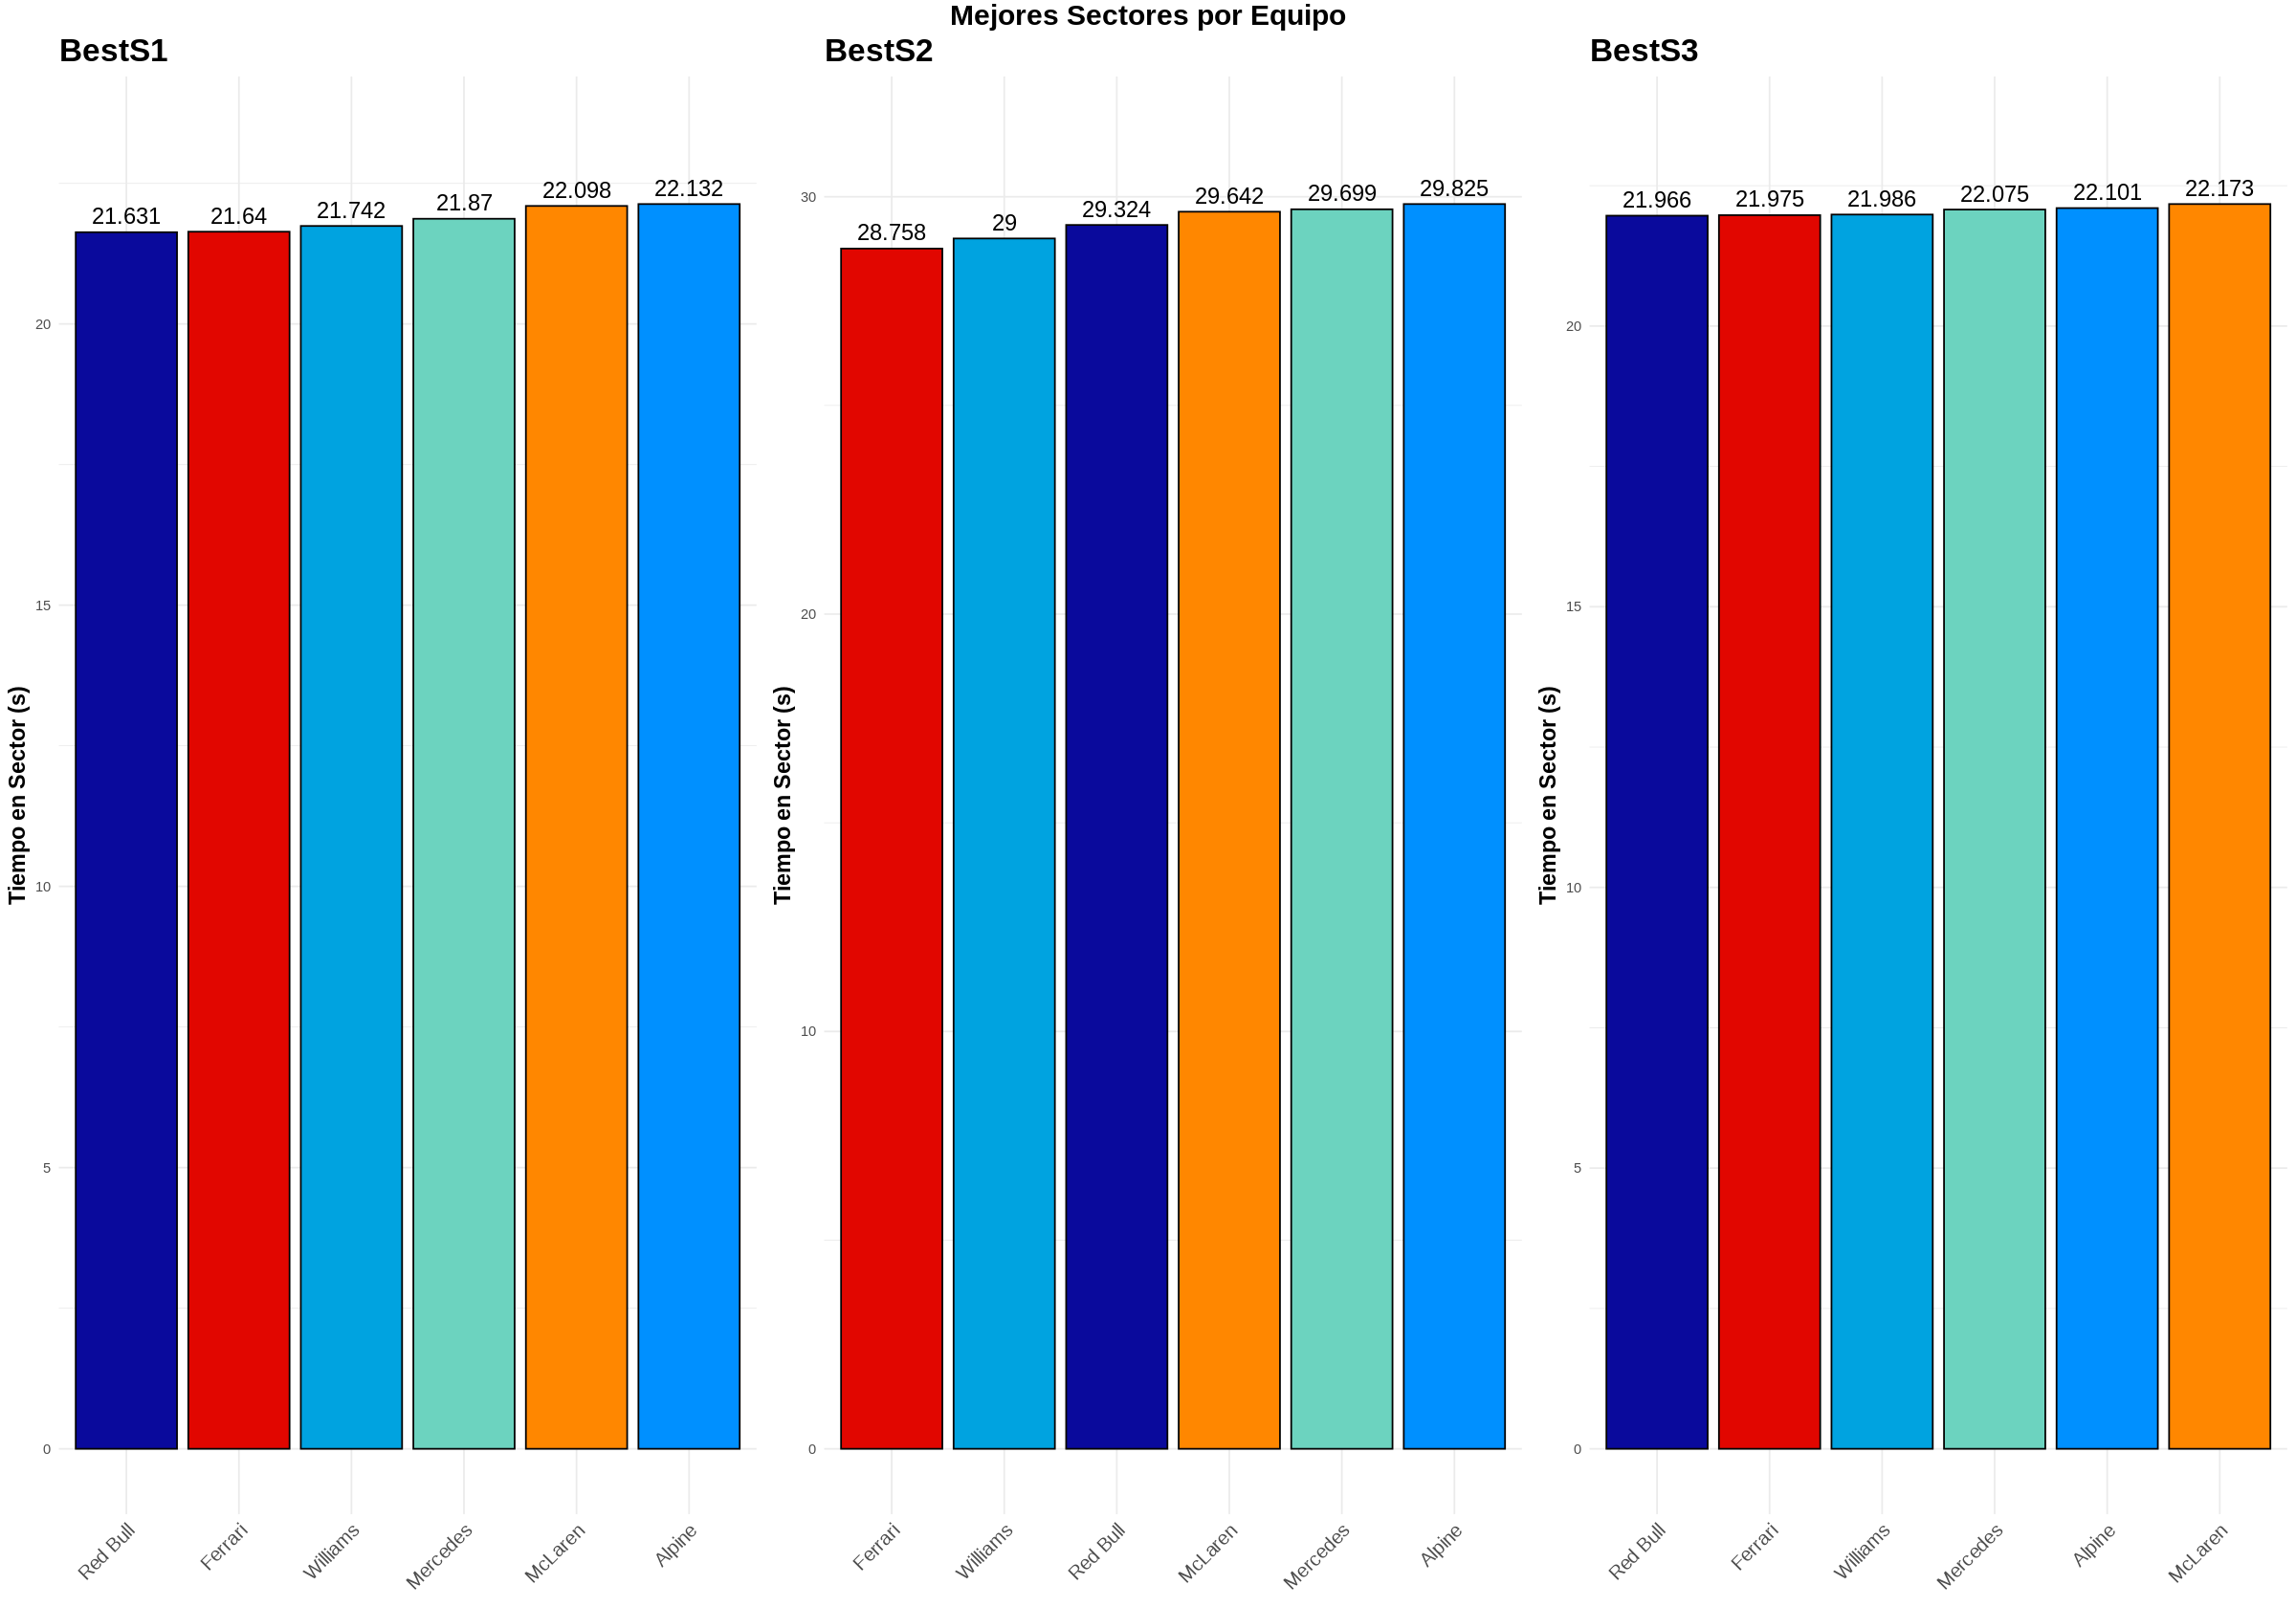

In [101]:
best_sector_times <- telemetria_vueltas_invalidadas %>%
  group_by(carId, lap_number, sector) %>%
  summarise(
    sector_time = max(lap_time, na.rm = TRUE) - min(lap_time, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  group_by(carId, sector) %>%
  summarise(
    best_sector_time = min(sector_time, na.rm = TRUE),
    .groups = 'drop'
  )

tabla_mejores <- best_sector_times %>%
  pivot_wider(names_from = sector, values_from = best_sector_time, names_prefix = "Best")

sectores_long <- tabla_mejores %>%
  select(carId, BestS1, BestS2, BestS3) %>%
  pivot_longer(cols = -carId, names_to = "Sector", values_to = "Tiempo") %>%
  mutate(full_carId = recode(carId, !!!full_team_names))

plot_sector <- function(data, sec) {
  df_s <- data %>%
    filter(Sector == sec)
  ggplot(df_s, aes(x = reorder(full_carId, Tiempo), y = Tiempo, fill = carId)) +
    geom_col(color = "black") +
    geom_text(aes(label = round(Tiempo, 3)), vjust = -0.5, size = 5) +
    scale_fill_manual(values = colores_f1) +
    coord_cartesian(ylim = c(0, max(df_s$Tiempo, na.rm = TRUE) * 1.05)) +
    labs(title = sec, x = NULL, y = "Tiempo en Sector (s)") +
    theme_minimal() +
    theme(
      legend.position = "none",
      axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
      axis.title.y = element_text(size = 14, face = "bold"),
      plot.title = element_text(size = 20, face = "bold")
    )
}

cat("\n Generando Gráfico 7 (Sectores Separados)...\n")
p_s1 <- plot_sector(sectores_long, "BestS1")
p_s2 <- plot_sector(sectores_long, "BestS2")
p_s3 <- plot_sector(sectores_long, "BestS3")

grid.arrange(
  p_s1,
  p_s2,
  p_s3,
  ncol = 3,
  top = textGrob(
    "Mejores Sectores por Equipo",
    gp = gpar(fontsize = 18, fontface = "bold")
  )
)

### Cuadro 1: Resumen de Tiempos de Vuelta Promedio y Distribución

In [ ]:
lap_time_descriptive_stats <- lap_times_summary_full %>%
  group_by(carId, full_carId) %>%
  summarise(
    Media_Tiempo_Vuelta = mean(total_lap_time, na.rm = TRUE),
    Mediana_Tiempo_Vuelta = median(total_lap_time, na.rm = TRUE),
    Min_Tiempo_Vuelta = min(total_lap_time, na.rm = TRUE),
    Max_Tiempo_Vuelta = max(total_lap_time, na.rm = TRUE),
    Desviacion_Estandar = sd(total_lap_time, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  arrange(Media_Tiempo_Vuelta)
lap_time_descriptive_stats

En este grafico no podemos analizar con exactitud que equipo salió victorioso, ni que equipo fue el mas rápido en su totalidad, sin embargo podemos ver a que equipo se le daba mejor cada sector.



*   El equipo de Red-Bull se mantuvo con el mejor rendimiento en los sectores 1 y 3, mientras que en el sector 2 llego tercero.
*   El equipo de Ferrari logro la primera posición del segundo podio y se mantuvo en segunda posición en los otros 2
*   El equipo de Williams logro también el podio en los 3 sectores, llegando a una posición 3 en el primero y segundo y a una posición de segundo en el segundo sector.
*   El patrón se repite para Mercedes, quienes lograron un cuarto puesto en el primer y segundo sector pero un quinto en el segundo
*   El equipo de McLaren fue el mas variado, quedando quinto en el primer sector, cuarto en el segundo y ultimo en el tercero
*   Por ultimo el que peor resultado tuvo fue Alpine quienes quedaron últimos en los 2 primeros sectores y penúltimos en el tercero.

Podemos observar que quienes lograron un mejor rendimiento en la carrera fueron aquellos que quedaron en mejor posición en el primero y tercer sector, sin embargo el equipo ganador fue Ferrari quien hizo lo contrario, tuvo un mejor rendimiento en el segundo sector, en comparación con el resto de los corredores

#Actividad 9

 Elabore un gráfico que muestre en primer lugar el vehículo más rápido (tiempo de vuelta promedio) y a continuación el gap en segundos con cada uno de los demás vehículos. En el eje de las abscisas (X), se representarán los valores diferenciales, mientras que en el eje de las ordenadas (Y) se plasmará los vehículos.

In [ ]:
format_time_ms <- function(seconds) {
  minutes <- floor(seconds / 60)
  remaining_seconds <- seconds %% 60
  sprintf("%d:%06.3f", minutes, remaining_seconds)
}

average_lap_times <- telemetria_vueltas_invalidadas %>%
  group_by(carId, lap_number) %>%
  summarise(total_lap_time = max(lap_time, na.rm = TRUE), .groups = 'drop') %>%
  group_by(carId) %>%
  summarise(avg_lap_time = mean(total_lap_time, na.rm = TRUE), .groups = 'drop')

fastest_car_time <- min(average_lap_times$avg_lap_time, na.rm = TRUE)
fastest_car_id_abb <- average_lap_times %>%
  filter(avg_lap_time == fastest_car_time) %>%
  pull(carId) %>% head(1)

gap_data <- average_lap_times %>%
  mutate(gap_seconds = avg_lap_time - fastest_car_time) %>%
  mutate(full_carId = recode(carId, !!!full_team_names)) %>%
  arrange(gap_seconds)

fastest_car_full_name <- full_team_names[fastest_car_id_abb]
fastest_car_time_formatted <- format_time_ms(fastest_car_time)

gap_data <- gap_data %>%
  mutate(display_label = ifelse(gap_seconds == 0,
                                fastest_car_time_formatted,
                                paste0("+", as.character(round(gap_seconds, 3)))))

ggplot(gap_data, aes(x = gap_seconds, y = reorder(full_carId, -gap_seconds), fill = carId)) +
  geom_bar(stat = "identity", color = "black") +
  geom_text(aes(label = display_label), hjust = -0.1, size = 6) +
  scale_fill_manual(values = colores_f1) +
  labs(
    title = paste0("Gap de Tiempo Promedio con el Vehículo más Rápido (", fastest_car_full_name, ")"),
    x = "Diferencia de Tiempo (segundos)",
    y = "Vehículo",
    fill = "Vehículo"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 14, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    plot.title = element_text(size = 20, face = "bold")
  )


### Gap de Tiempo Promedio con el Vehículo más Rápido

In [ ]:
display_gap_data <- gap_data %>%
  select(full_carId, avg_lap_time, gap_seconds, display_label) %>%
  arrange(gap_seconds)

display_gap_data

Como podemos observar en el grafico anterior, podemos definir que el auto mas rápido fue el de la escudería Ferrari(en un tiempo de 1:12:86) , seguido de Williams llegando en segundo lugar (0,872 segundos después), para cerrar el podio estaría el equipo de Red-Bull (a 1,367 segundos respecto al primero), en cuarta posición Mercedes (a 2,127 segundos), quinto el equipo de McLaren (a 3,874 segundos) y en ultimo lugar el equipo de Alpine (a 4,031 segundos del equipo de Ferrari)

 # Actividad 10

 Elabore un gráfico que muestre la velocidad máxima para cada uno de los vehículos, ordenado desde el más rápido al más lento SOLO TENIENDO EN CUENTA LAS VUELTAS VALIDAS. En el eje de las abscisas (X), se representarán los vehículos, mientras que en el eje de las ordenadas (Y) se plasmará la velocidad máxima por cada vehículo.

In [ ]:
max_velocity_data1 <- telemetria_vueltas_invalidadas %>%
  filter(lap_time_invalid == 0) %>%
  group_by(carId) %>%
  summarise(max_velocidad = max(velocidad, na.rm = TRUE),
            .groups = "drop") %>%
  arrange(desc(max_velocidad))


max_velocity_data1 <- max_velocity_data1 %>%
  mutate(full_carId = recode(carId, !!!full_team_names)) %>%
  mutate(full_carId = factor(full_carId, levels = full_carId))

ggplot(max_velocity_data1, aes(x = full_carId, y = max_velocidad, fill = carId)) +
  geom_col(color = "black") +
  geom_text(aes(label = round(max_velocidad, 2)),
            vjust = -0.5, size = 6) +
  scale_fill_manual(values = colores_f1) +
  labs(
    title = "Velocidad máxima por vehículo (vueltas válidas)",
    x = "Vehículo",
    y = "Velocidad máxima (km/h)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x  = element_text(angle = 45, hjust = 1, size = 18, face = "bold"),
    axis.text.y  = element_text(size = 14, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    plot.title   = element_text(size = 20, face = "bold"),
    legend.position = "none"
  )


In [ ]:
max_velocity_data1

In [ ]:
max_velocity_data2 <- telemetria %>%
  filter(lap_time_invalid == 0) %>%
  group_by(carId) %>%
  summarise(max_velocidad = max(velocidad, na.rm = TRUE),
            .groups = "drop") %>%
  arrange(desc(max_velocidad))


max_velocity_data2 <- max_velocity_data2 %>%
  mutate(full_carId = recode(carId, !!!full_team_names)) %>%
  mutate(full_carId = factor(full_carId, levels = full_carId))

ggplot(max_velocity_data2, aes(x = full_carId, y = max_velocidad, fill = carId)) +
  geom_col(color = "black") +
  geom_text(aes(label = round(max_velocidad, 2)),
            vjust = -0.5, size = 6) +
  scale_fill_manual(values = colores_f1) +
  labs(
    title = "Velocidad máxima por vehículo (REGISTROS VÁLIDOS)",
    x = "Vehículo",
    y = "Velocidad máxima (km/h)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x  = element_text(angle = 45, hjust = 1, size = 18, face = "bold"),
    axis.text.y  = element_text(size = 14, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    plot.title   = element_text(size = 20, face = "bold"),
    legend.position = "none"
  )

In [ ]:
max_velocity_data2